In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
# #this is to remove the email from the survey
# df = pd.read_csv('raw_data.csv')
# df = df.drop(
#     ['If you want us to be able to send you the results of our study, please give your email address. It will never be shared.',
#     'Timestamp'
#     ], axis=1)
# df.to_csv('data.csv')

In [3]:
df = pd.read_csv('data.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df.head(2)

What is the highest level of education you have completed so far?  \
0                           Master’s degree or above                  
1                          Bachelor’s degree/License                  

  In which of these fields have you previously received qualifications?  \
0  Humanities (history, literature, philosophy, e...                      
1  Social sciences (psychology, anthropology, law...                      

  During your previous studies, were you required to develop digital skills? If yes, please specify.  \
0                                                 No                                                   
1                                                 No                                                   

  What is your current level of study?  \
0             Master’s degree or above   
1             Master’s degree or above   

                What is your current field of study?  \
0  Social sciences (psychology, anthropology, law...   
1      STEM (science, technology, engineering, math)   

  Does your current field of study require digital tools skills/courses?  \
0                                                 No                       
1     Coding (for example: any programming language)                       

  Have you completed any workshops or had any personal endeavors with digital tools?  \
0                                                Yes                                   
1                                                Yes                                   

  Comfort in online learning :  [Navigating online course components is easy for me.]  \
0                                     Strongly agree                                    
1                                     Strongly agree                                    

  Comfort in online learning :  [It is easy to get online course components to do what I want them to do.]  \
0                                     Strongly agree                                                         
1                                  Somewhat disagree                                                         

  Comfort in online learning :  [It is  easy for me to become skillful at using online course components.]  \
0                                     Strongly agree                                                         
1                                  Somewhat disagree                                                         

   ...  \
0  ...   
1  ...   

  Stresses related to online work and examinations :  [The size of the workload is excessive]  \
0                                  Somewhat disagree                                            
1                                  Strongly disagree                                            

  Stresses related to online work and examinations :  [I am unable to catch up if getting behind my work]  \
0                                  Somewhat disagree                                                        
1                                     Somewhat agree                                                        

  Stresses related to online work and examinations :  [I have enough time to relax after work]  \
0                                     Somewhat agree                                             
1                                     Strongly agree                                             

  Stresses related to online work and examinations :  [The examination questions are usually difficult]  \
0                                  Somewhat disagree                                                      
1                                  Somewhat disagree                                                      

  Stresses related to online work and examinations :  [Examination times are very stressful to me]  \
0                                  Somewhat disagree                                                 
1                                  Strongly disagree     

In [4]:
df.shape

(19, 35)

In [5]:
questions = {}

In [6]:
counter = 1
for i in df.columns.tolist():
    name = '#' + str(counter)
    df[name] = df[i]
    counter += 1
    df = df.drop([i], axis=1)
    questions[name] = i

In [7]:
questions

{'#1': 'What is the highest level of education you have completed so far?',
 '#2': 'In which of these fields have you previously received qualifications?',
 '#3': 'During your previous studies, were you required to develop digital skills? If yes, please specify.',
 '#4': 'What is your current level of study?',
 '#5': 'What is your current field of study?',
 '#6': 'Does your current field of study require digital tools skills/courses?',
 '#7': 'Have you completed any workshops or had any personal endeavors with digital tools?',
 '#8': 'Comfort in online learning :  [Navigating online course components is easy for me.]',
 '#9': 'Comfort in online learning :  [It is easy to get online course components to do what I want them to do.]',
 '#10': 'Comfort in online learning :  [It is  easy for me to become skillful at using online course components.]',
 '#11': 'I can complete required tasks using online learning tools even if: [There is no one around to tell me what to do as I go.]',
 '#12': 

In [8]:
df.head(2)

#1  \
0   Master’s degree or above   
1  Bachelor’s degree/License   

                                                  #2  #3  \
0  Humanities (history, literature, philosophy, e...  No   
1  Social sciences (psychology, anthropology, law...  No   

                         #4  \
0  Master’s degree or above   
1  Master’s degree or above   

                                                  #5  \
0  Social sciences (psychology, anthropology, law...   
1      STEM (science, technology, engineering, math)   

                                               #6   #7              #8  \
0                                              No  Yes  Strongly agree   
1  Coding (for example: any programming language)  Yes  Strongly agree   

                  #9                #10  ...                #26  \
0     Strongly agree     Strongly agree  ...  Somewhat disagree   
1  Somewhat disagree  Somewhat disagree  ...  Strongly disagree   

                 #27             #28                #29                #30  \
0  Somewhat disagree  Somewhat agree  Somewhat disagree  Somewhat disagree   
1     Somewhat agree  Strongly agree  Somewhat disagree  Strongly disagree   

                 #31             #32             #33                #34  \
0     Somewhat agree  Somewhat agree  Somewhat agree  Strongly disagree   
1  Somewhat disagree  Strongly agree  Somewhat agree     Somewhat agree   

                 #35  
0     Somewhat agree  
1  Strongly disagree  

[2 rows x 35 columns]

In [9]:
# prof = ProfileReport(df)
# prof.to_file(output_file='output.html')

In [10]:
df_hm = df.drop(['#1', '#2', '#3', '#4', '#5', '#6', '#7', '#8', '#9', '#10'], axis=1)

In [11]:
for i in df_hm.columns.tolist():
    df_hm[i] = df_hm[i].map({'Strongly disagree': 0, 'Somewhat disagree': 1, 'Neither disagree nor agree': 2, 'Somewhat agree': 3, 'Strongly agree': 4})

In [12]:
df_hm.head()

#11  #12  #13  #14  #15  #16  #17  #18  #19  #20  ...  #26  #27  #28  #29  \
0    4    4    4    0    0    0    3    3    3    1  ...    1    1    3    1   
1    1    1    3    3    4    3    3    1    3    1  ...    0    3    4    1   
2    3    3    3    1    1    0    3    3    4    0  ...    1    0    3    2   
3    3    0    0    1    1    1    2    2    1    2  ...    1    0    2    0   
4    3    1    3    2    3    2    2    2    3    2  ...    3    1    0    3   

   #30  #31  #32  #33  #34  #35  
0    1    3    3    3    0    3  
1    0    1    4    3    3    0  
2    2    4    4    2    0    3  
3    2    2    2    4    2    2  
4    4    3    3    2    1    1  

[5 rows x 25 columns]

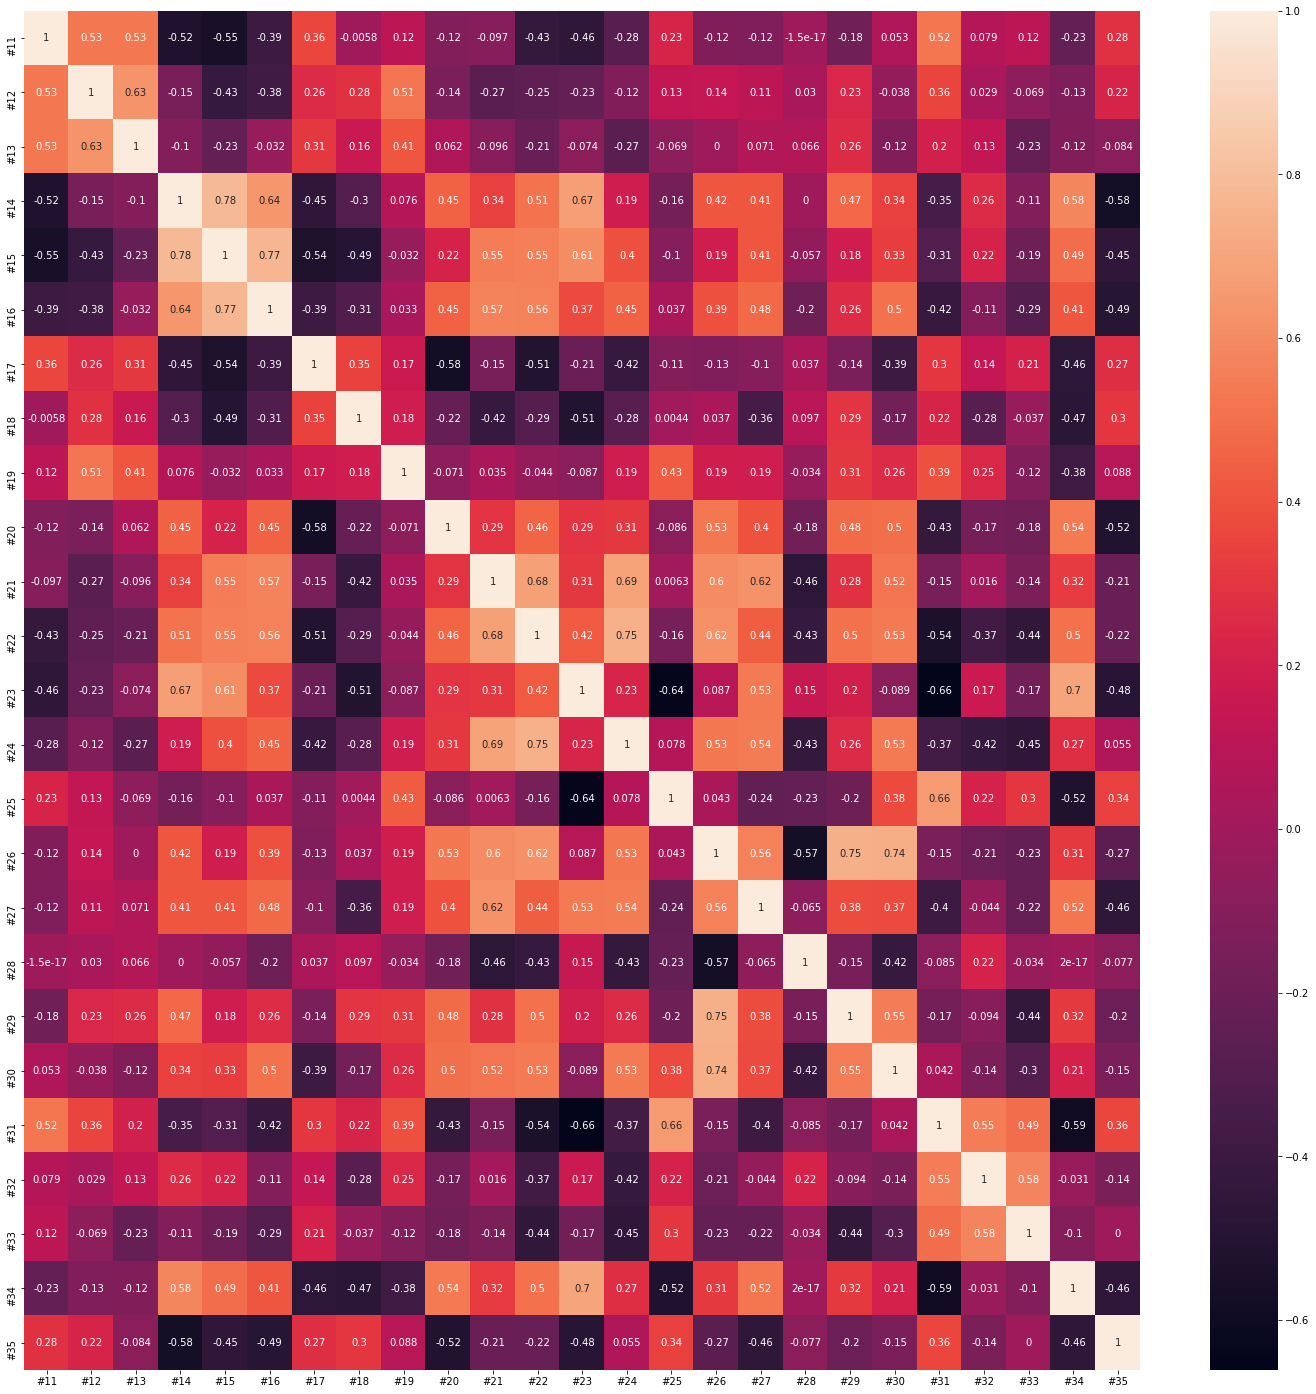

In [13]:
#get correlations of each features in dataset
corrmat = df_hm.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,25))
#plot heat map
g=sns.heatmap(df_hm[top_corr_features].corr(),annot=True)

In [14]:
non_demographic = df.drop(['#1', '#2', '#3', '#4', '#5', '#6', '#7'], axis=1)
demographic = df[['#1', '#2', '#3', '#4', '#5', '#6', '#7']]

In [15]:
len(non_demographic.columns.to_list())

28

In [16]:
len(demographic.columns.to_list())

7

In [17]:
for i in non_demographic.columns:
    non_demographic[i] = non_demographic[i].astype('category')

In [18]:
cat_values = ['Strongly disagree', 'Somewhat disagree', 'Neither disagree nor agree', 'Somewhat agree', 'Strongly agree']
cat_map = {'Strongly disagree': 0, 'Somewhat disagree': 1, 'Neither disagree nor agree': 2, 'Somewhat agree': 3, 'Strongly agree': 4}

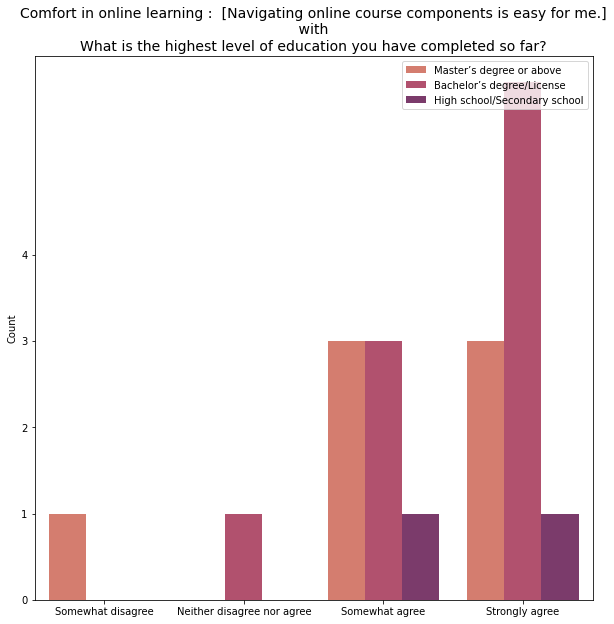

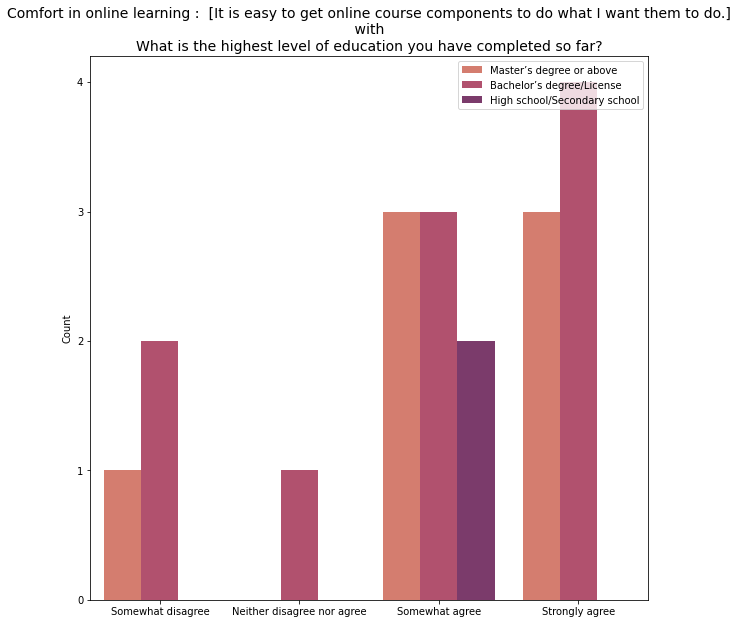

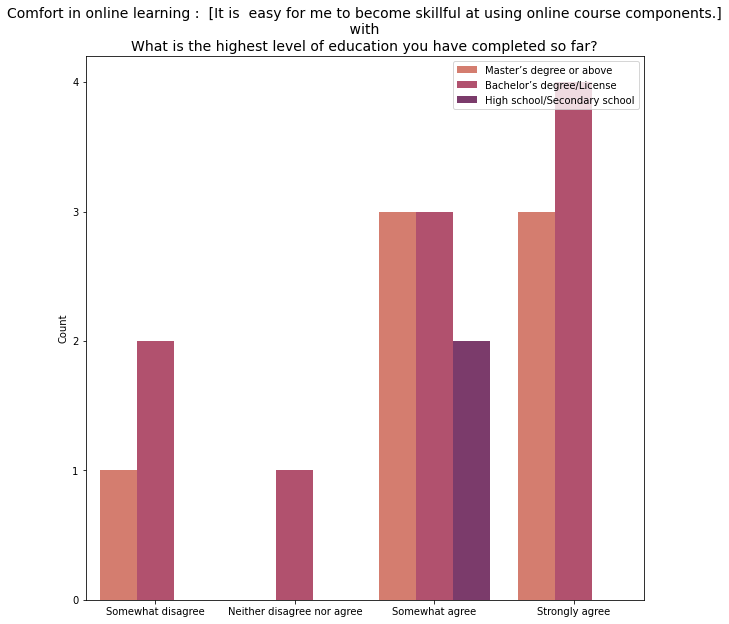

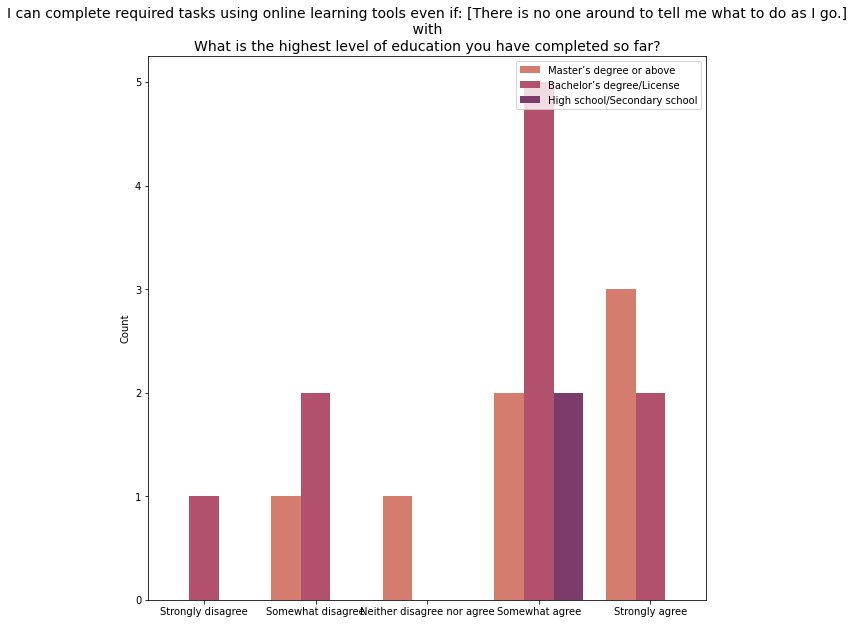

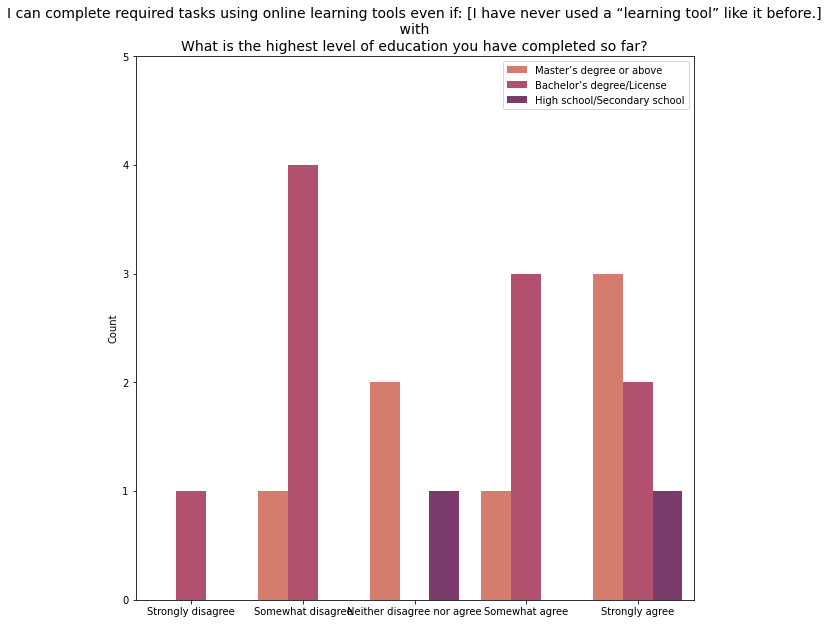

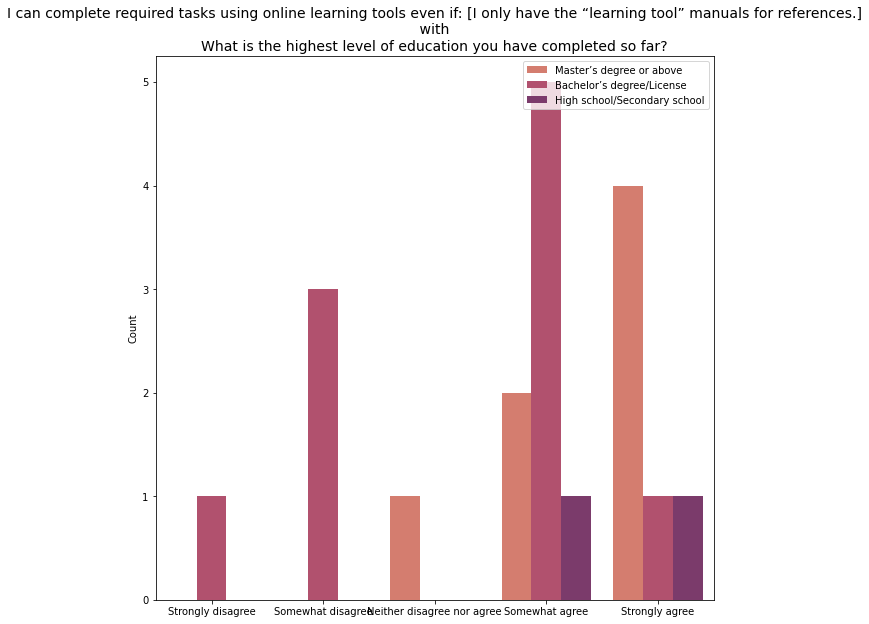

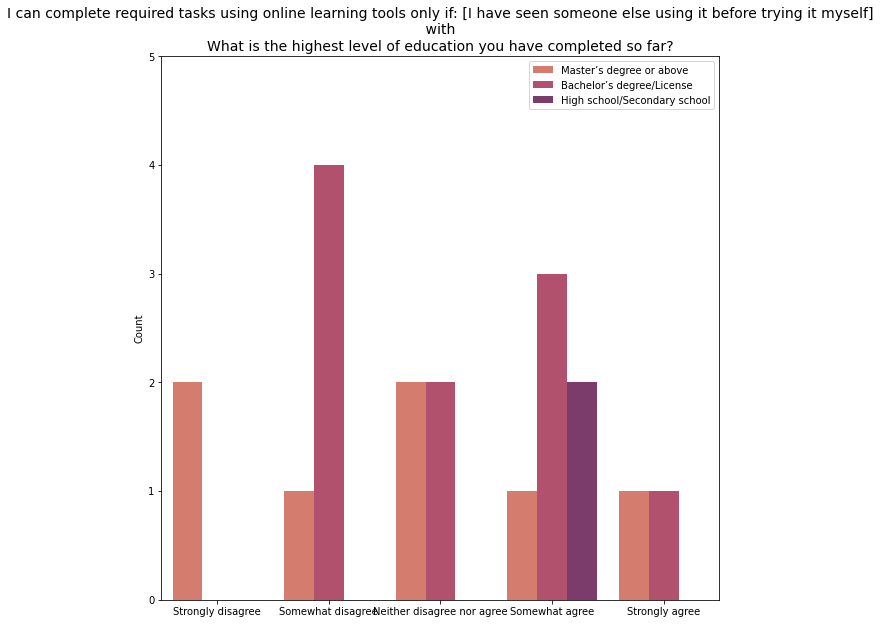

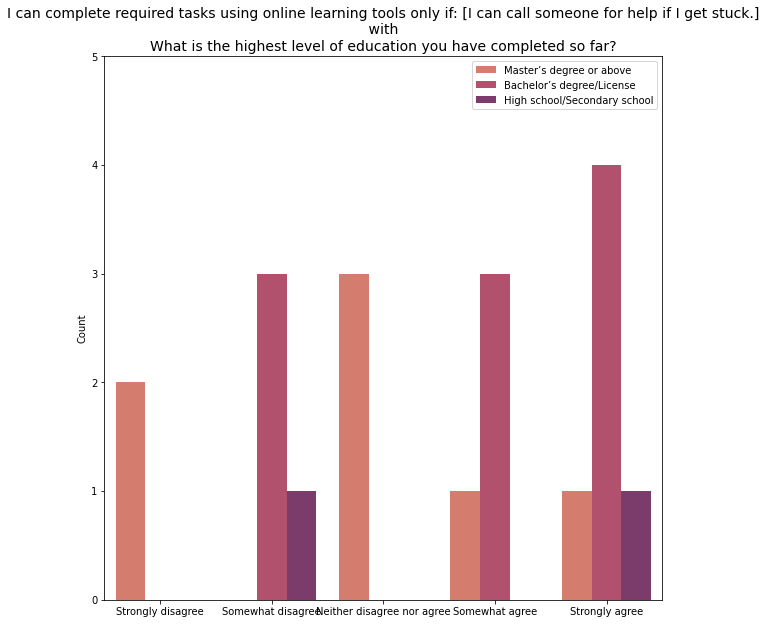

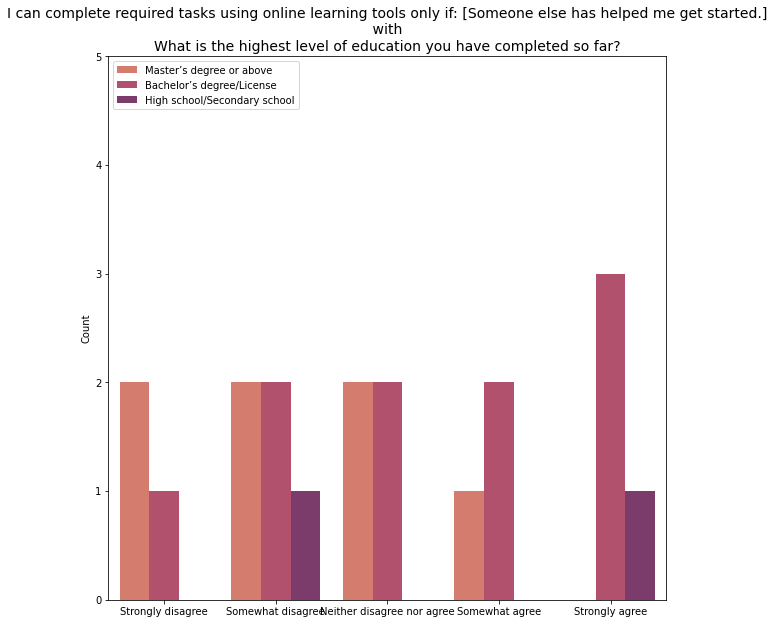

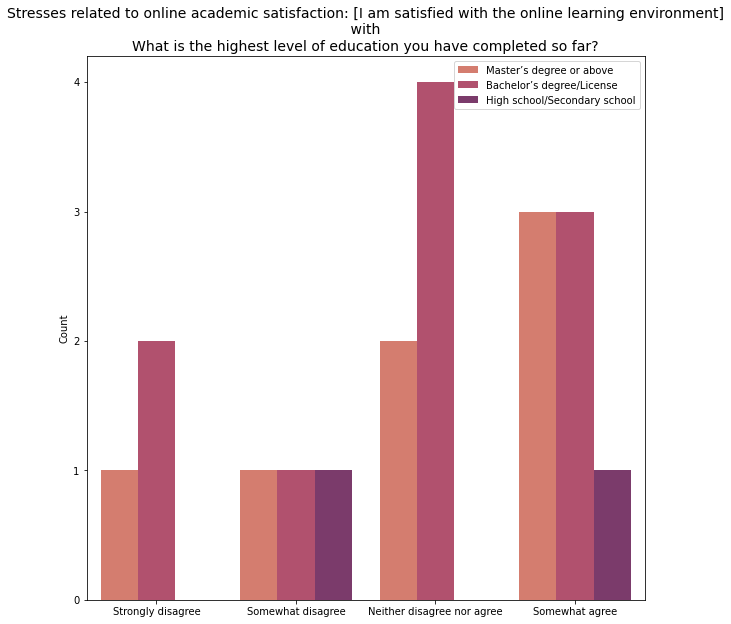

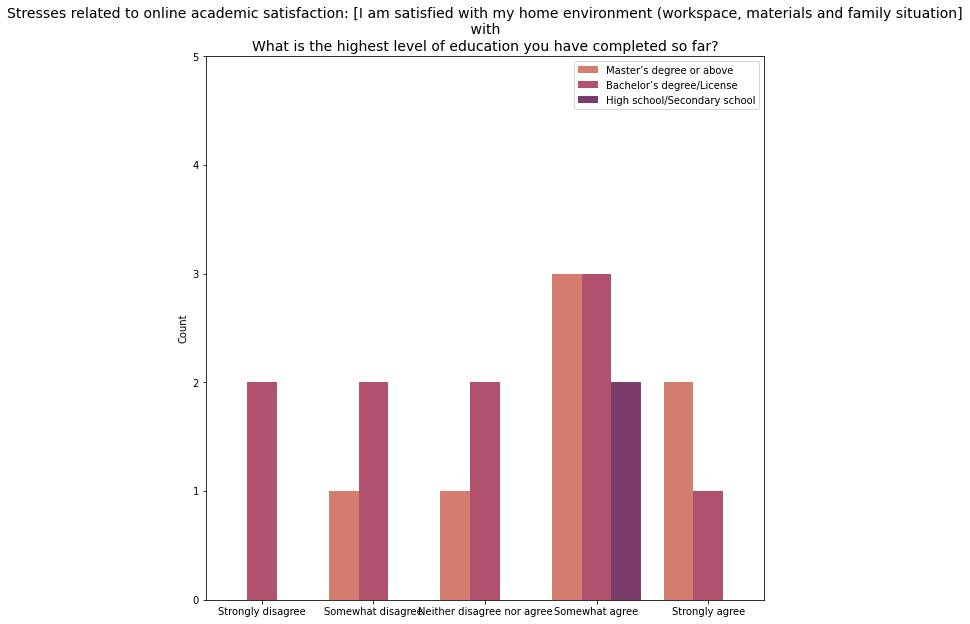

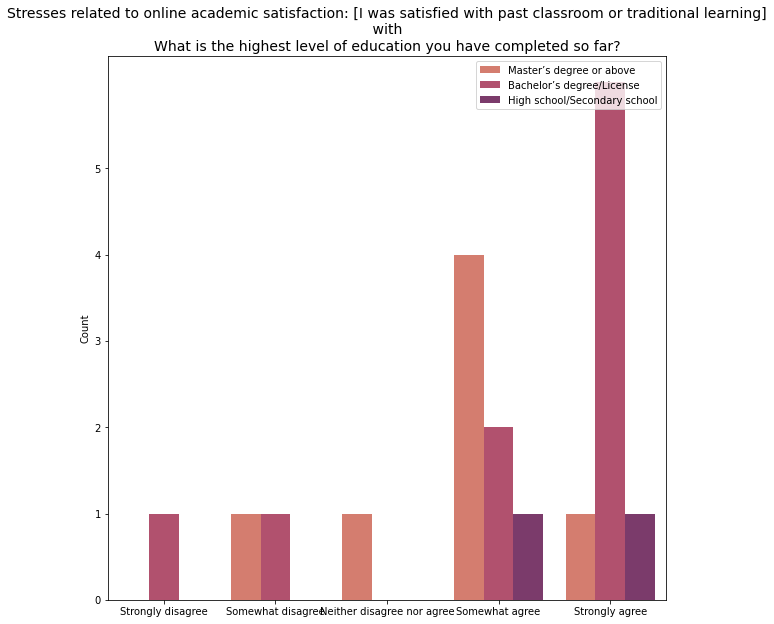

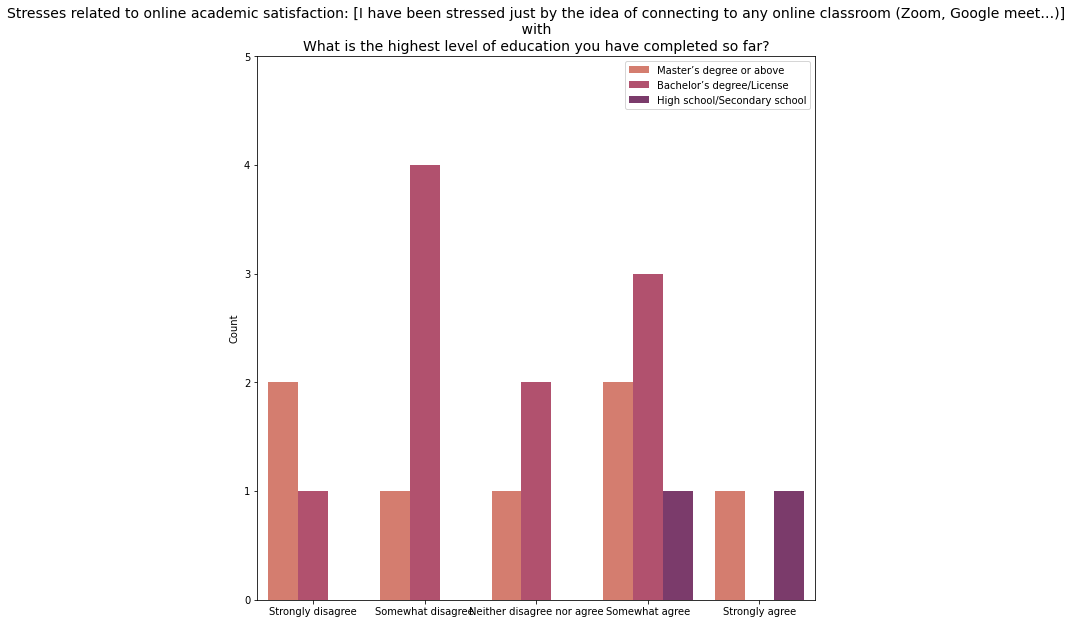

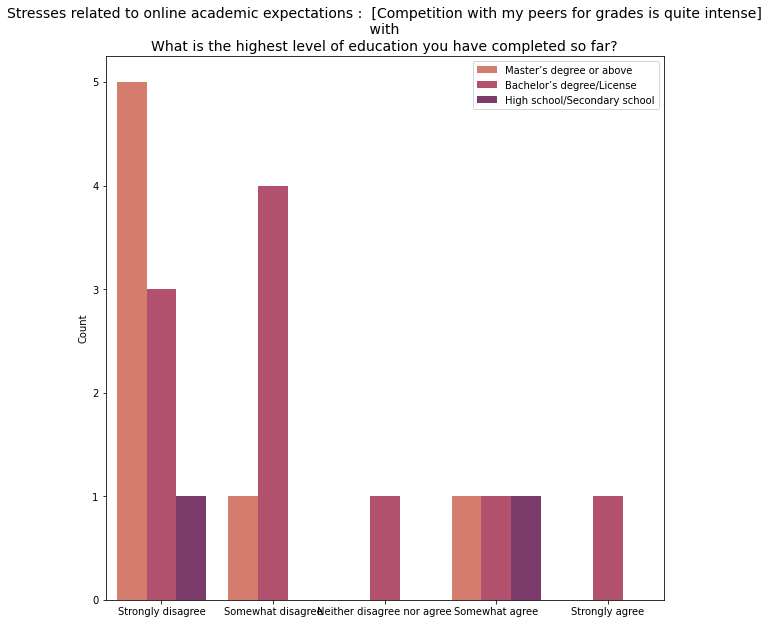

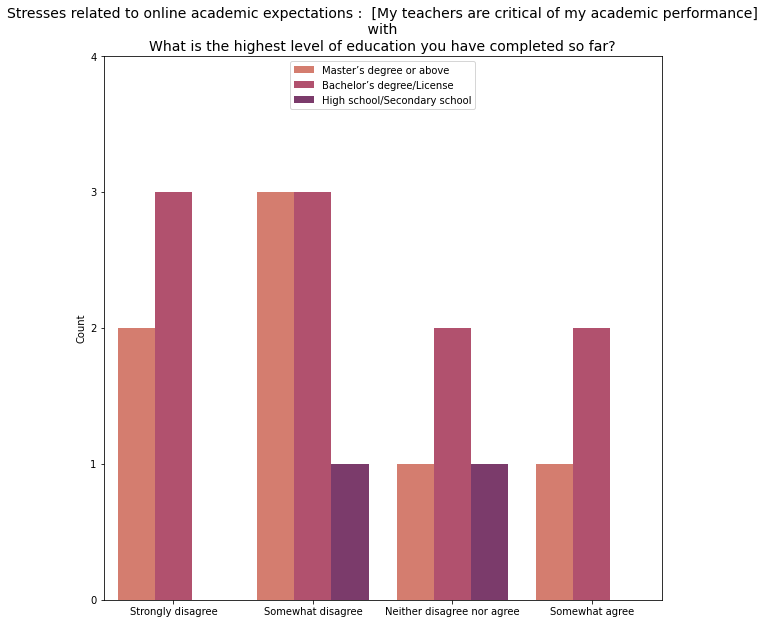

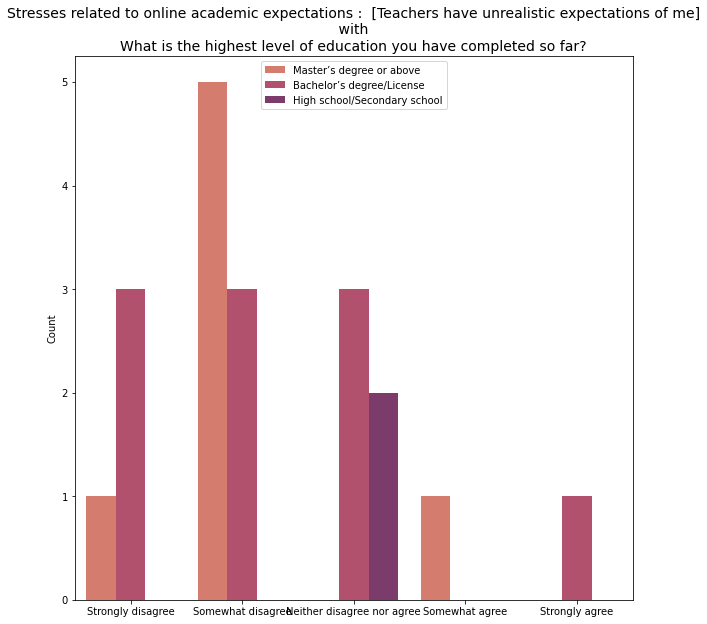

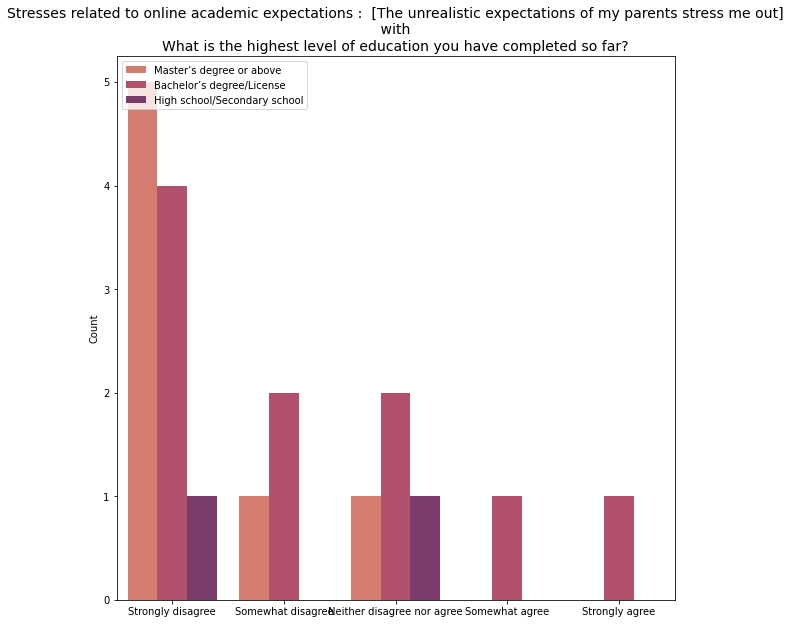

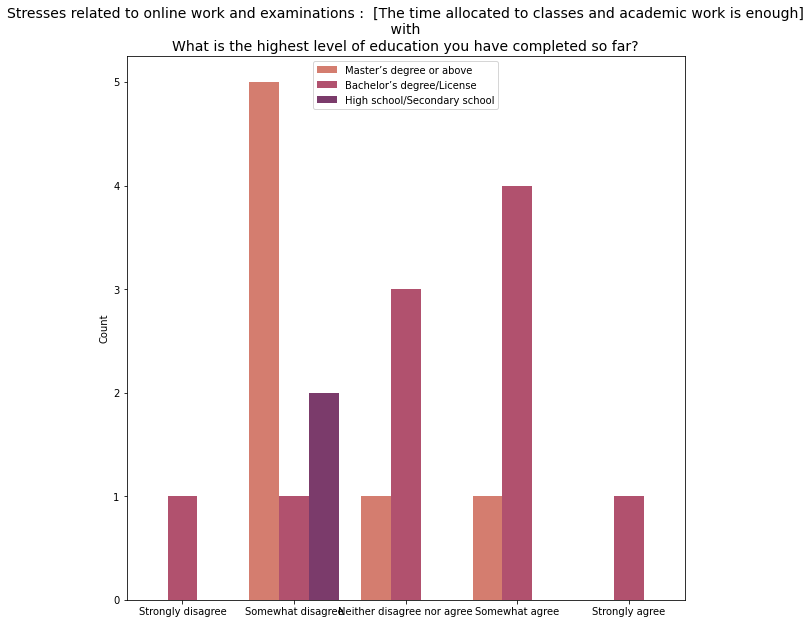

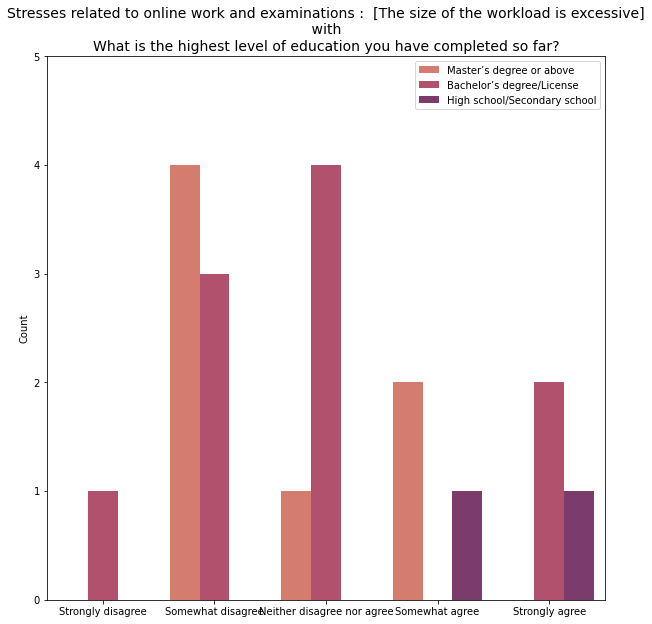

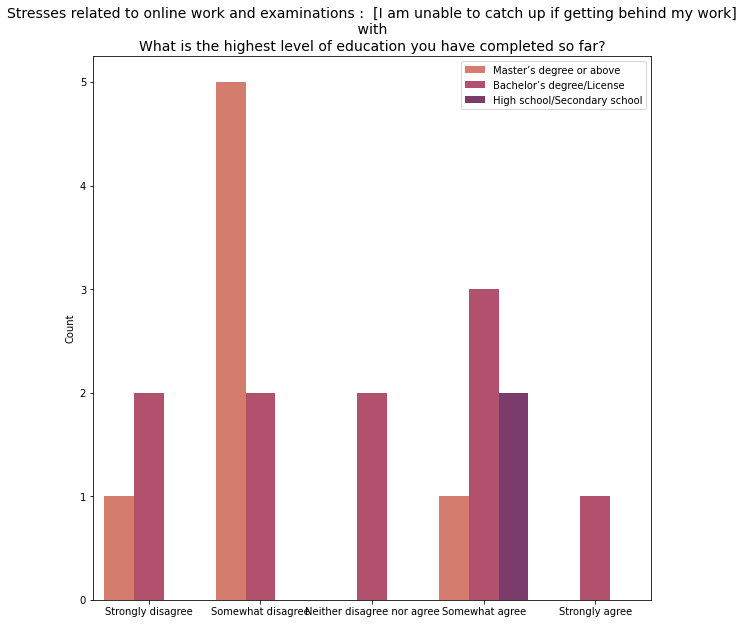

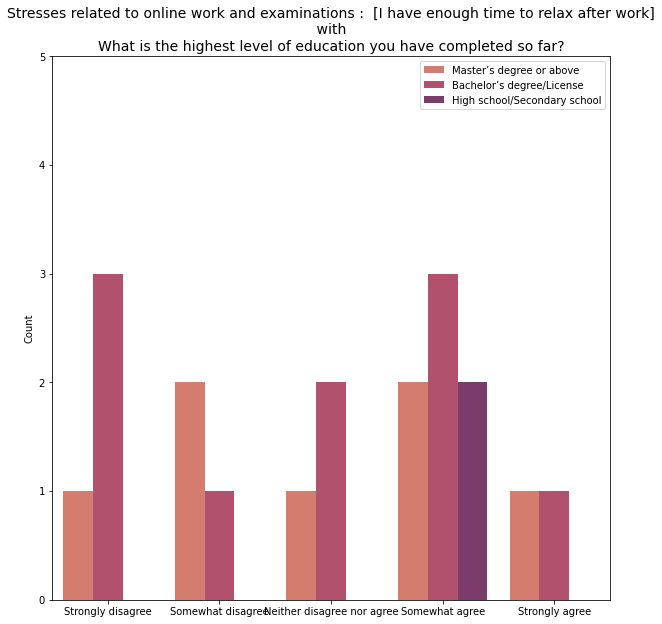

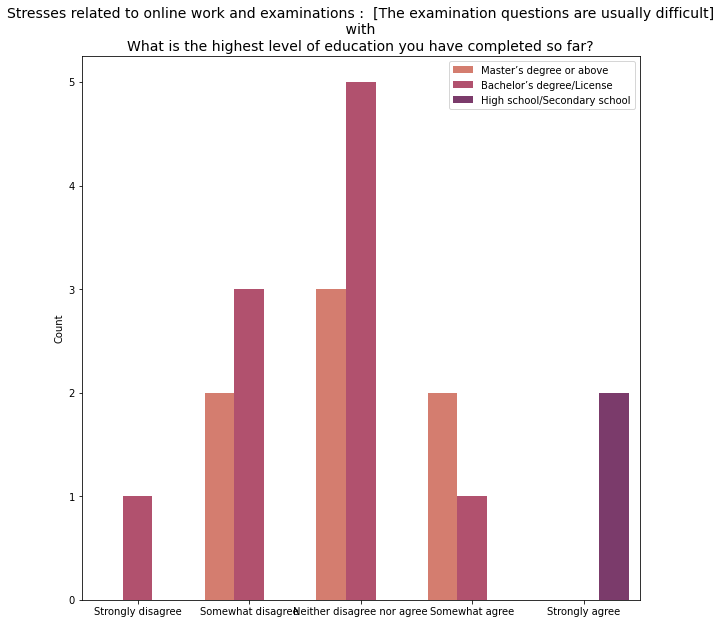

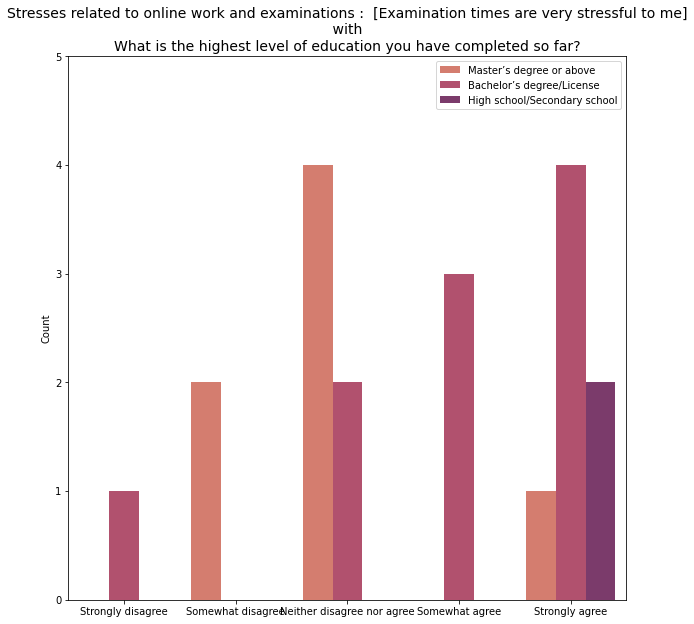

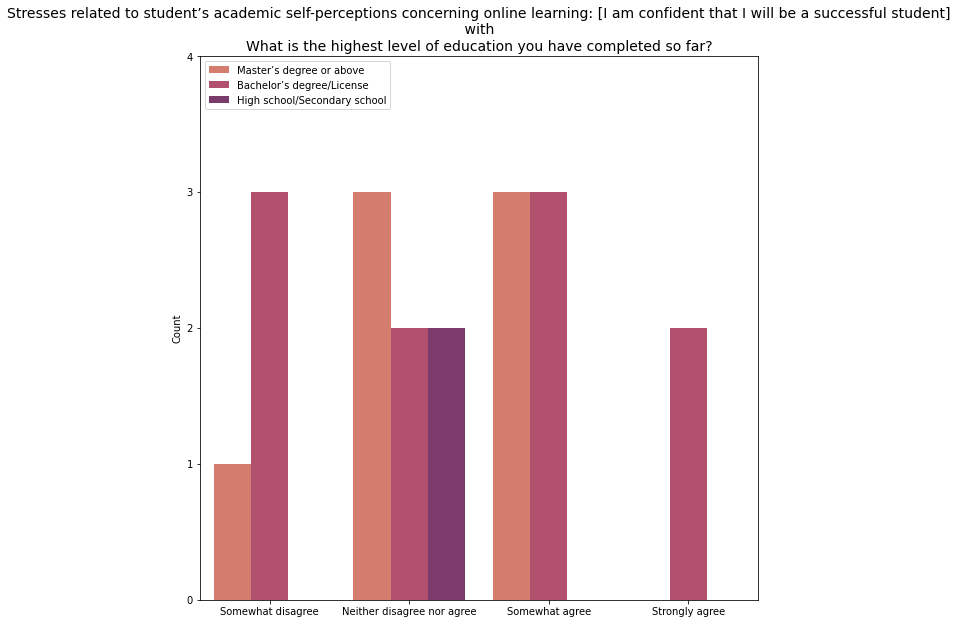

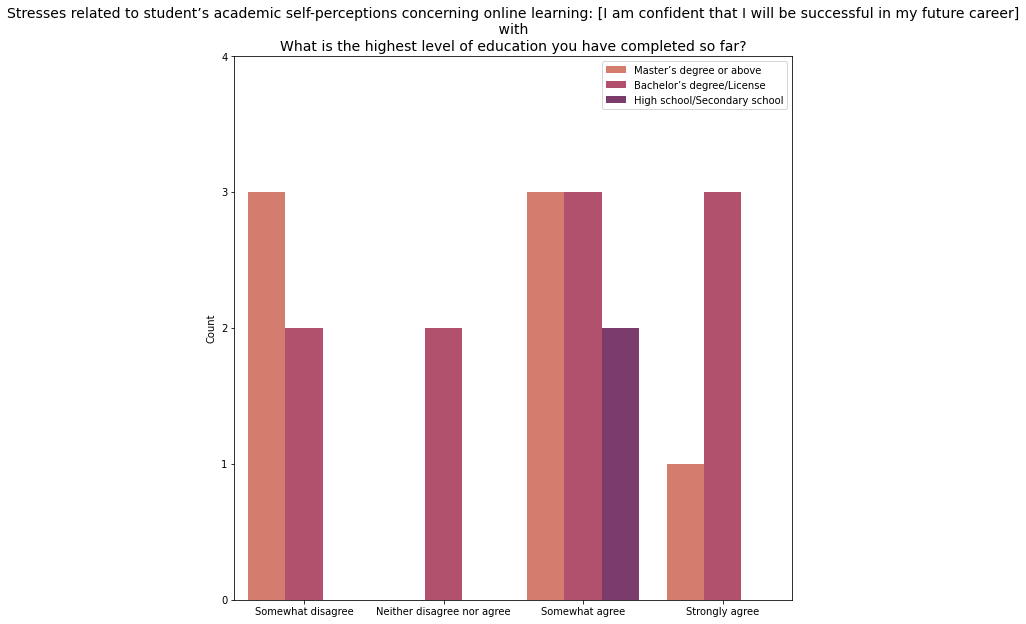

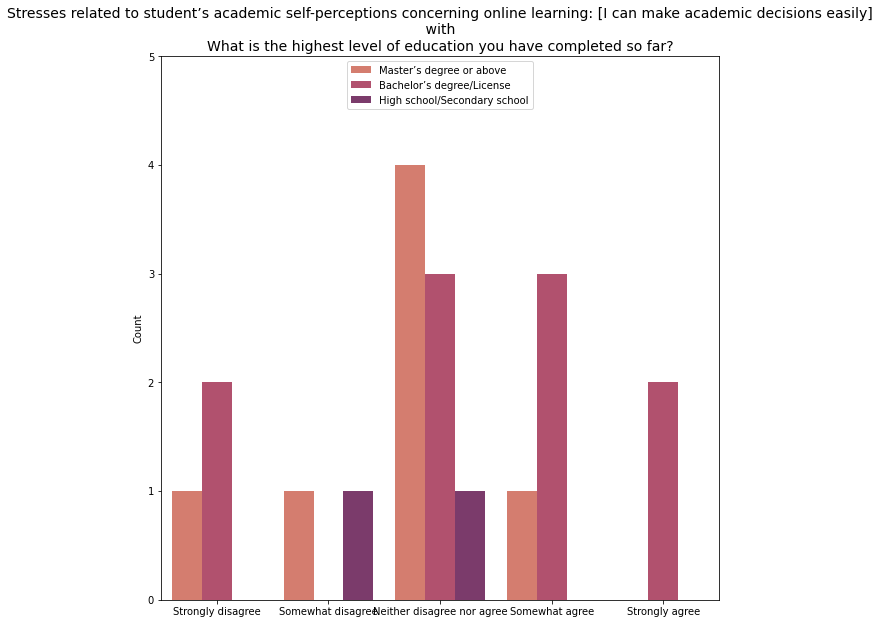

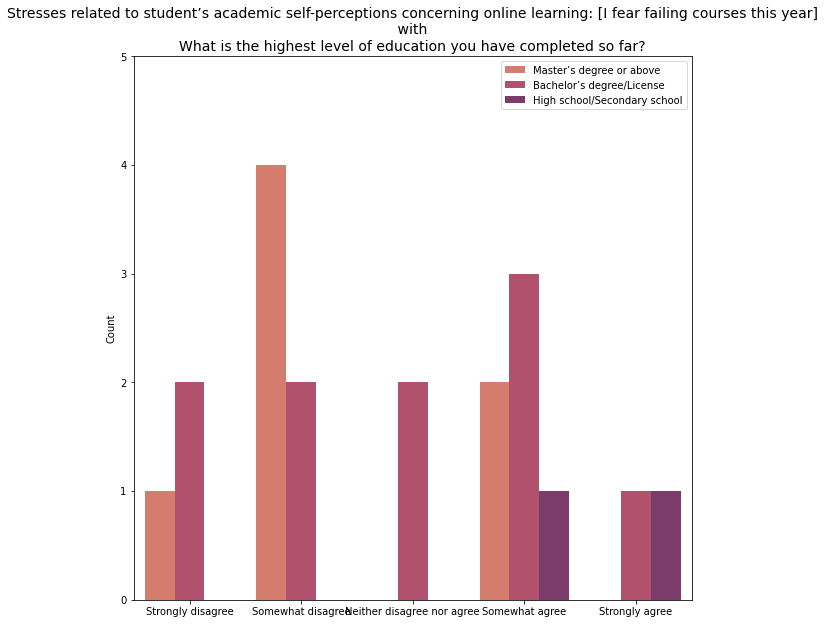

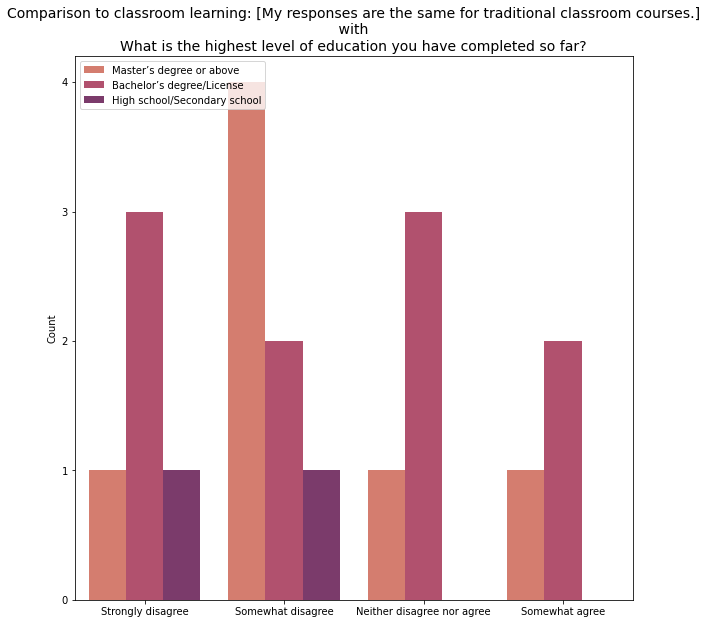

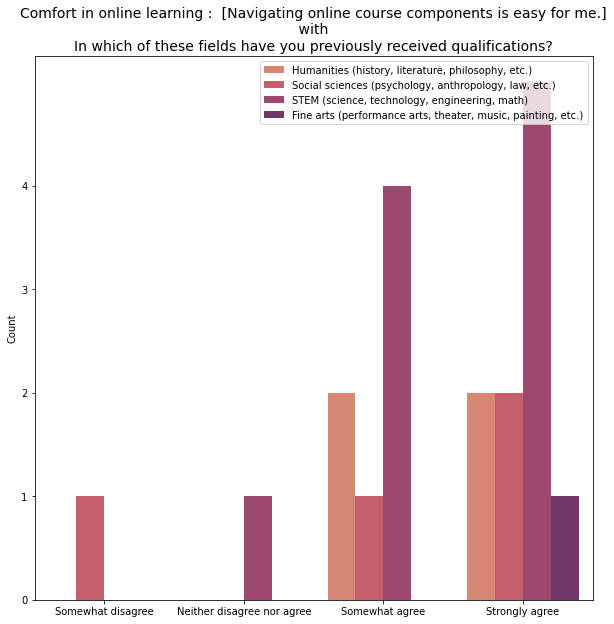

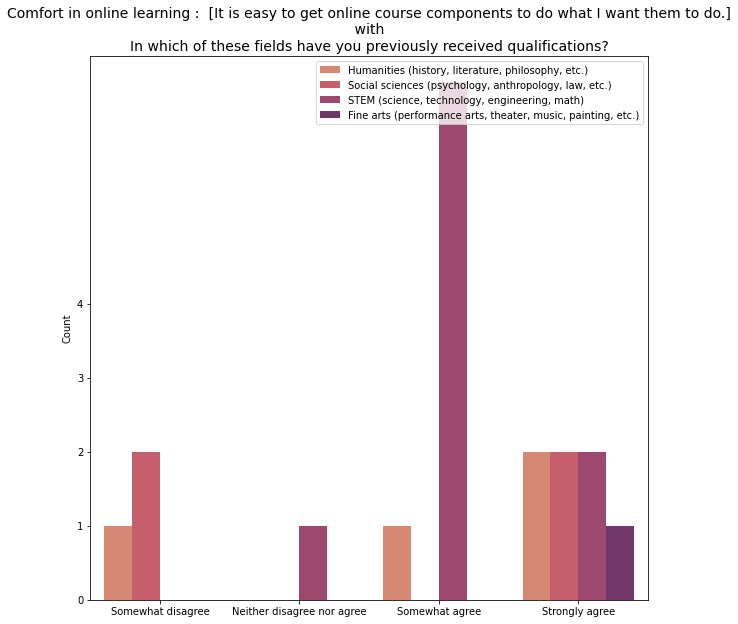

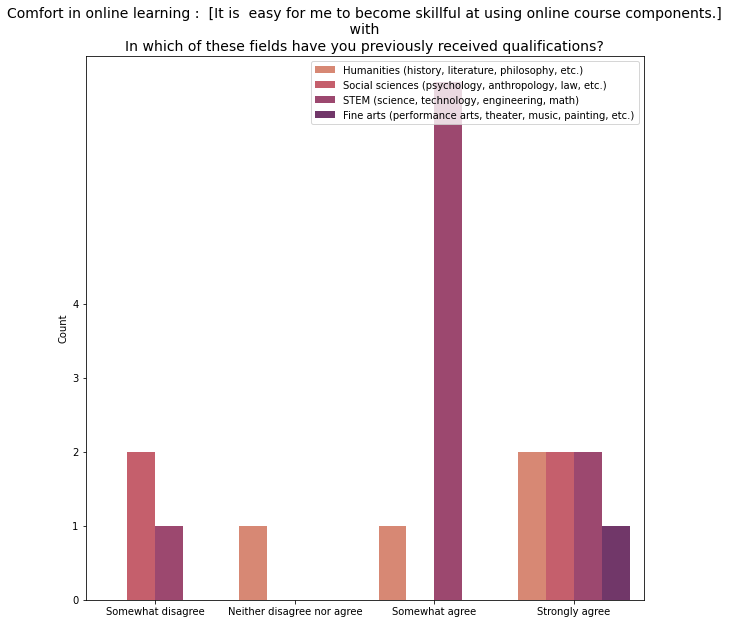

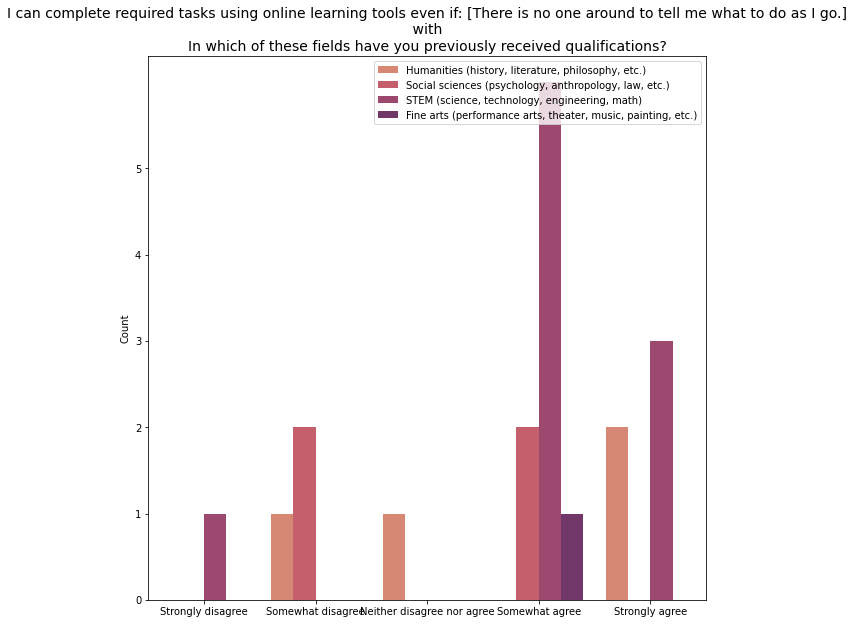

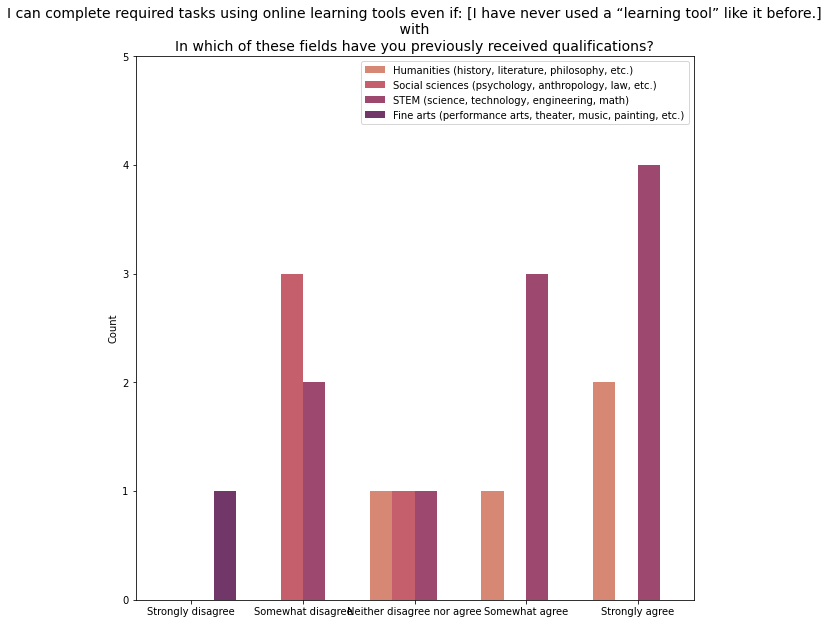

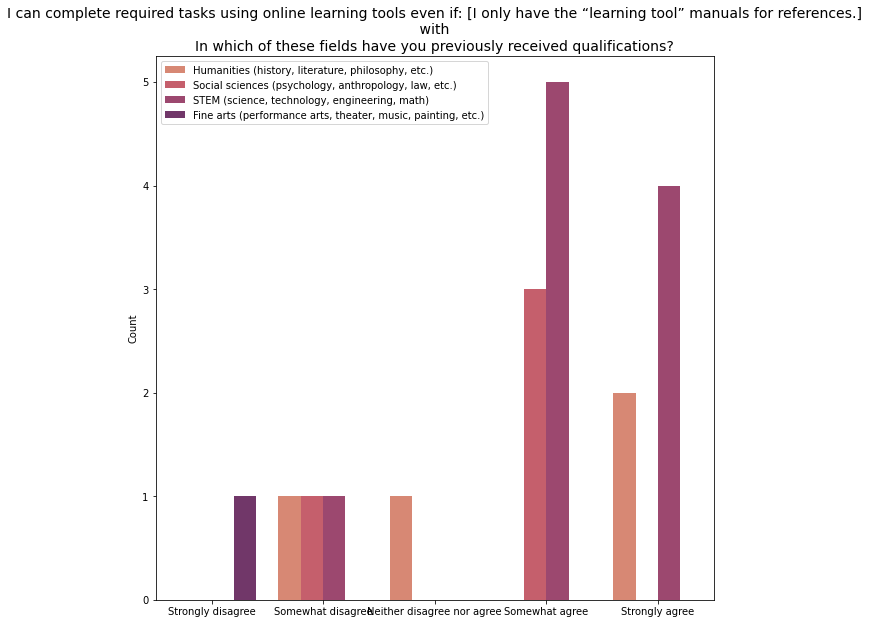

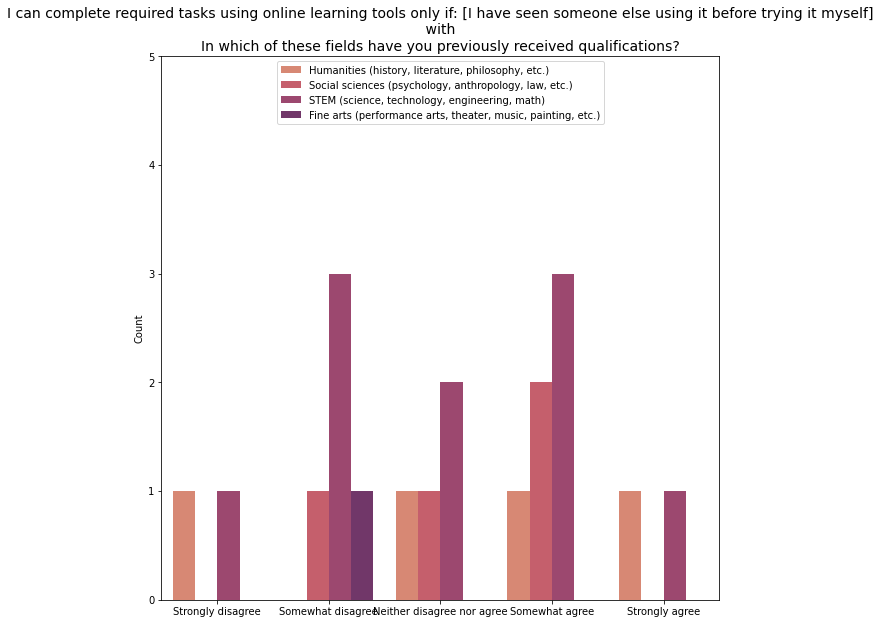

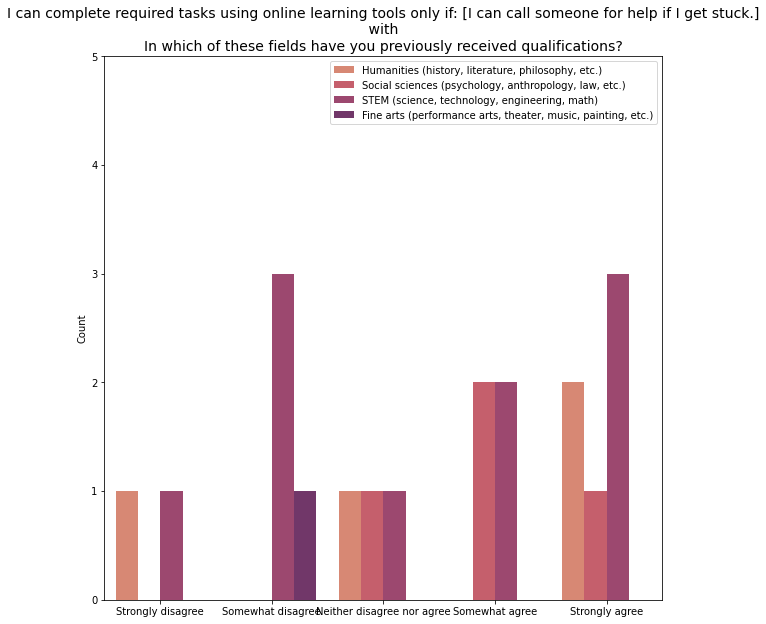

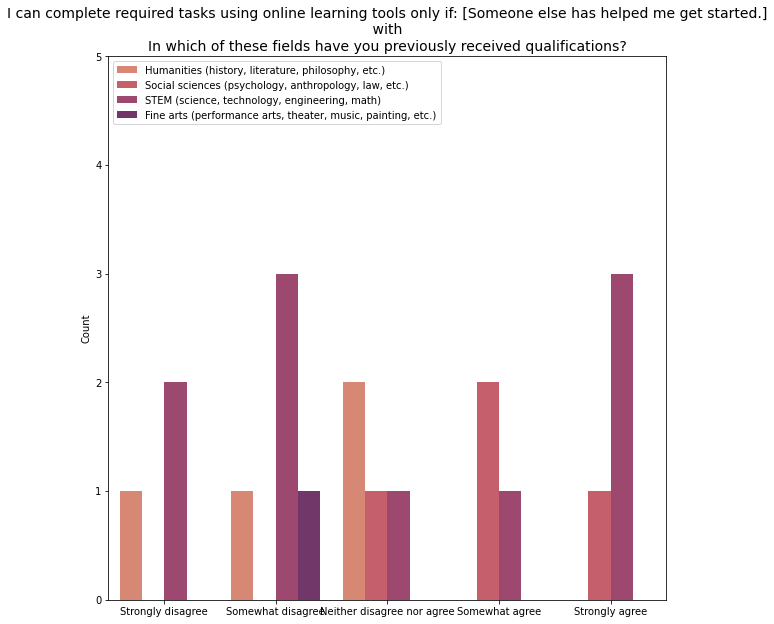

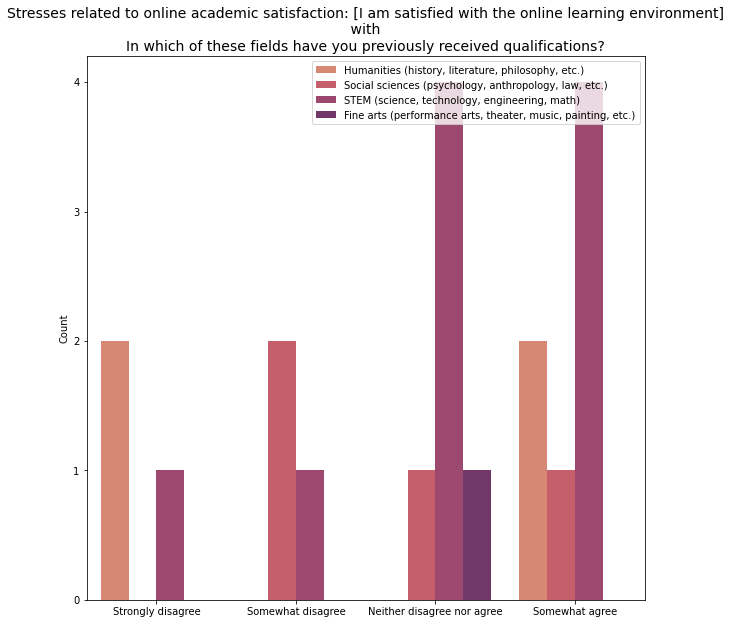

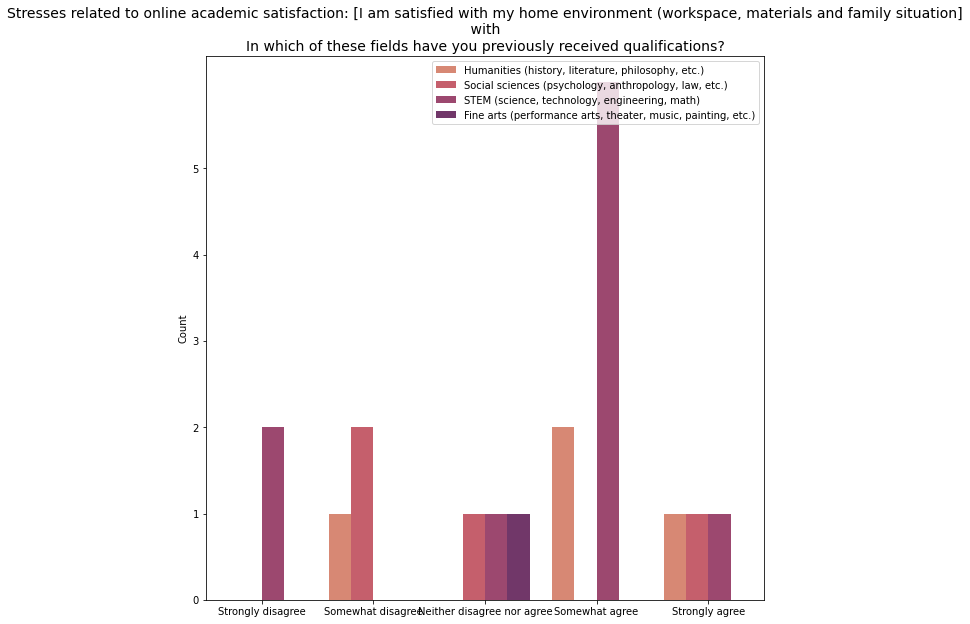

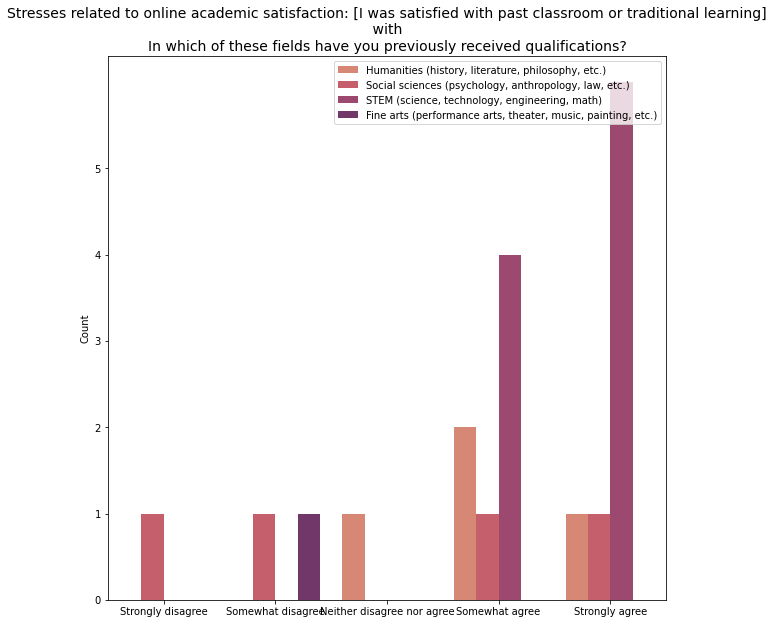

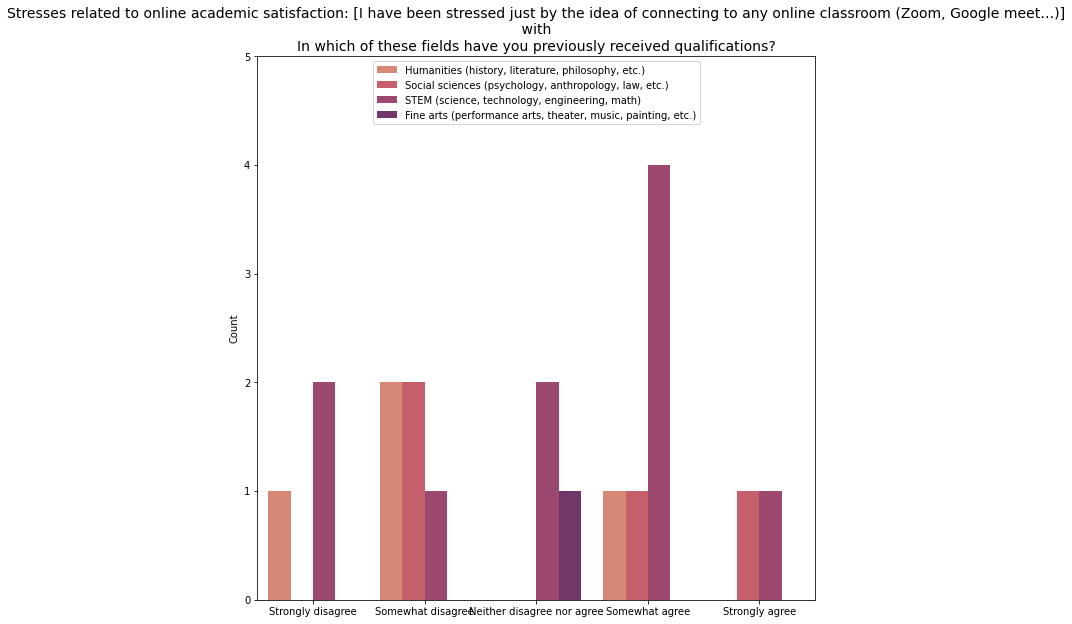

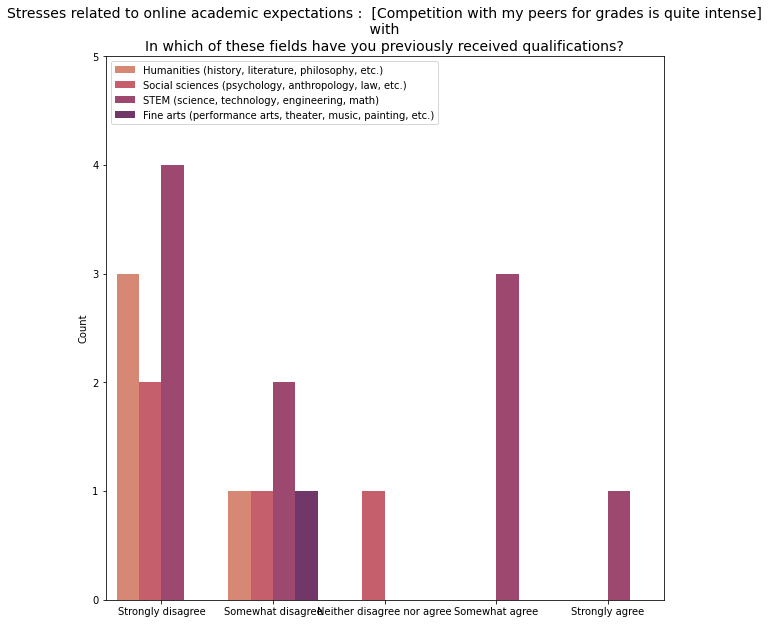

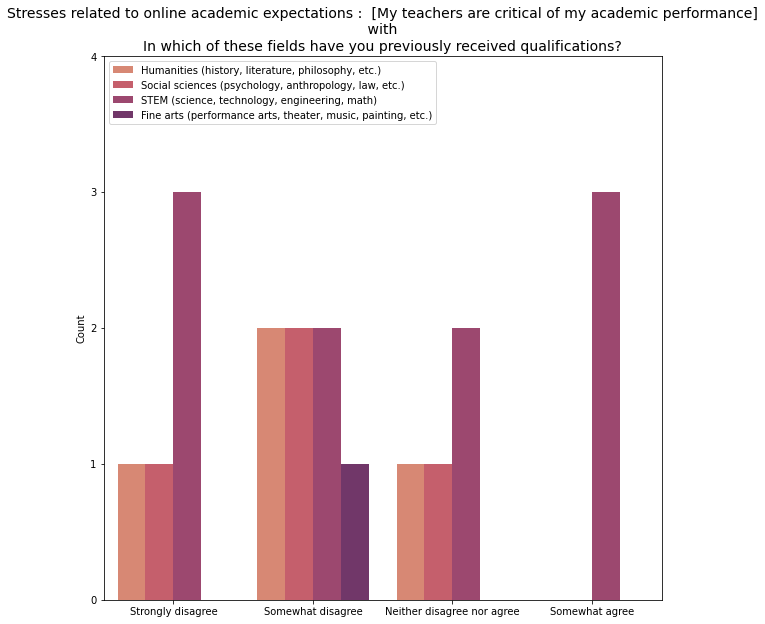

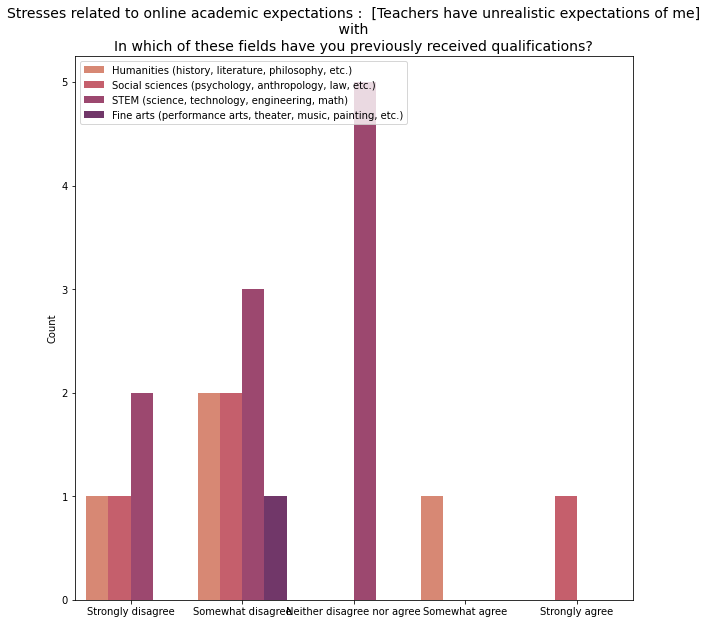

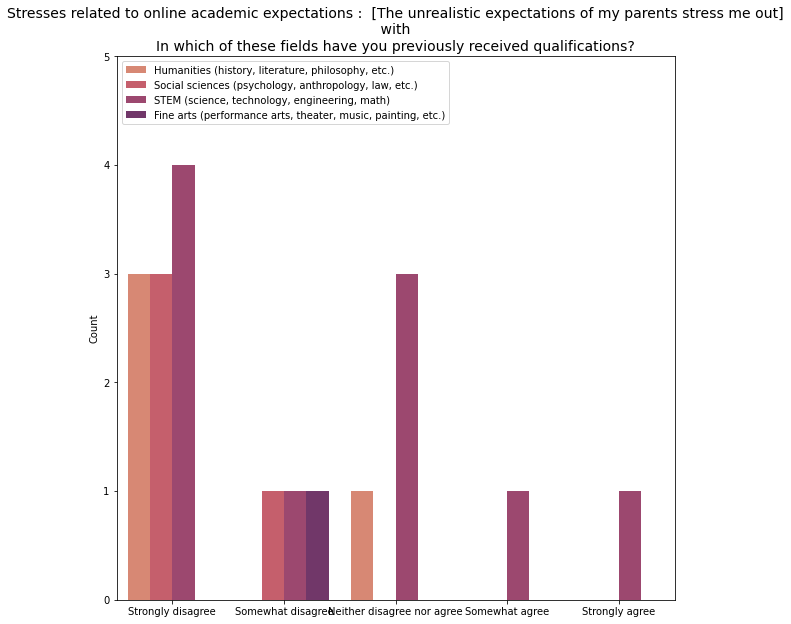

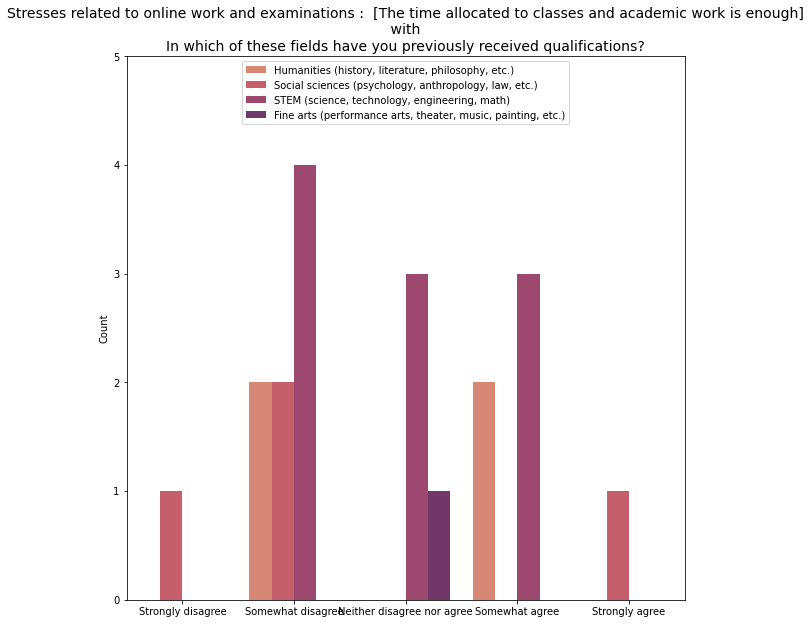

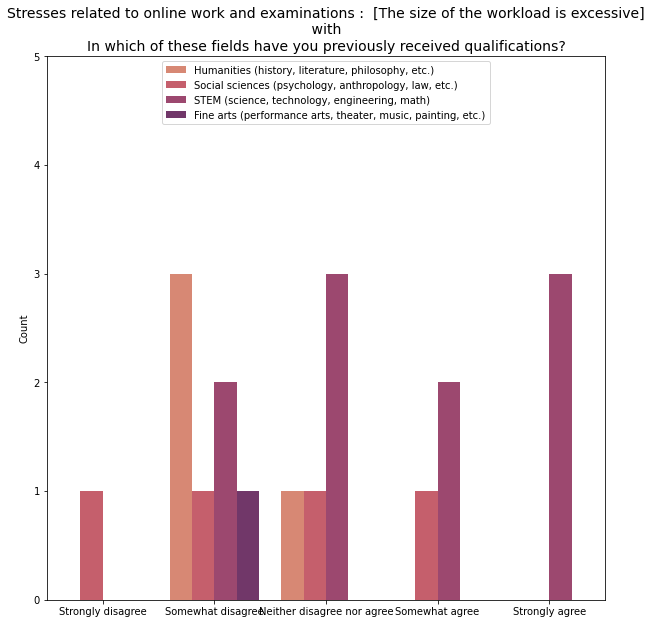

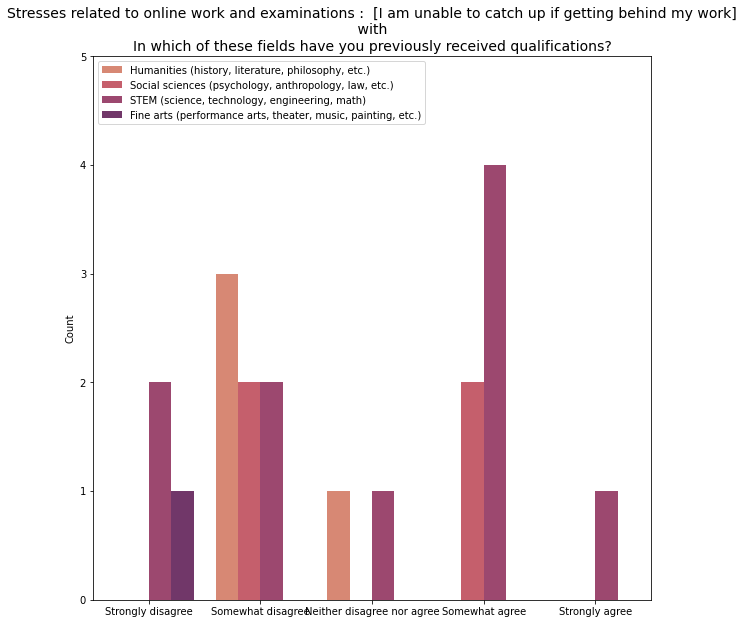

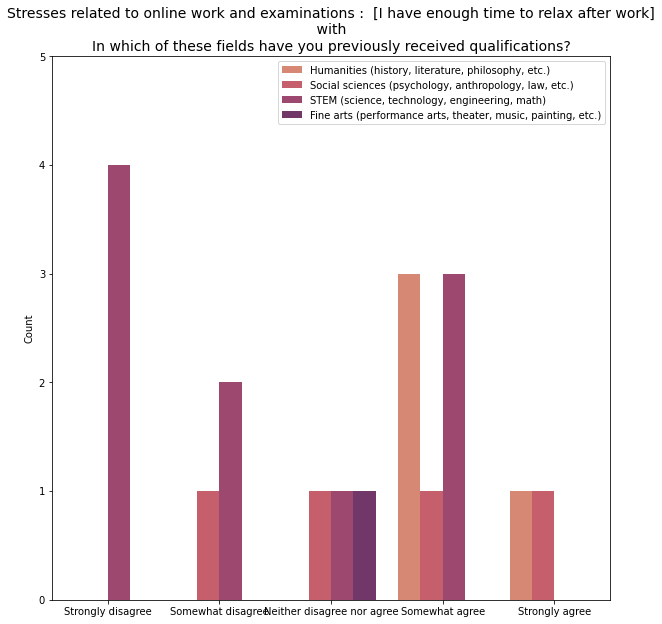

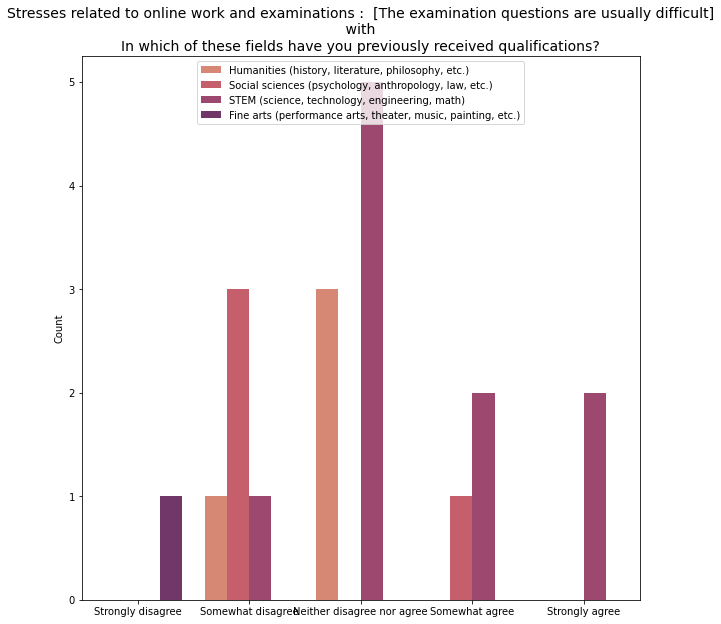

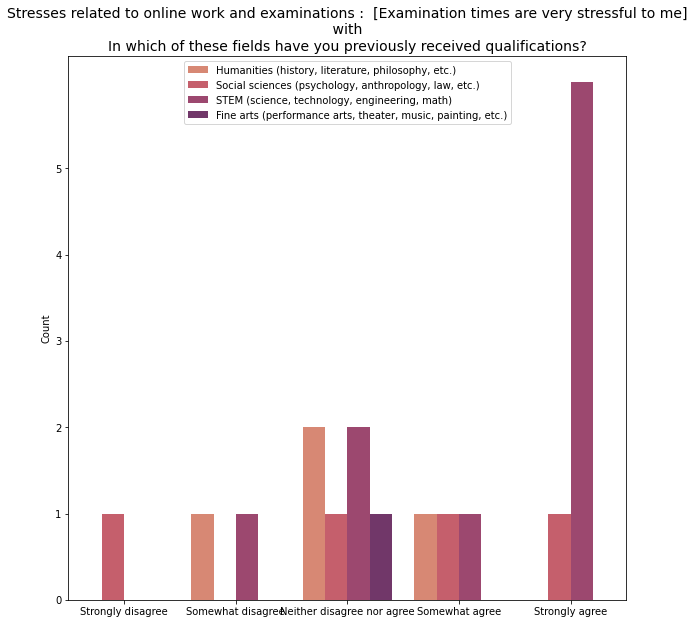

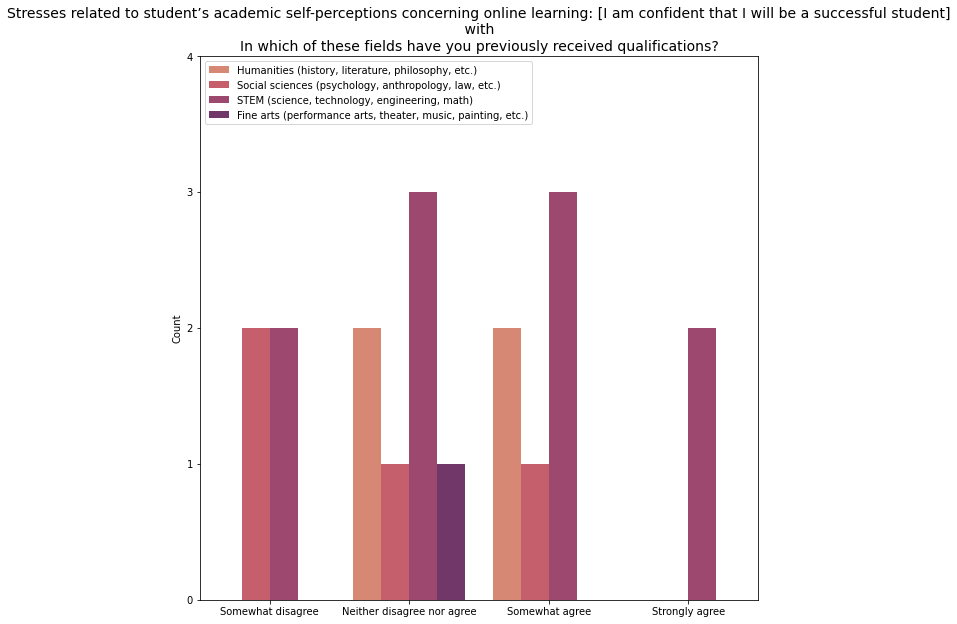

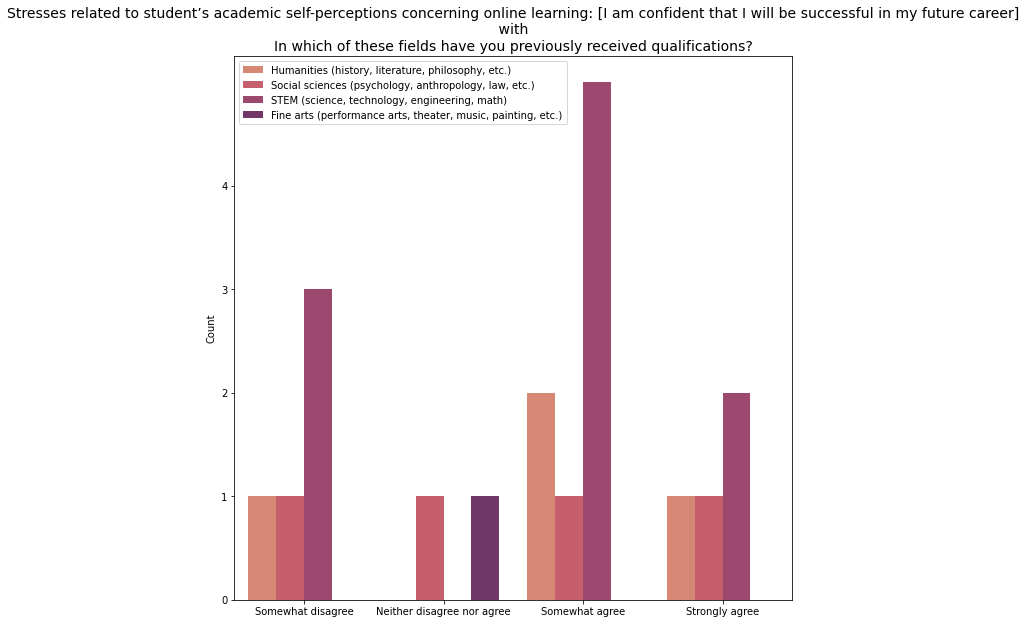

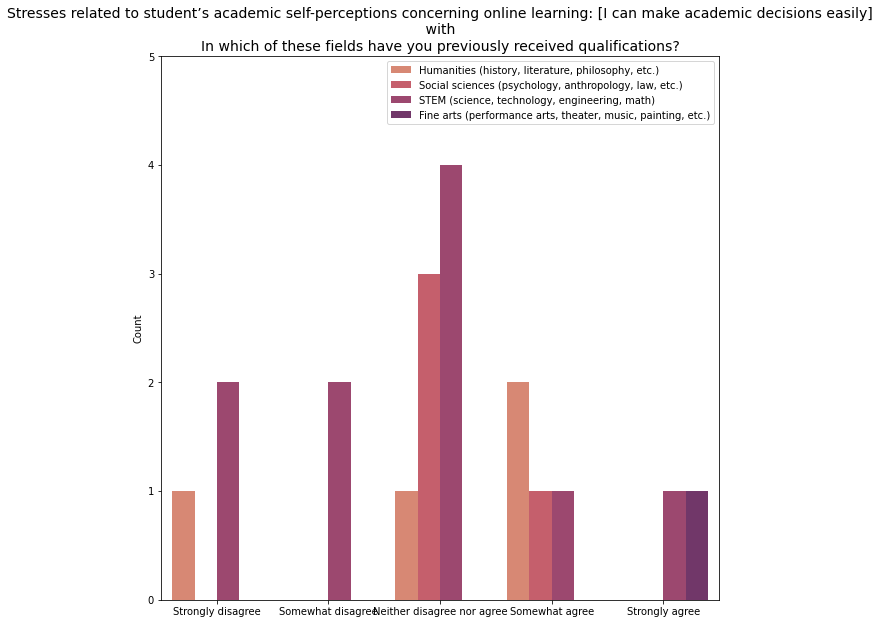

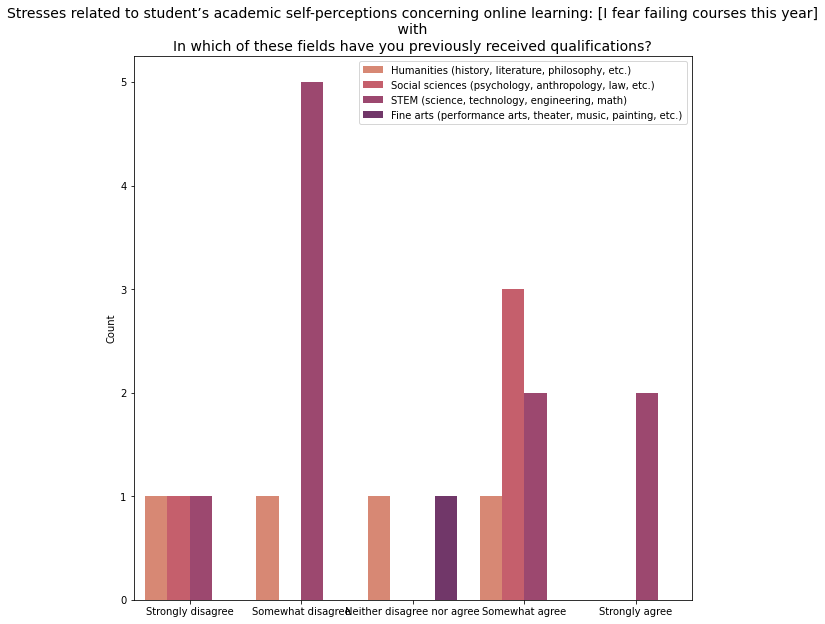

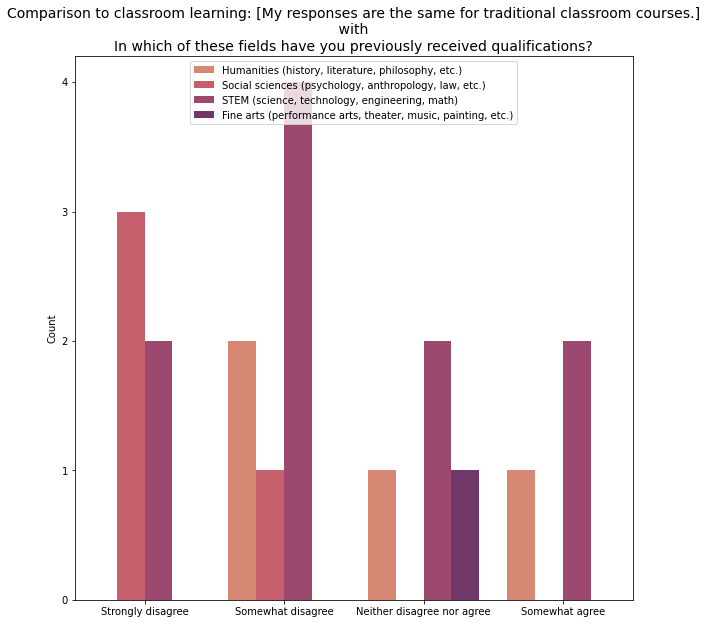

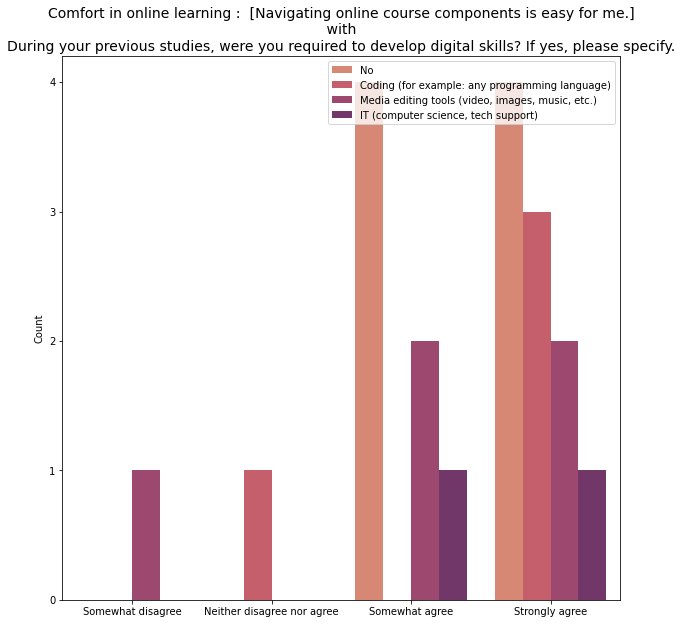

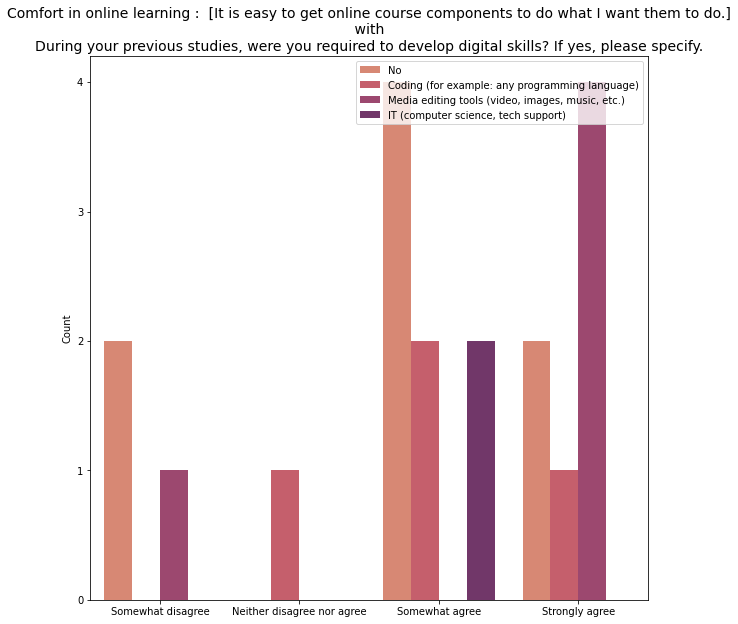

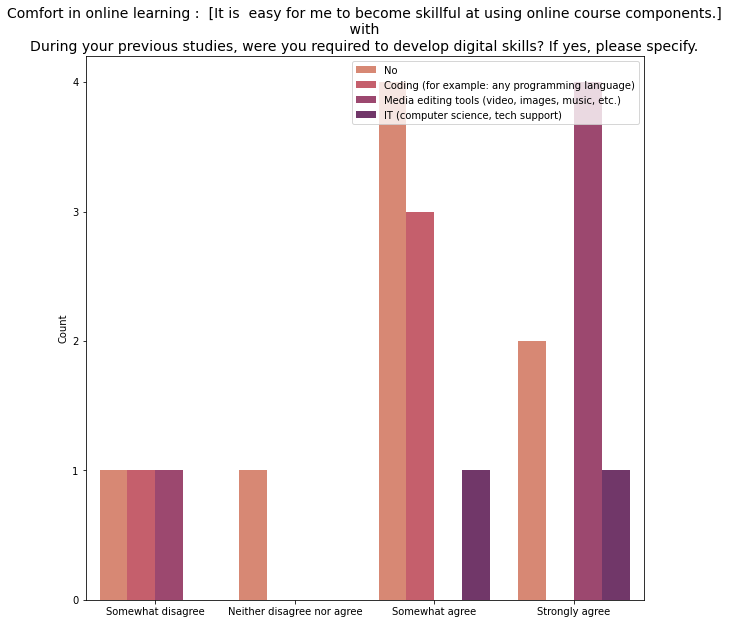

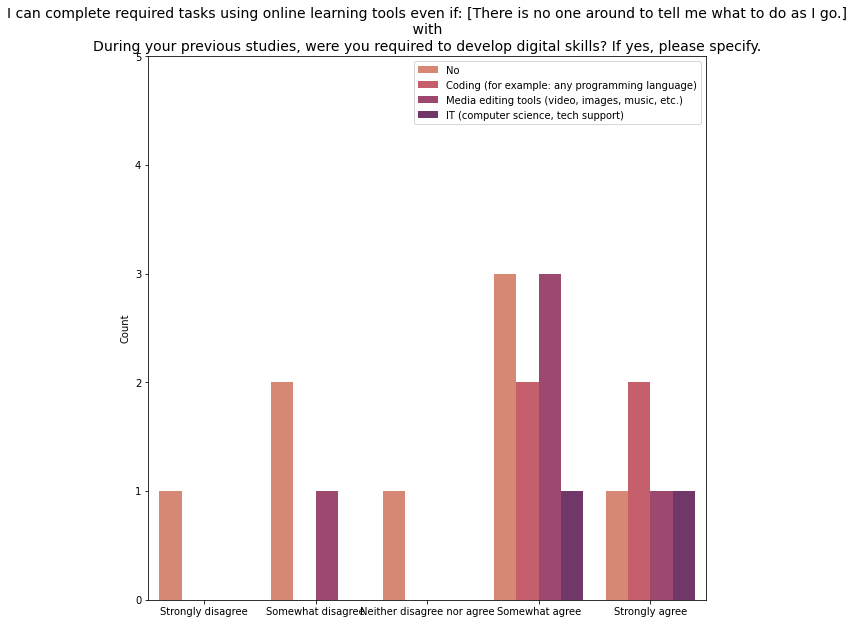

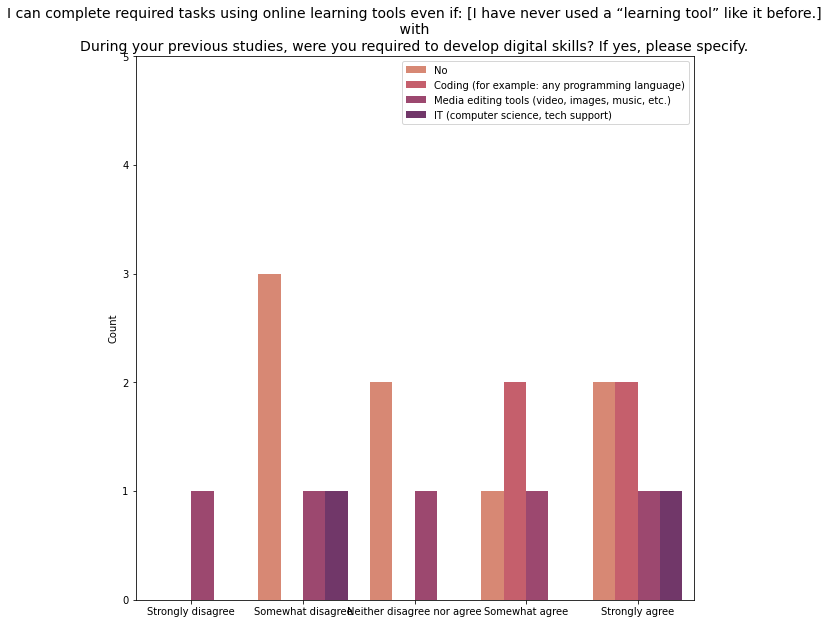

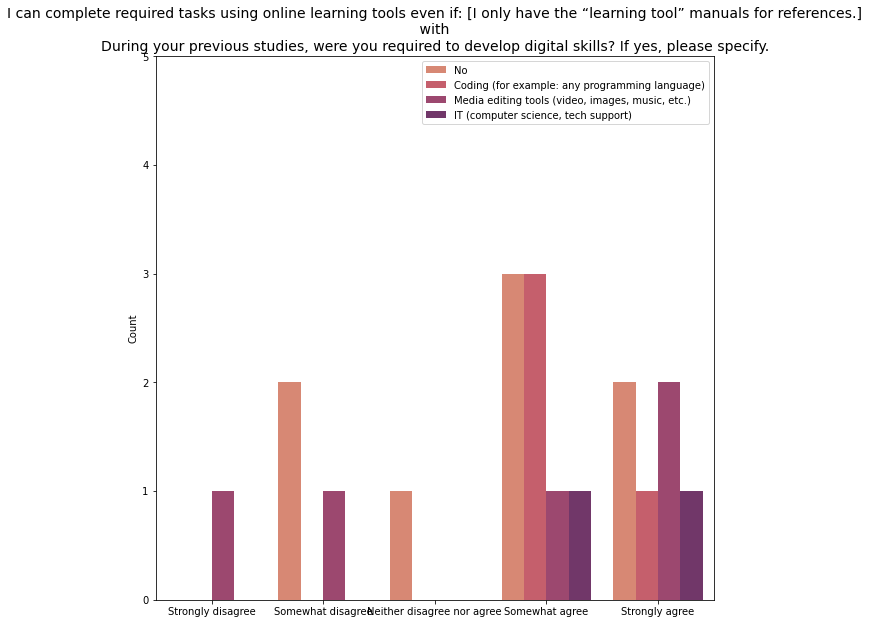

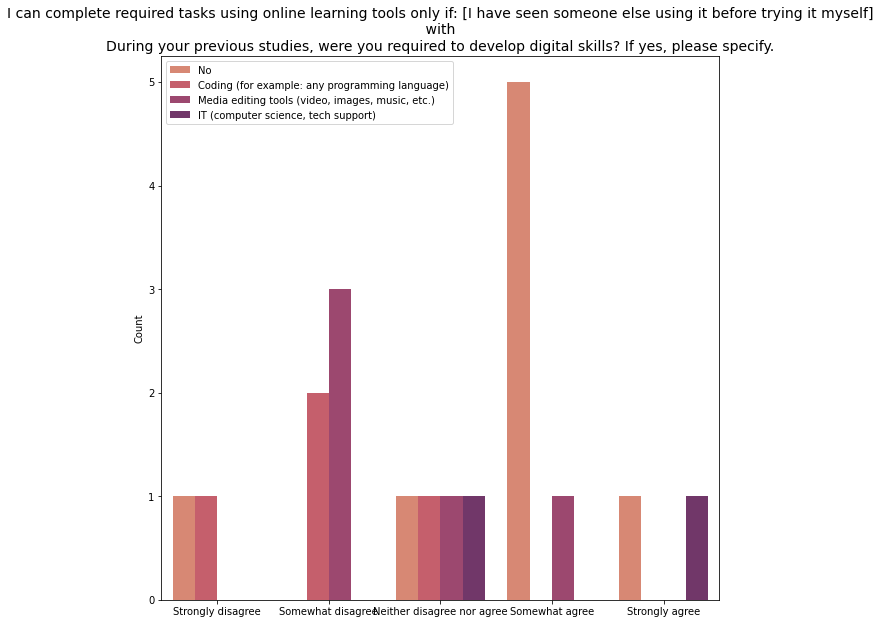

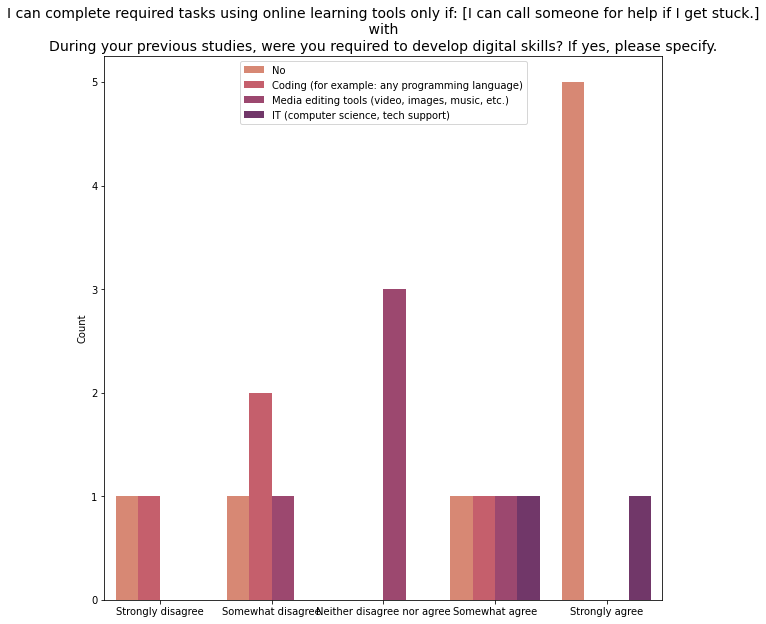

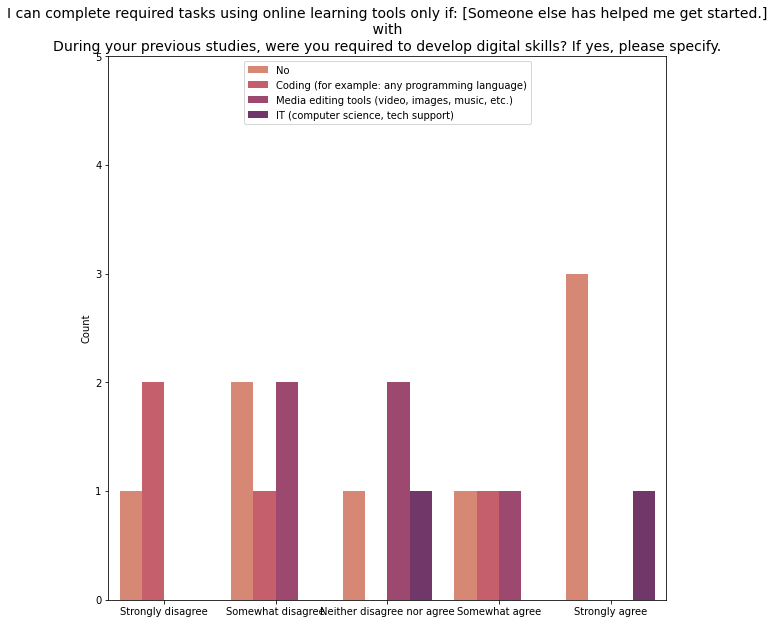

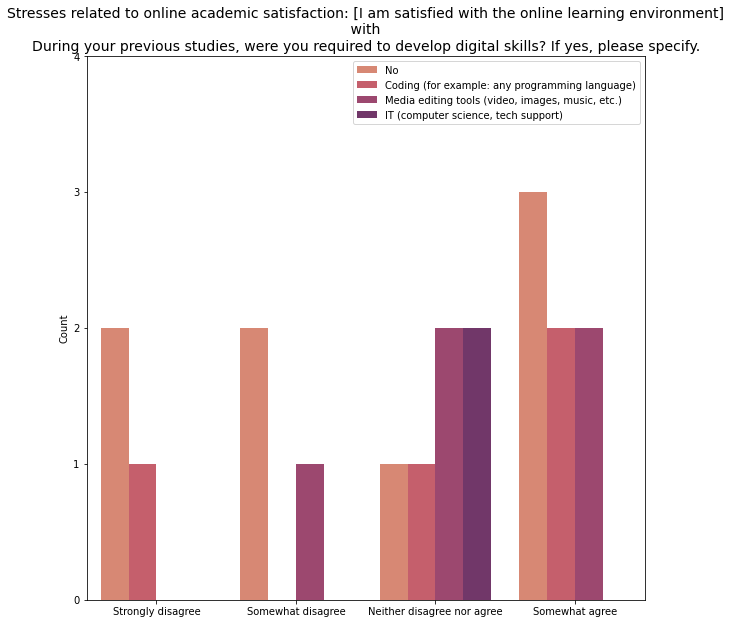

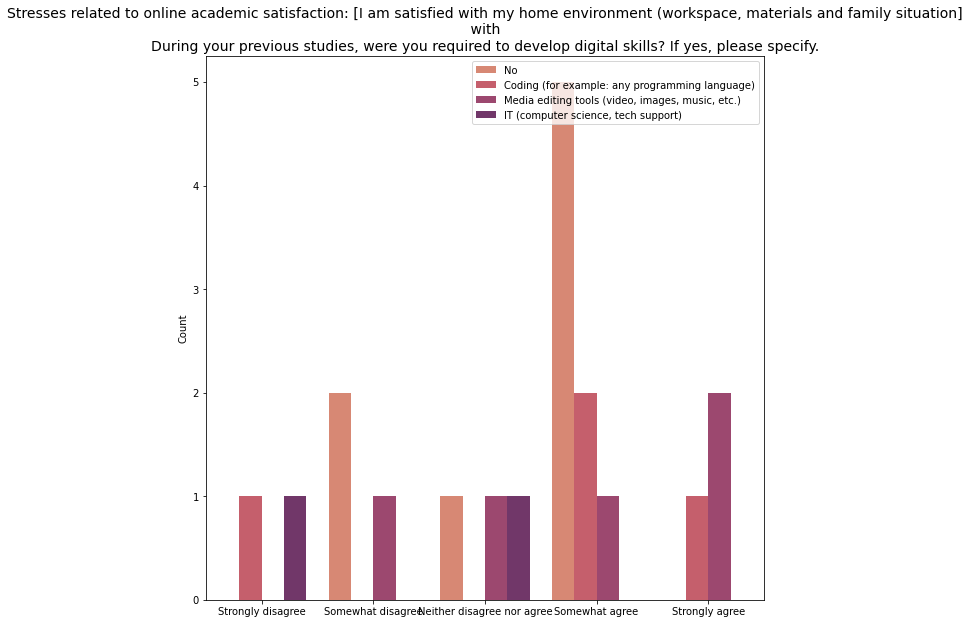

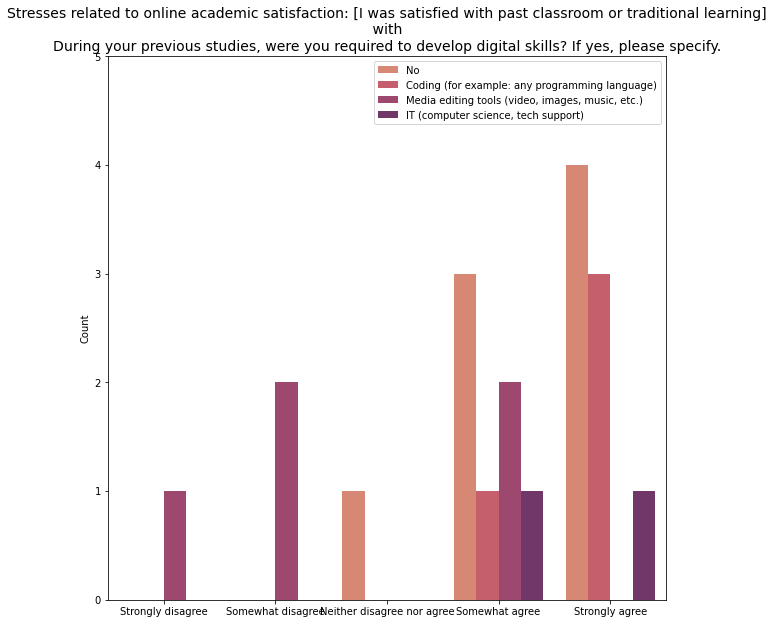

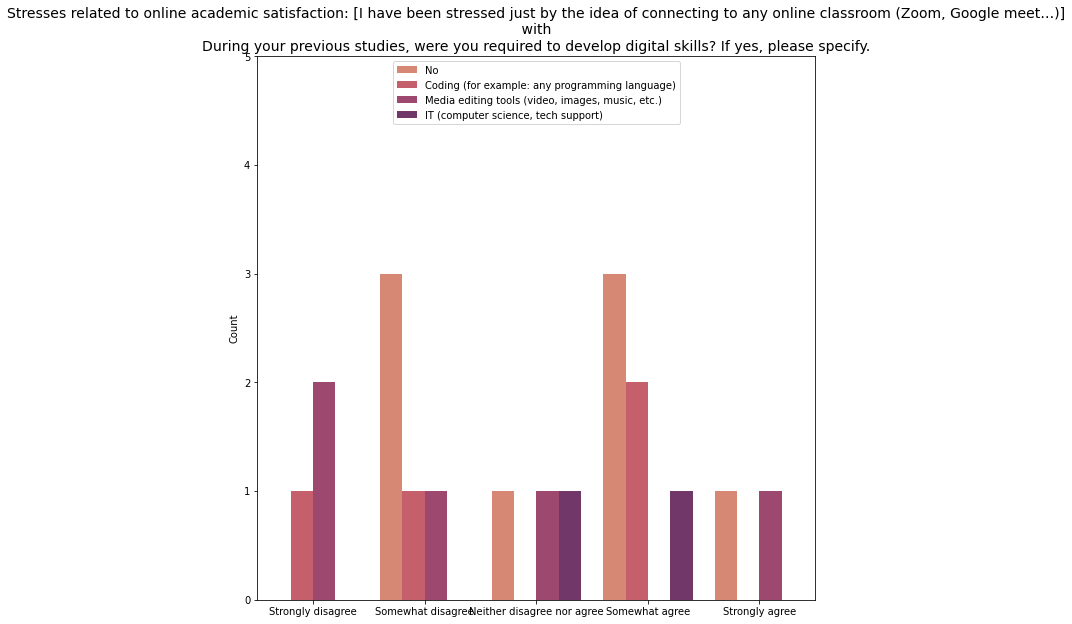

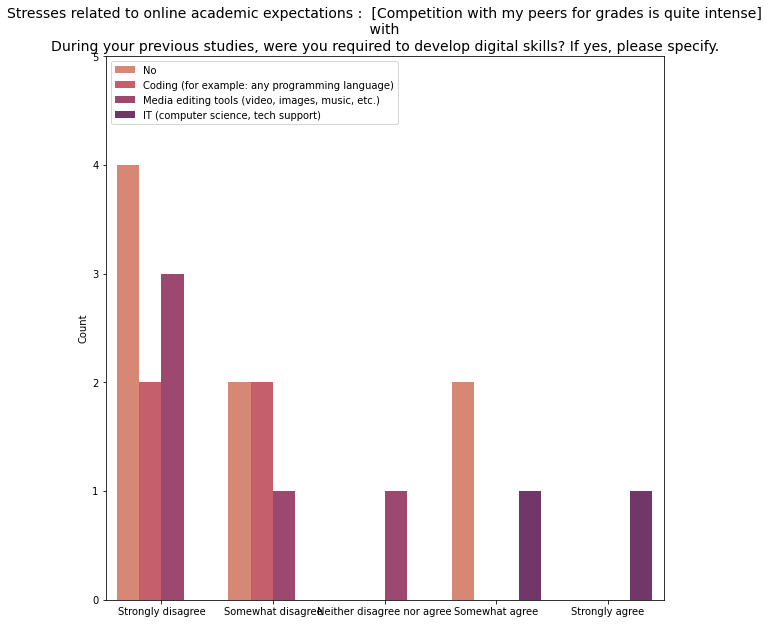

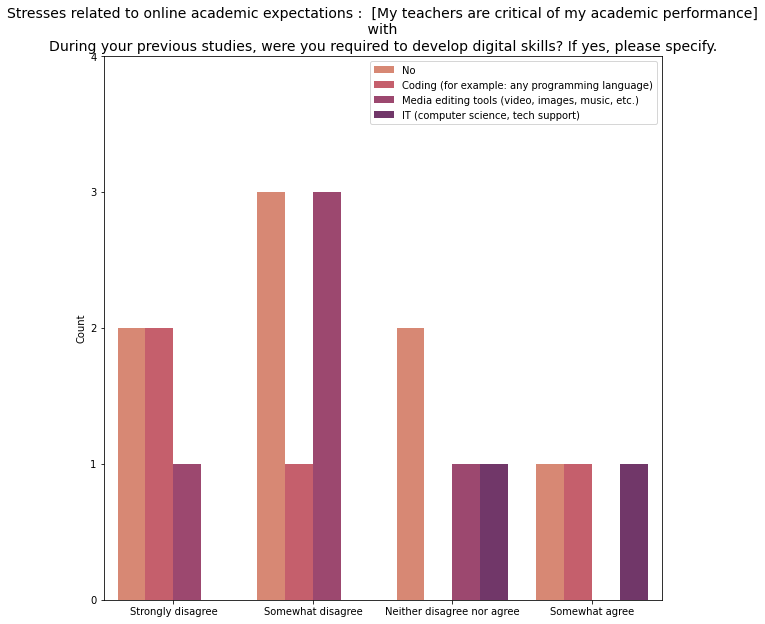

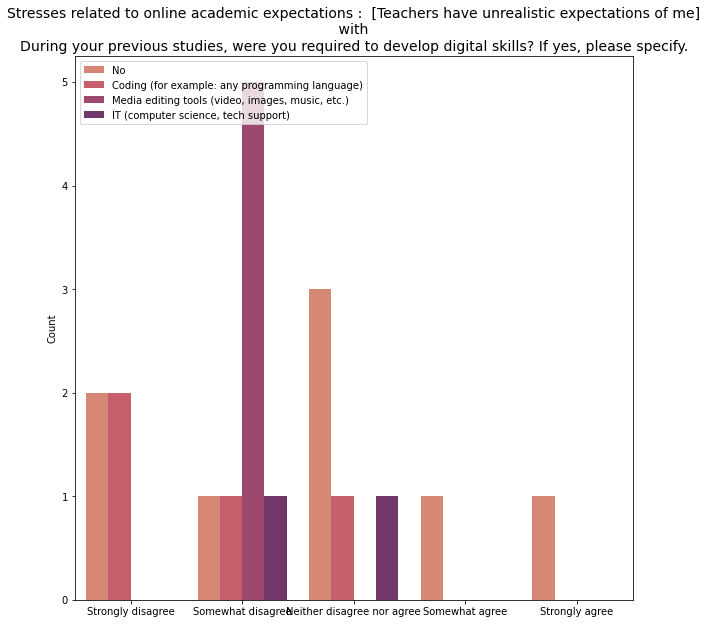

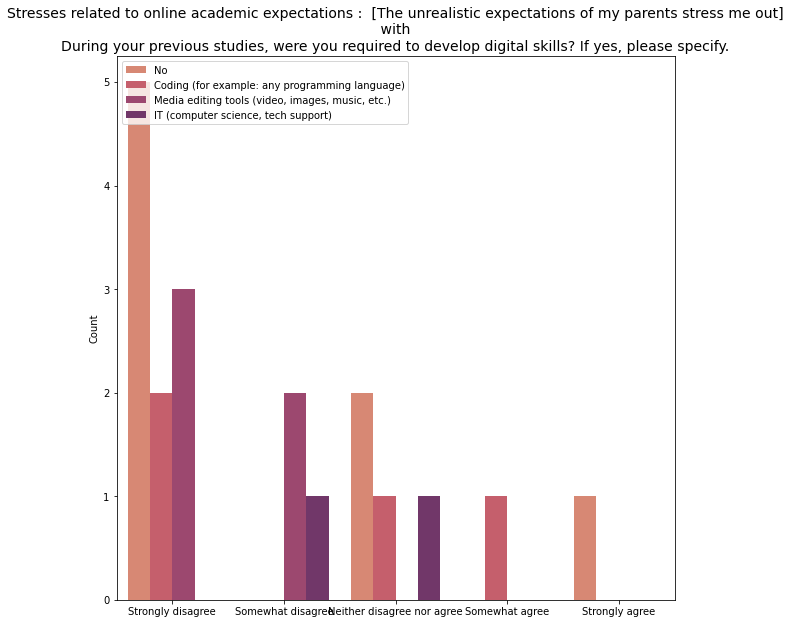

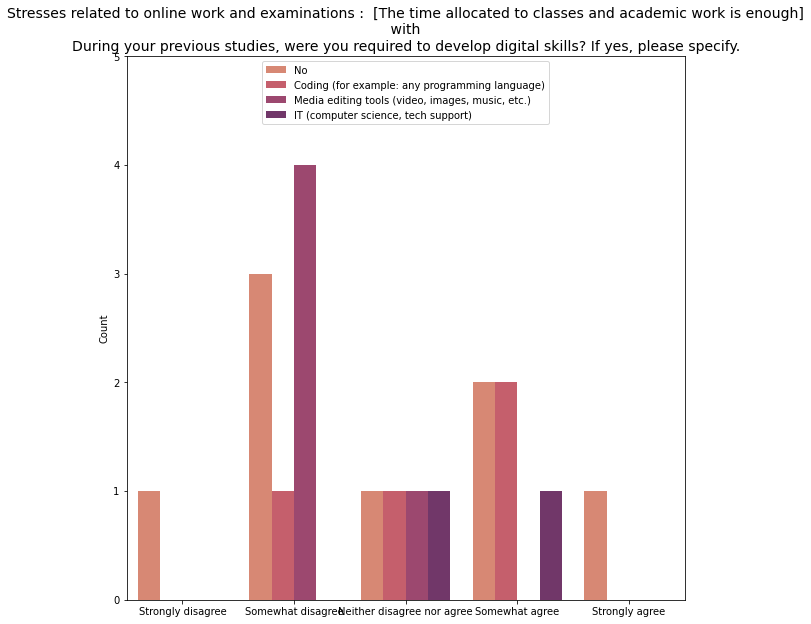

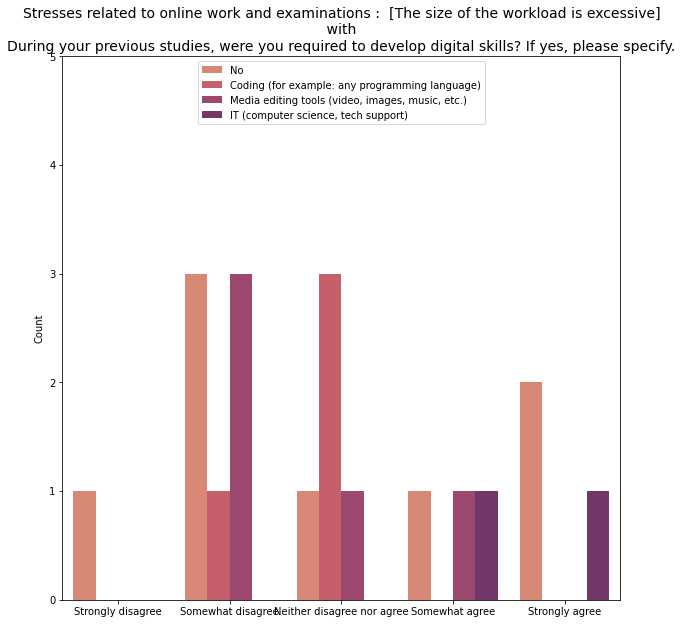

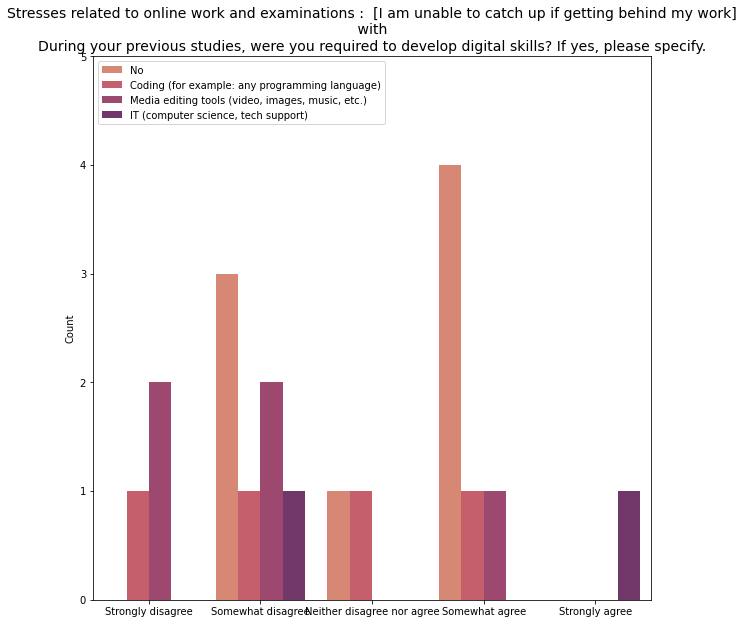

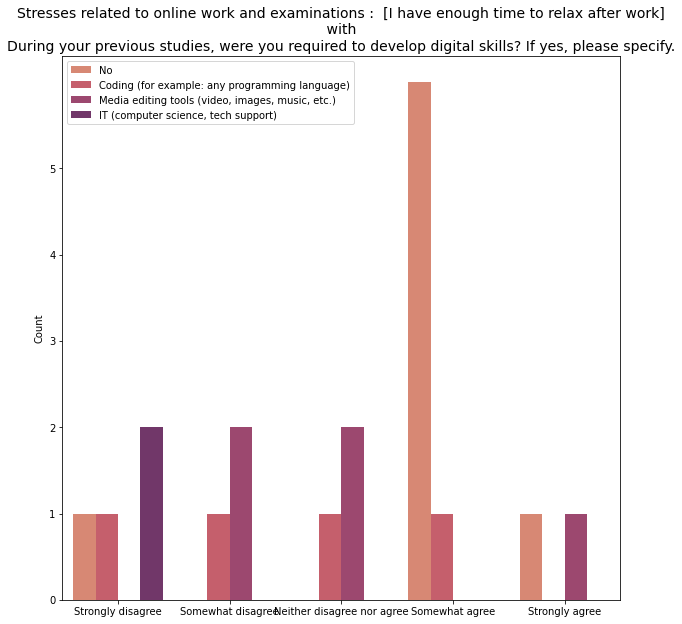

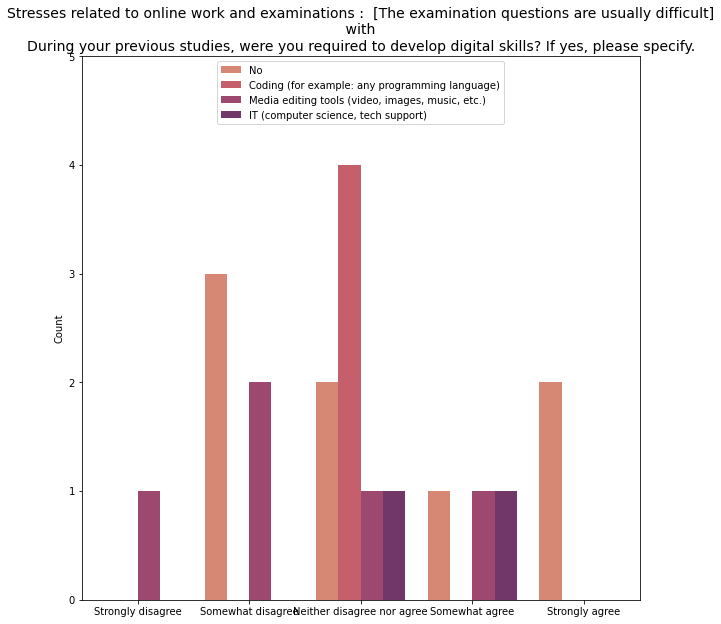

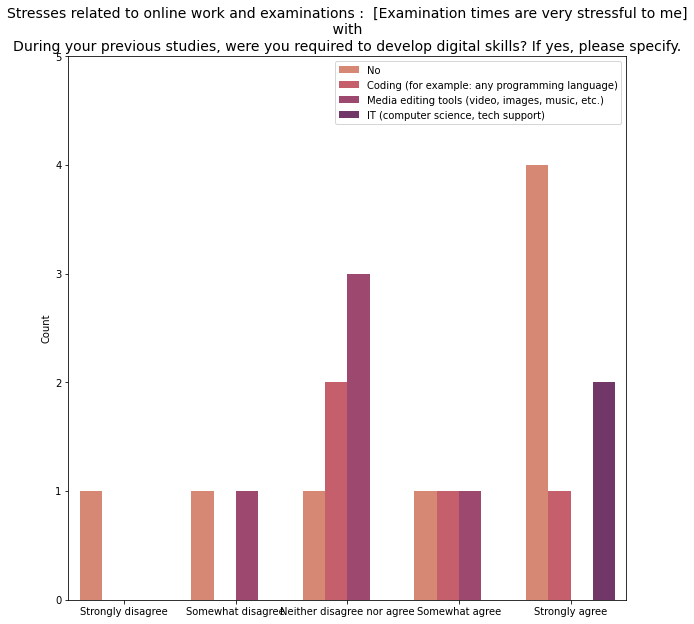

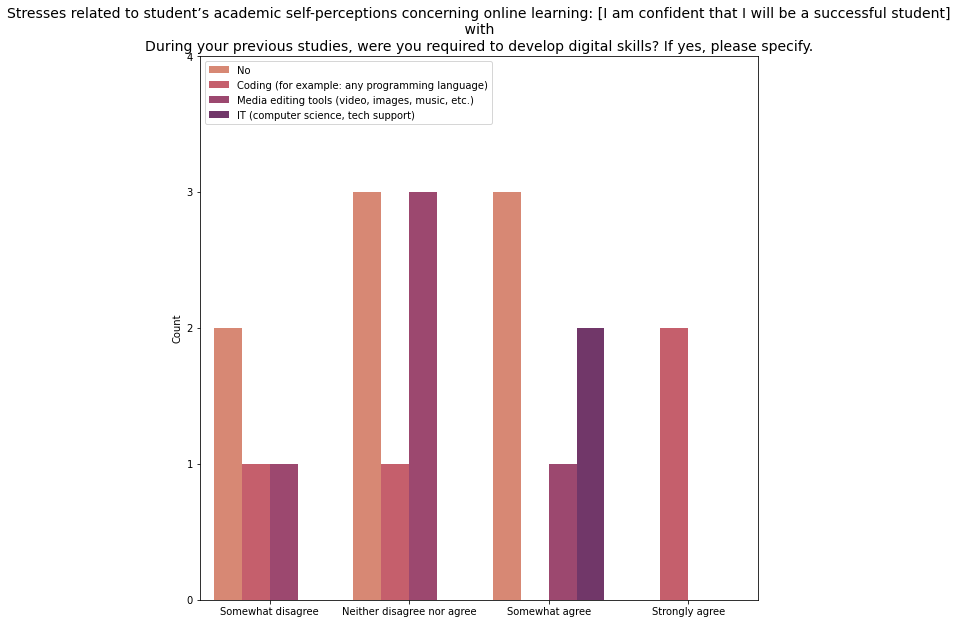

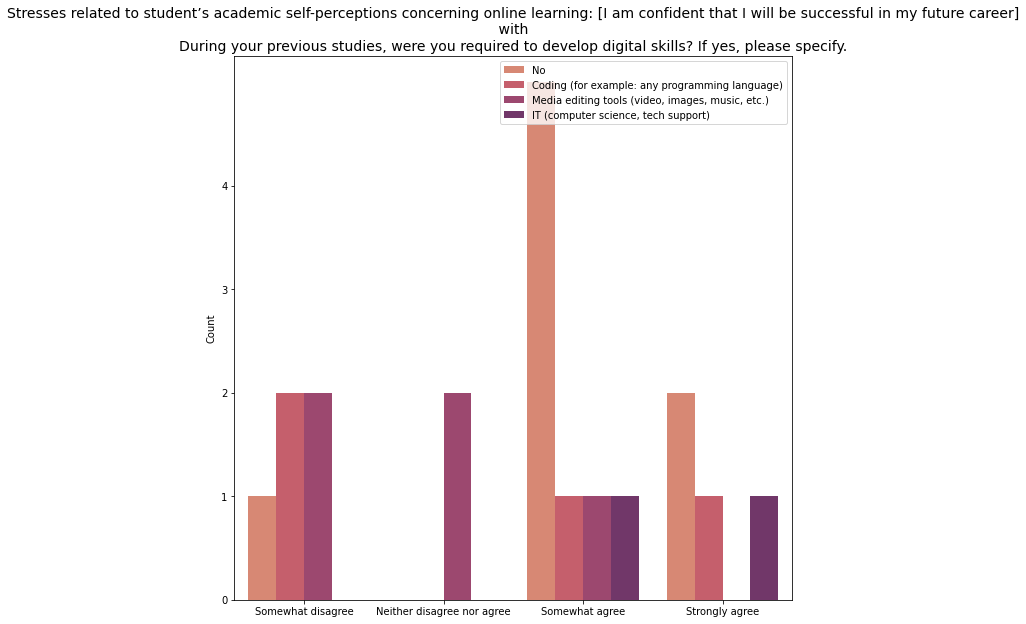

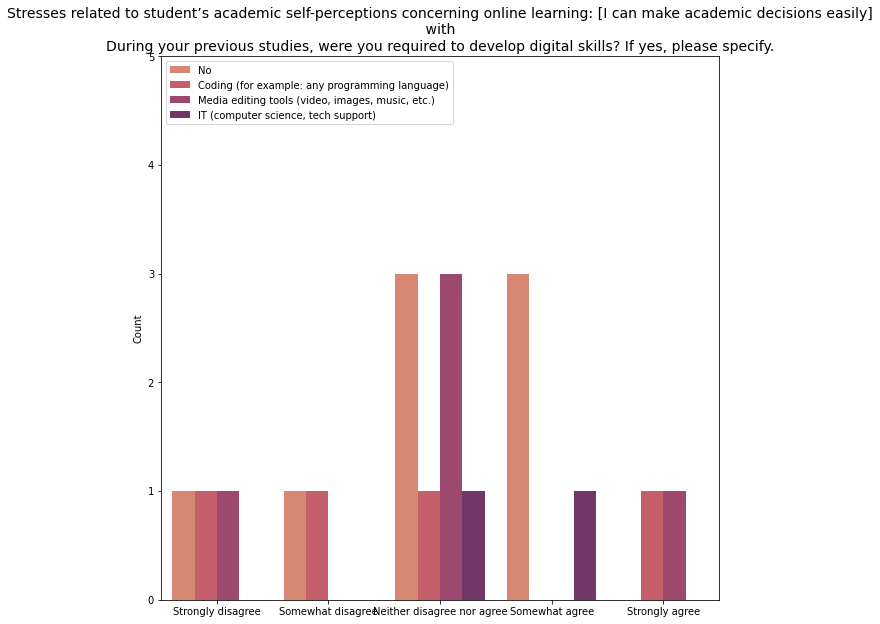

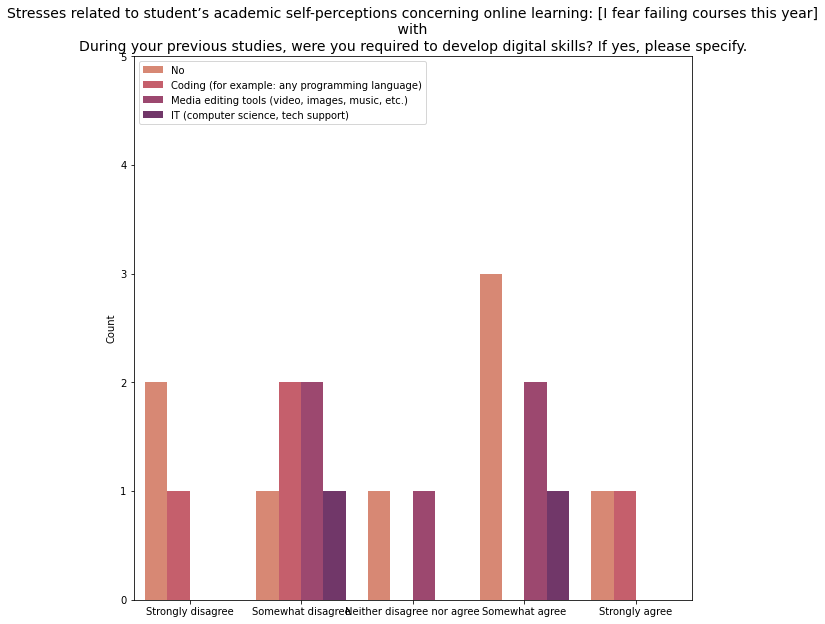

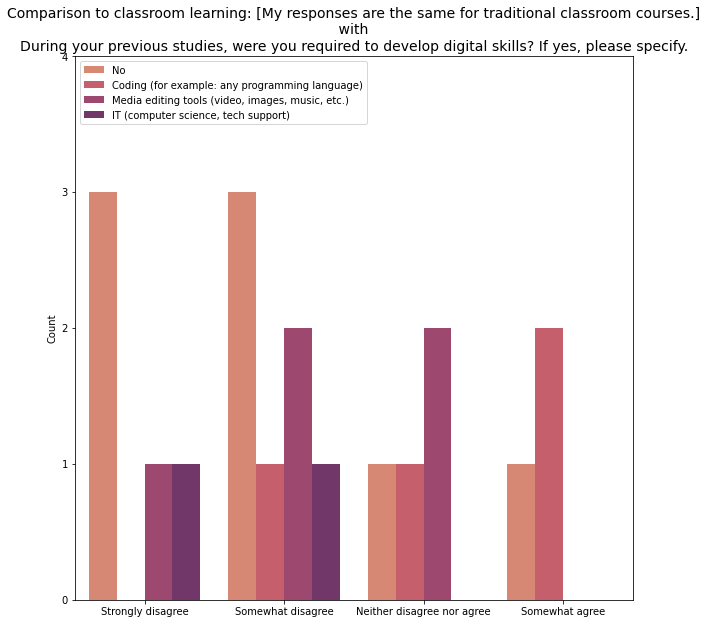

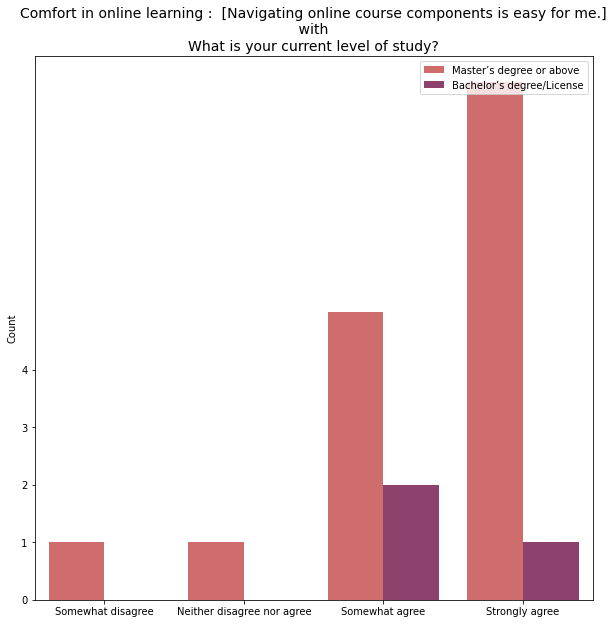

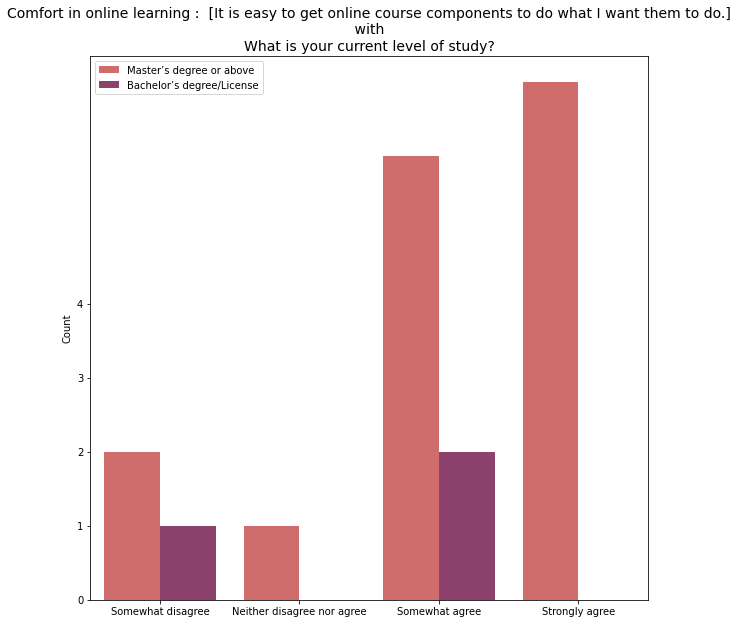

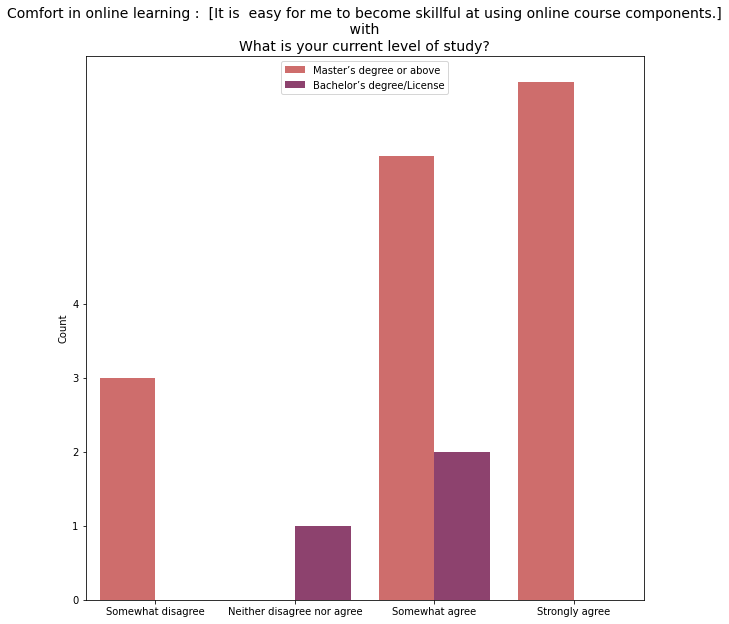

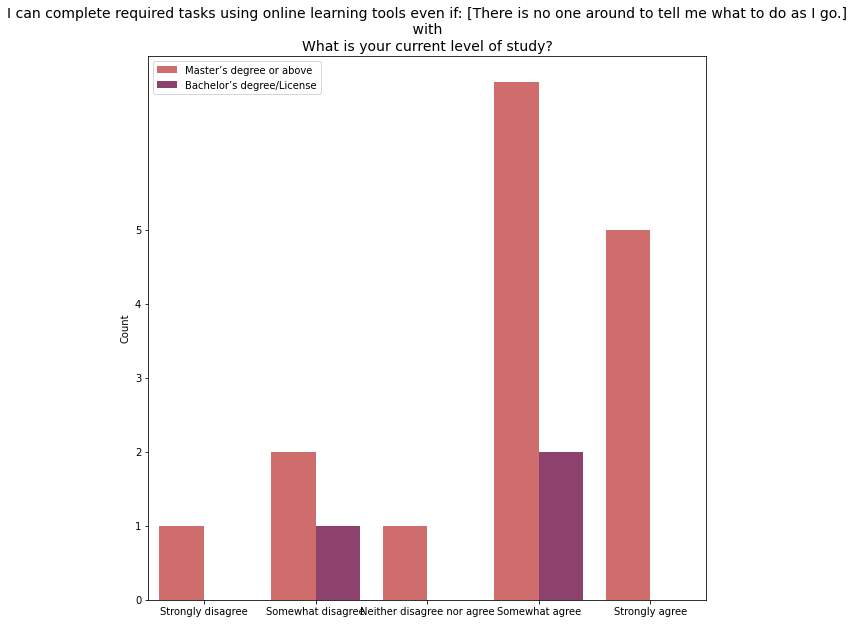

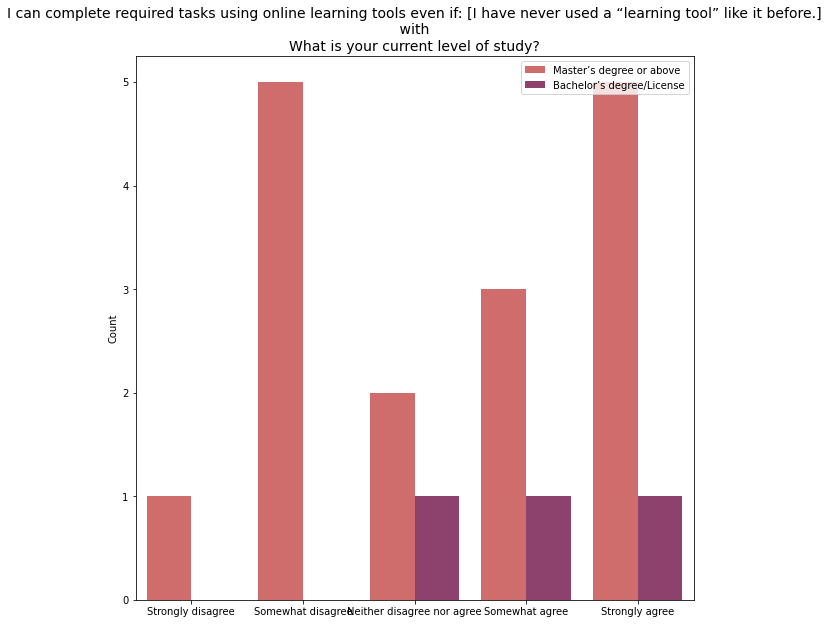

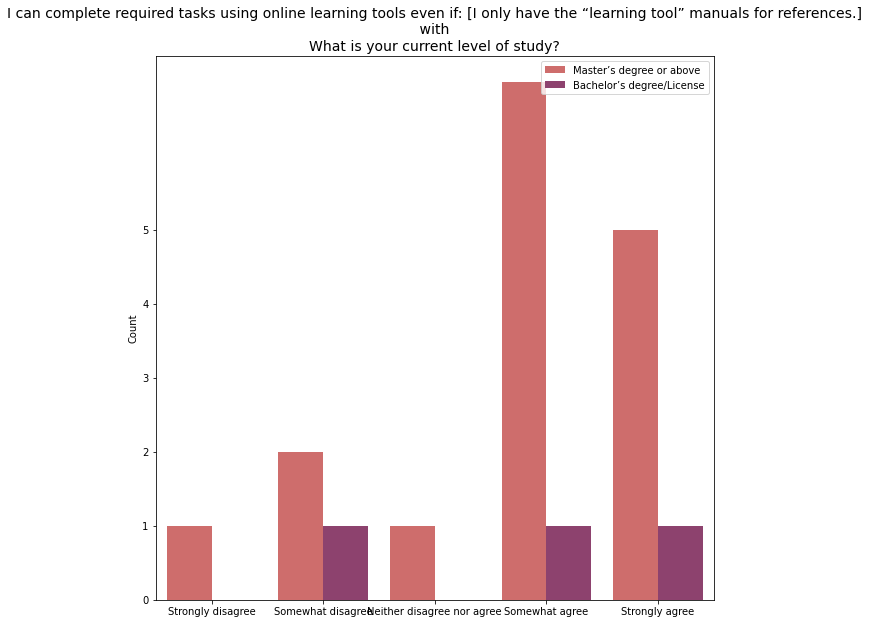

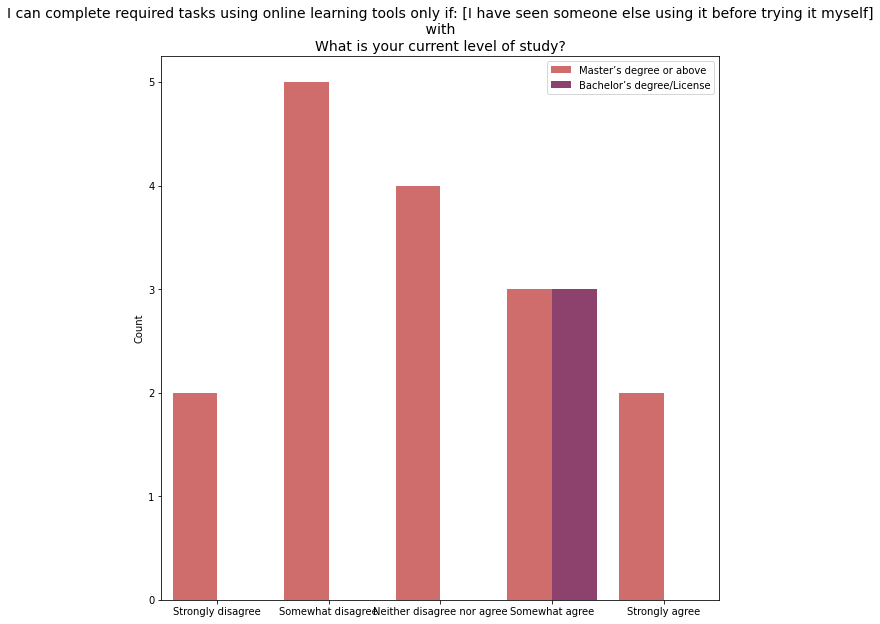

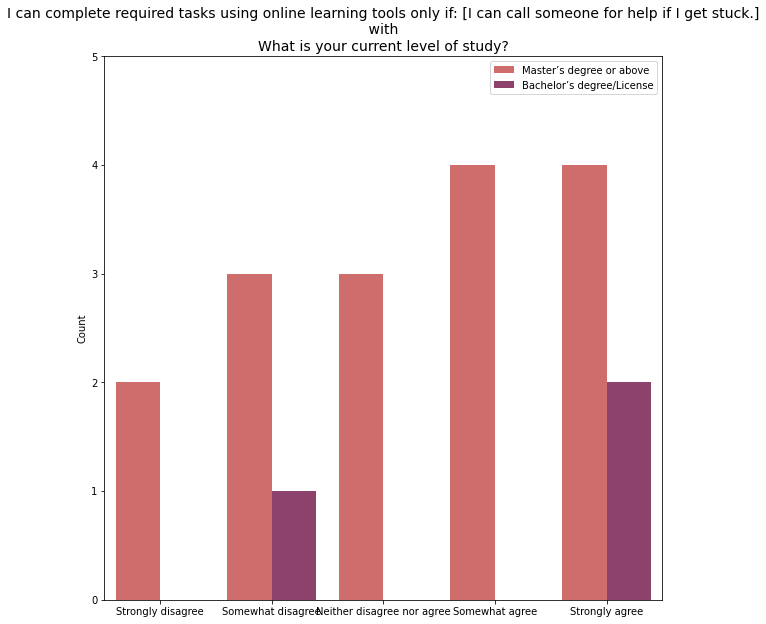

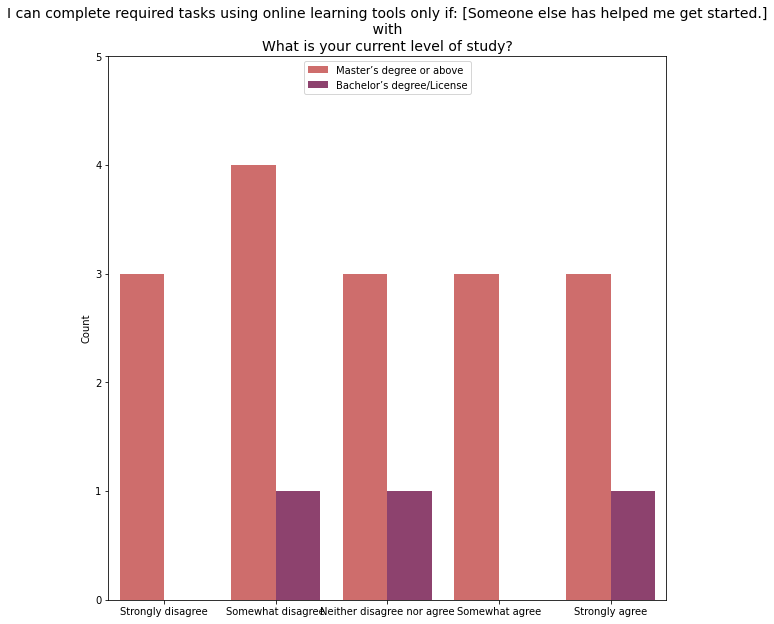

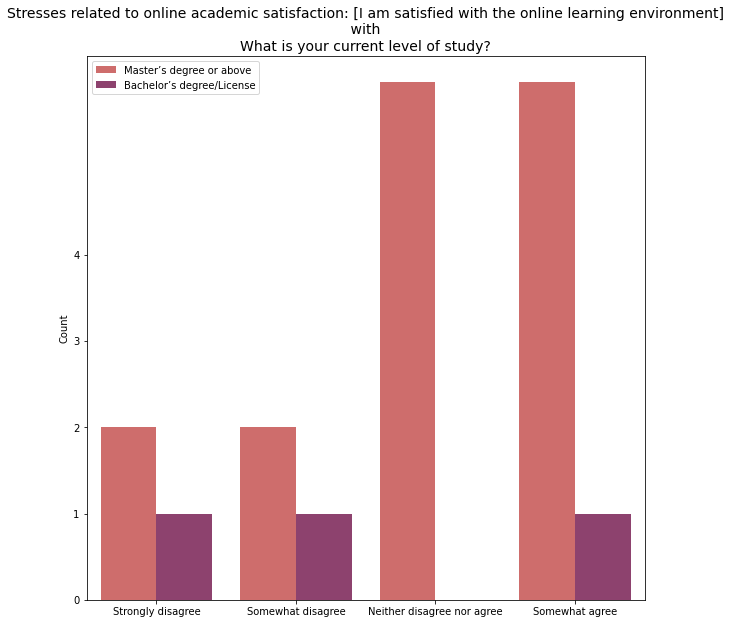

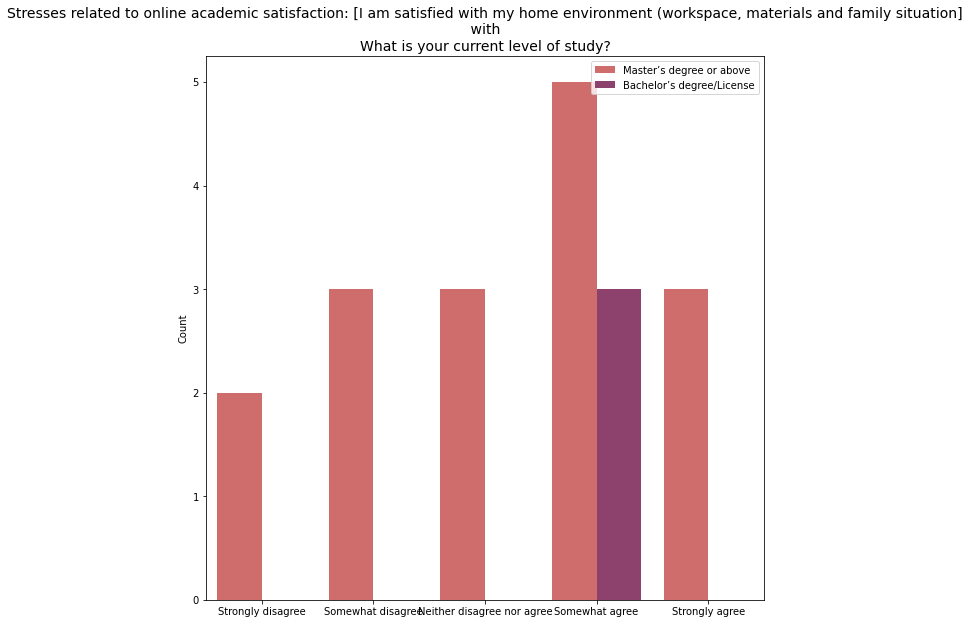

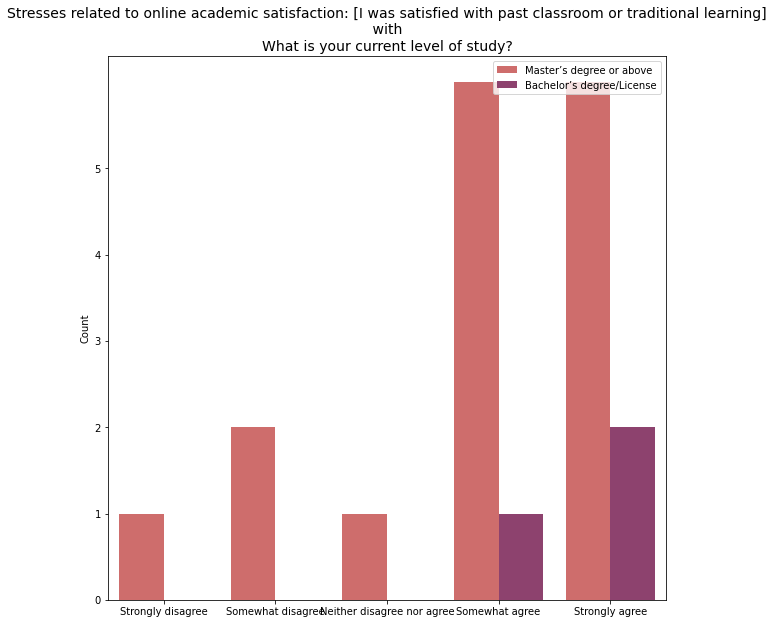

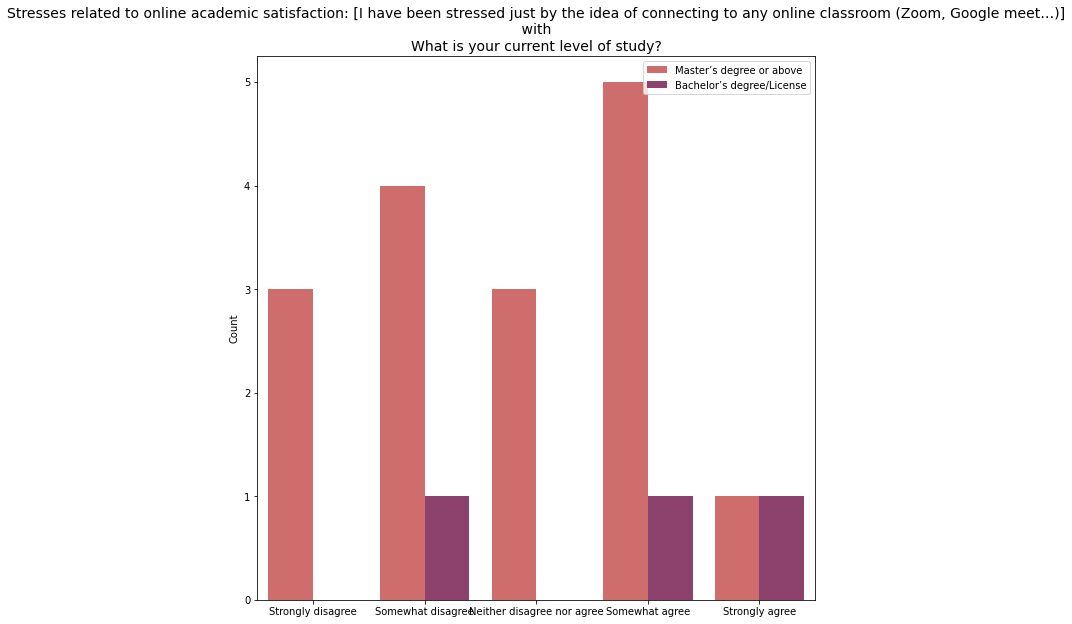

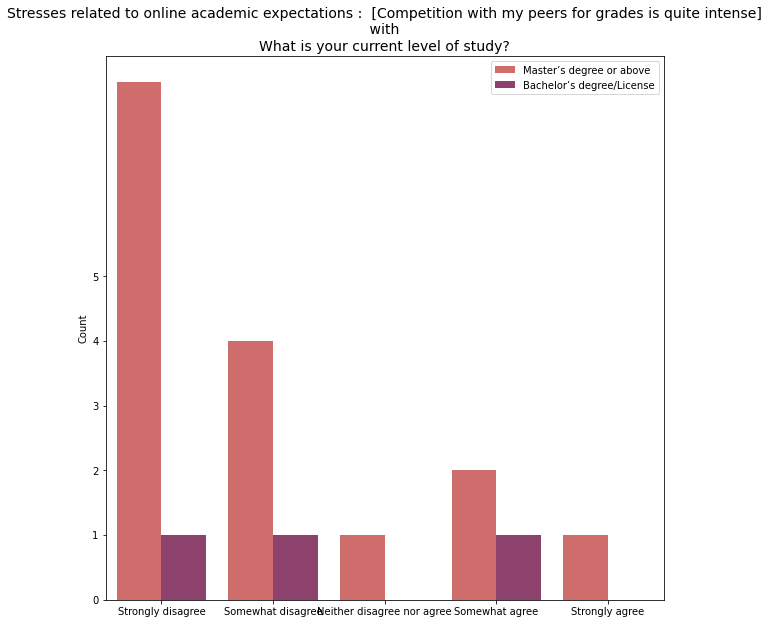

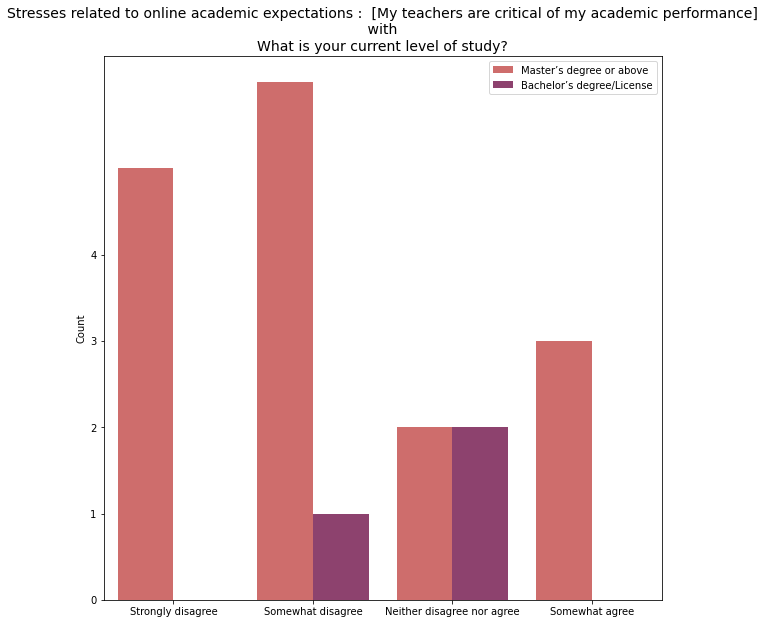

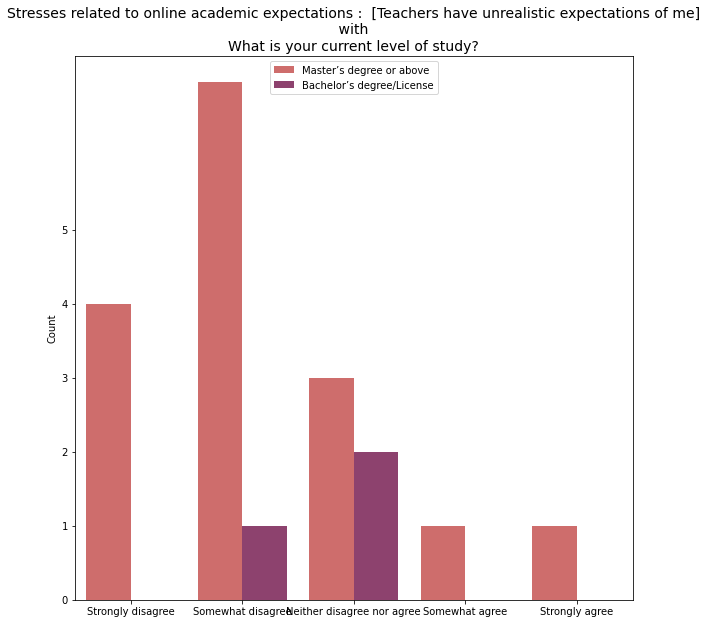

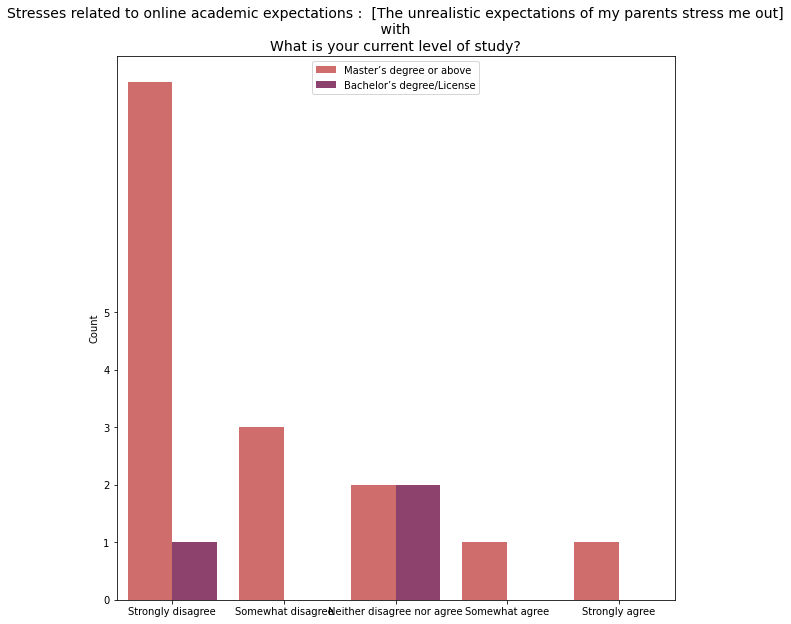

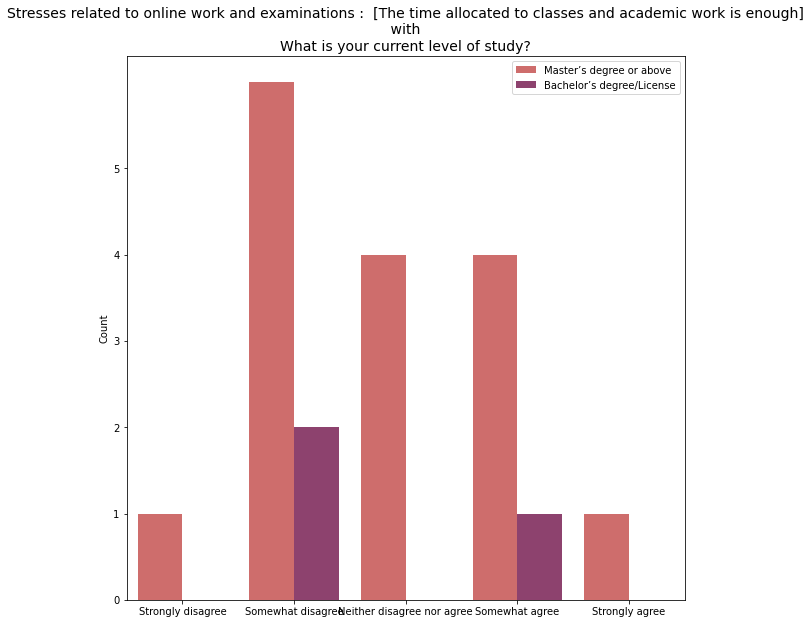

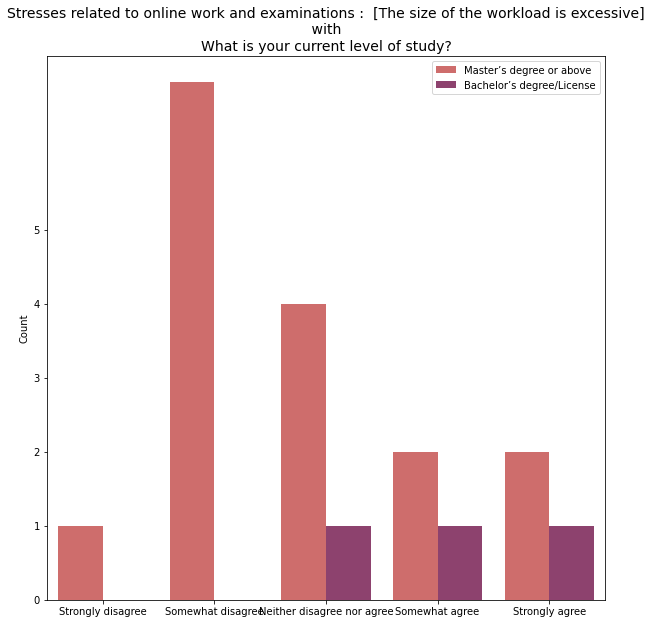

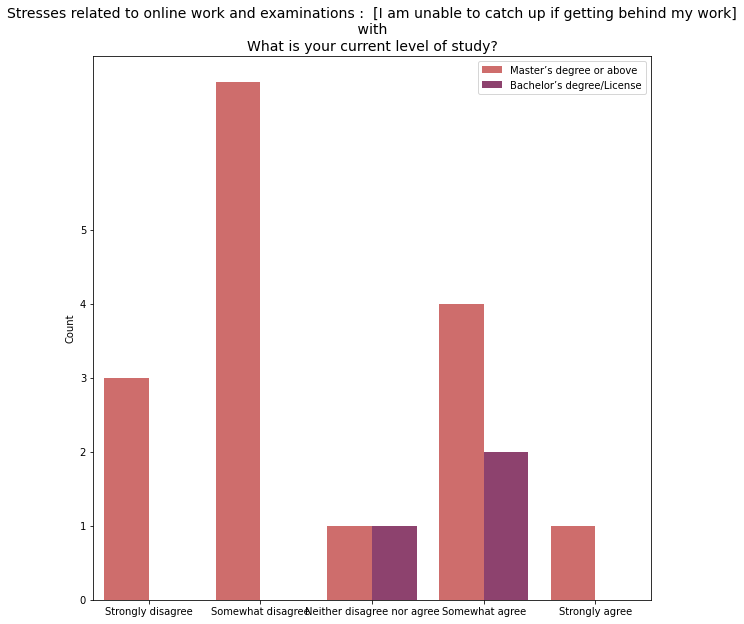

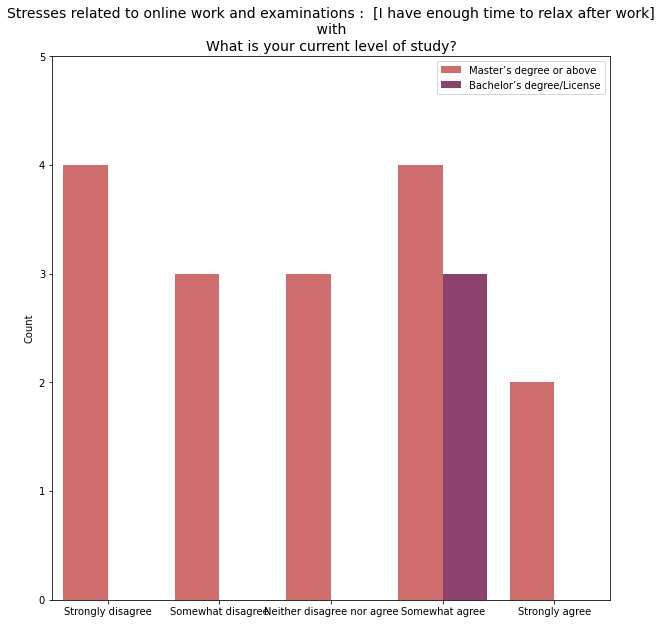

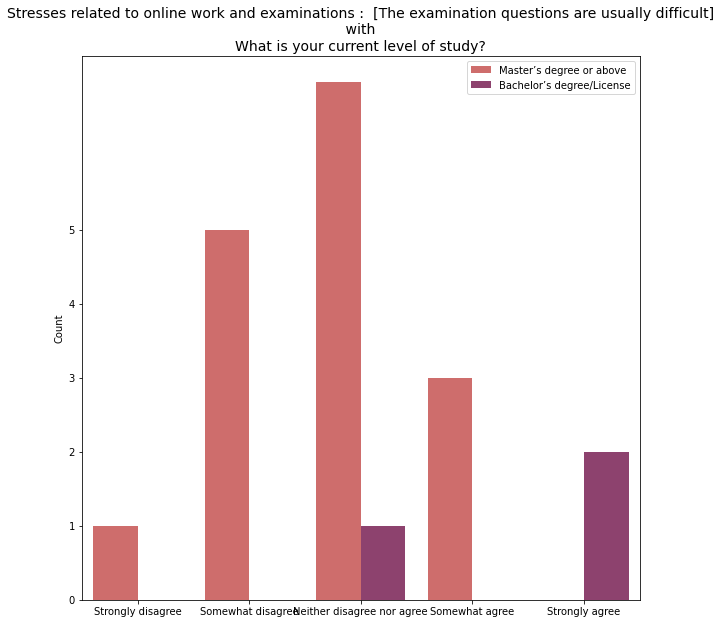

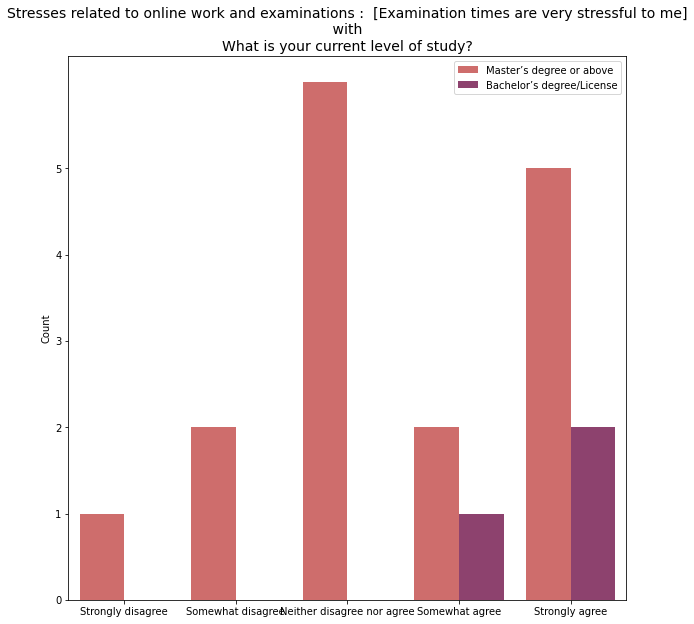

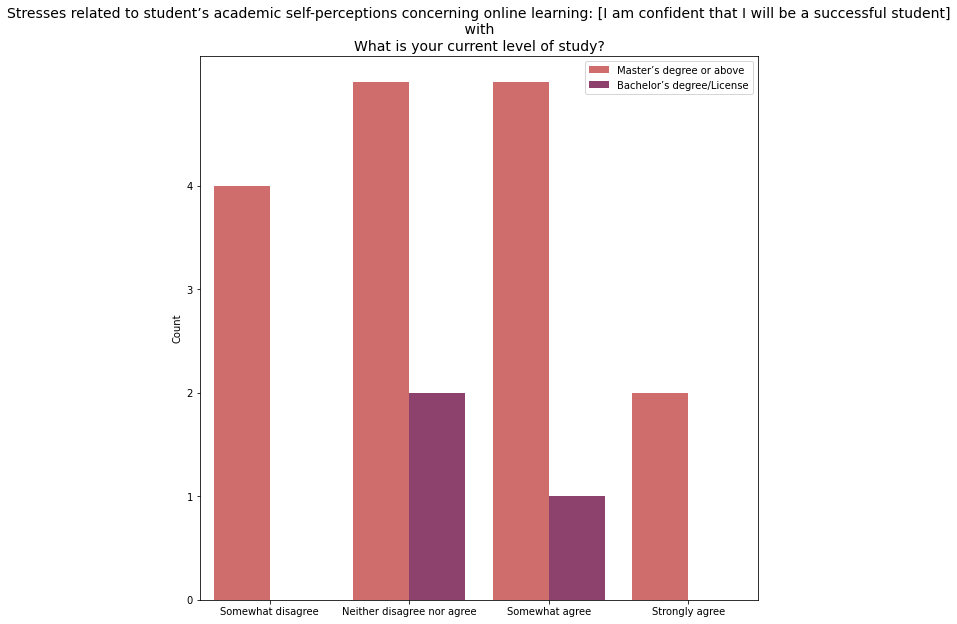

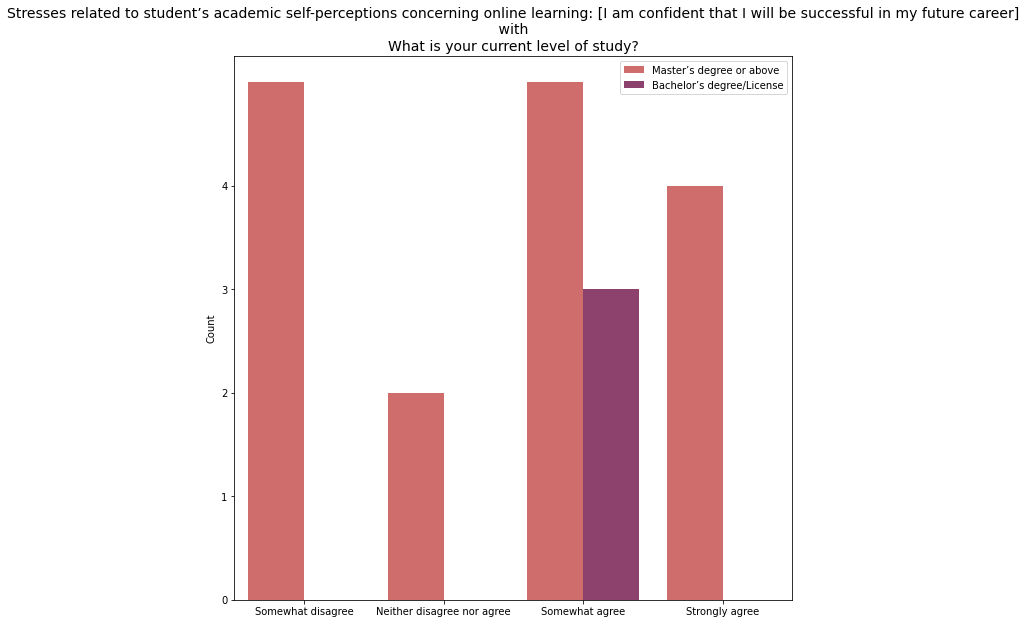

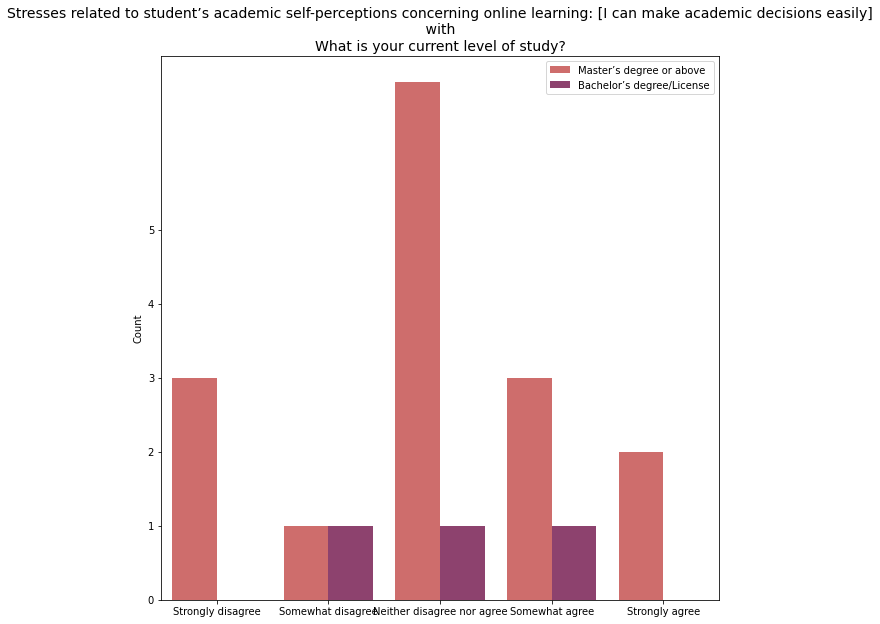

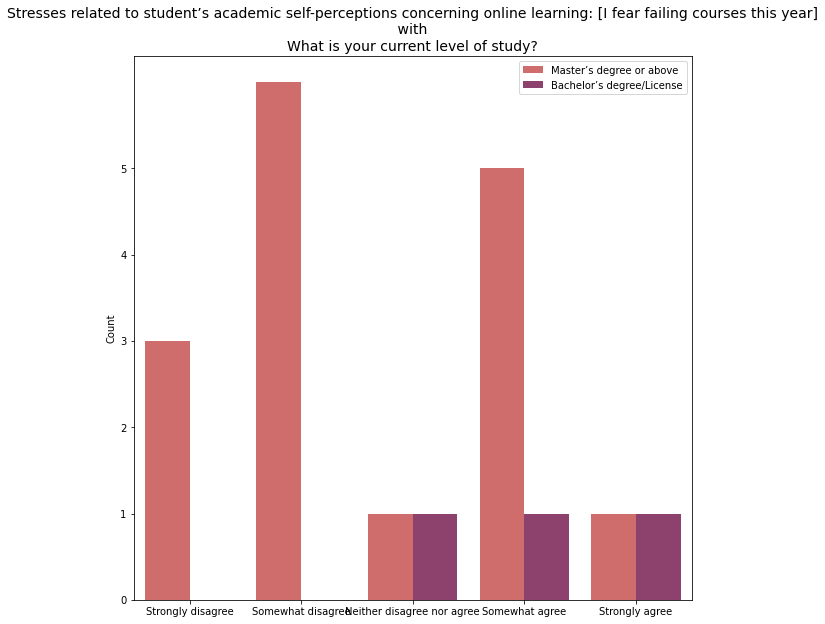

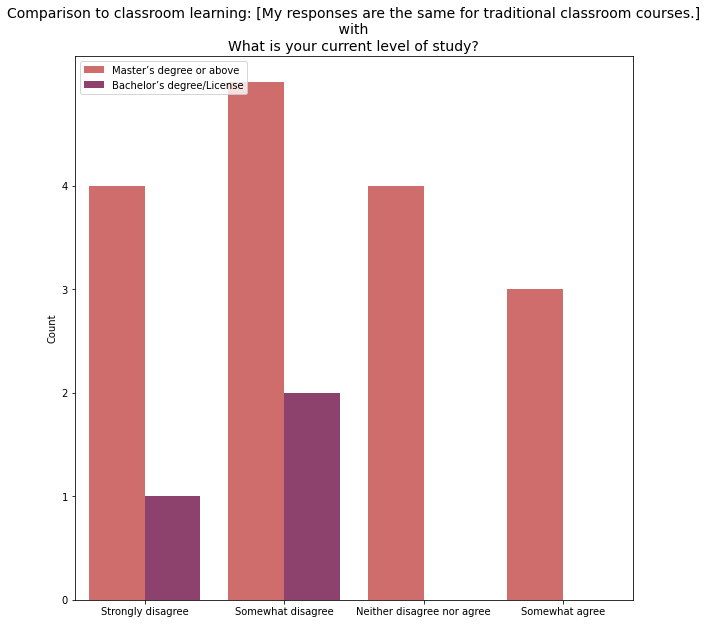

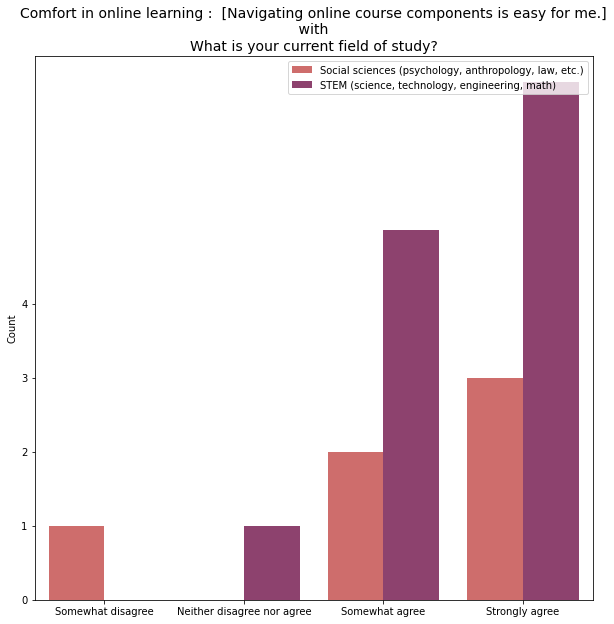

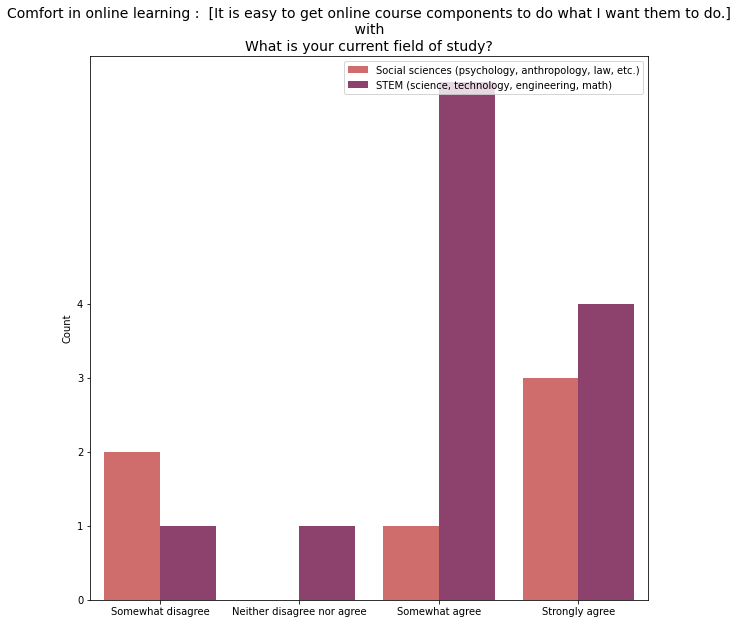

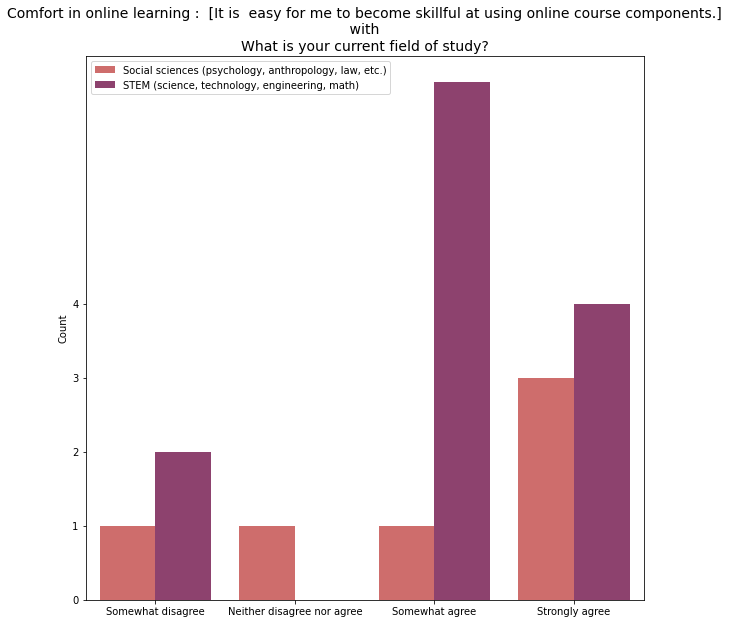

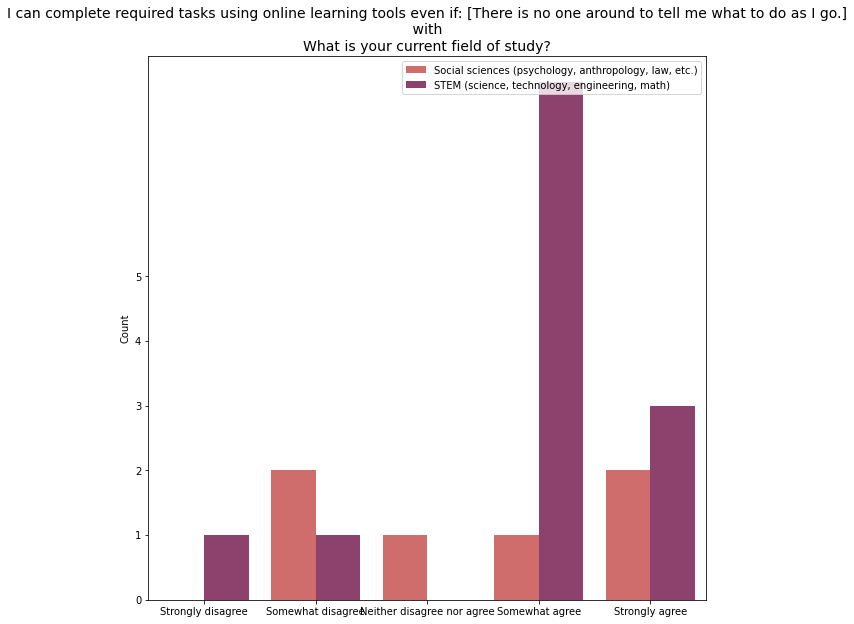

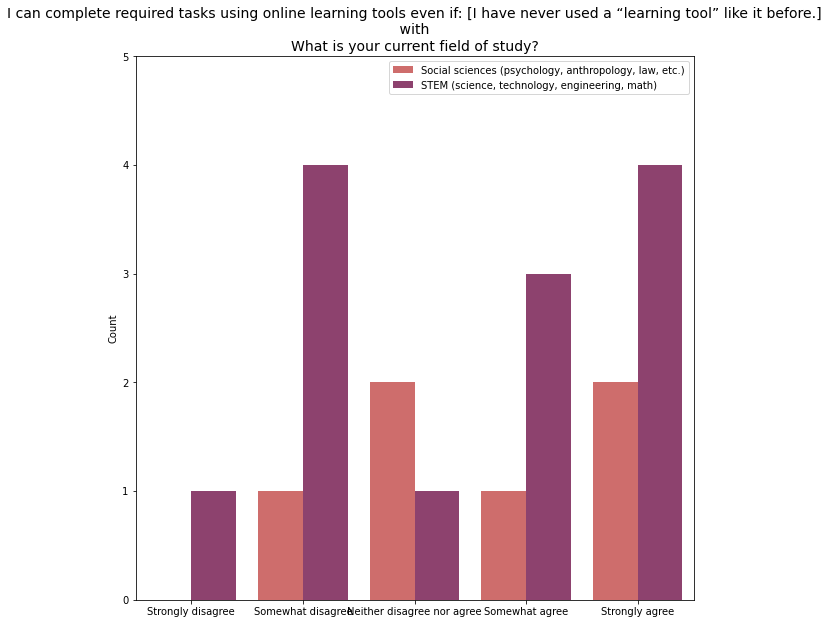

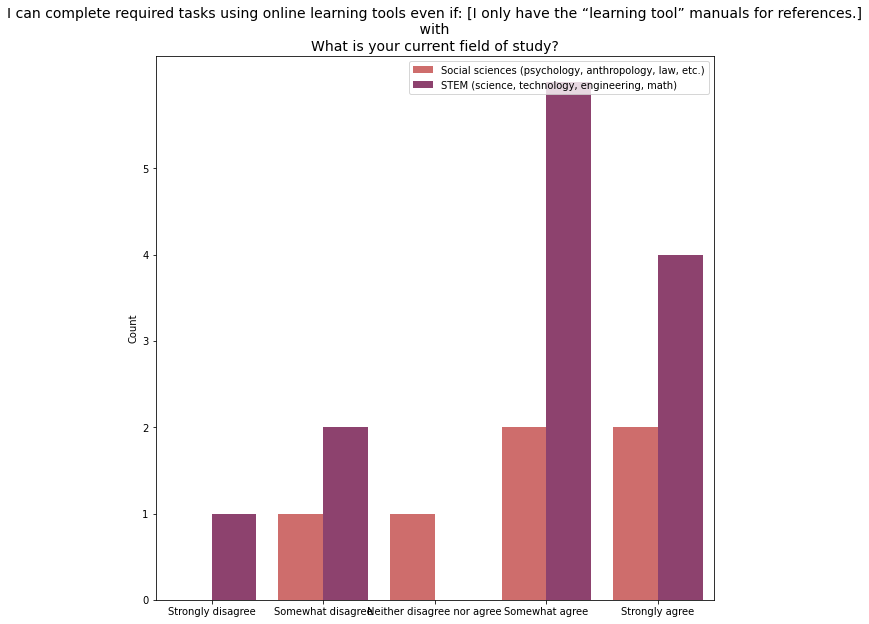

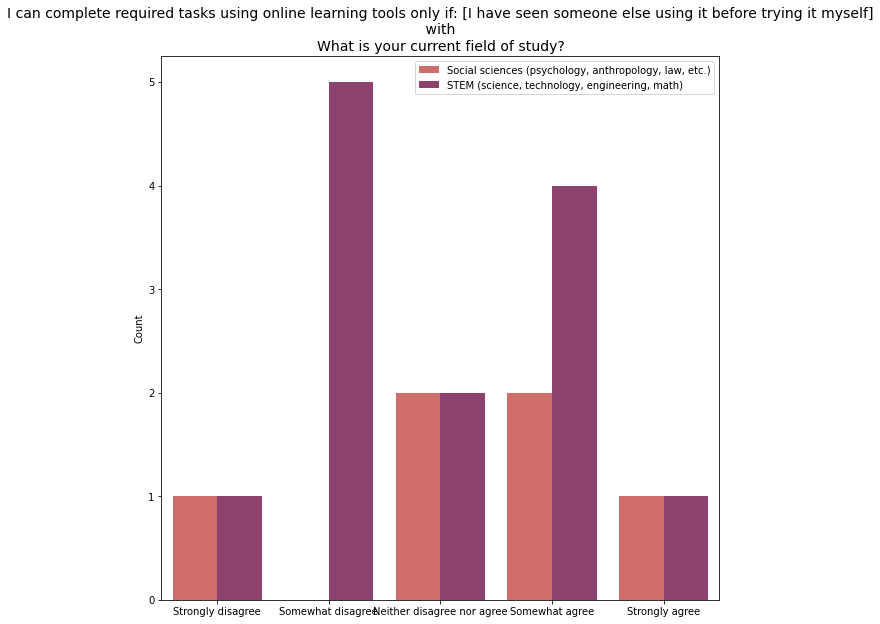

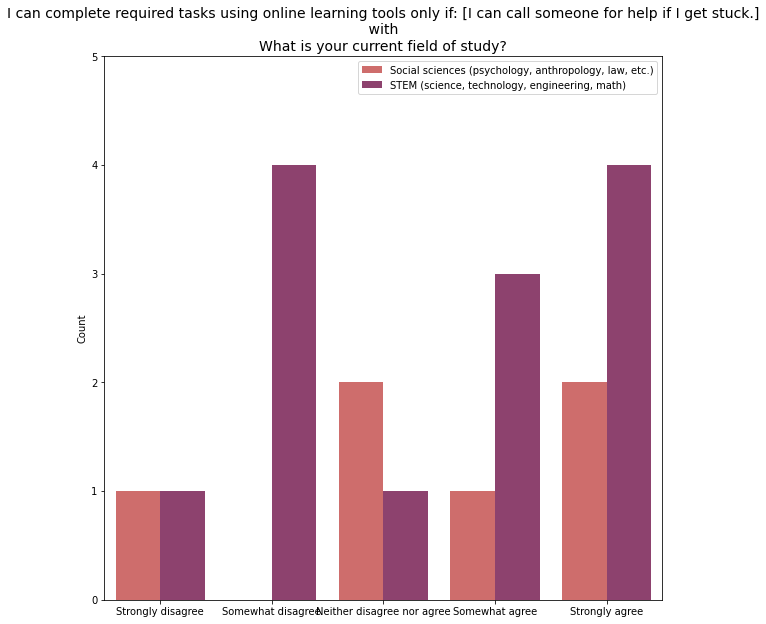

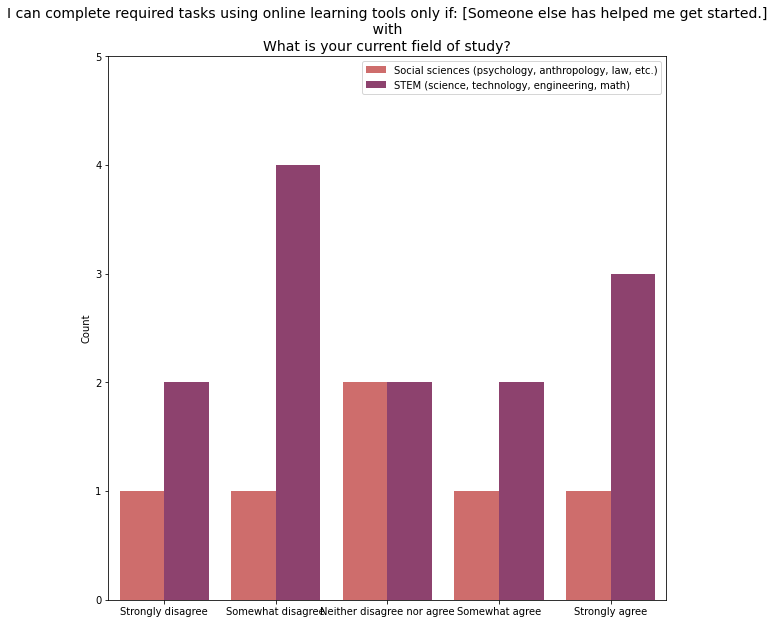

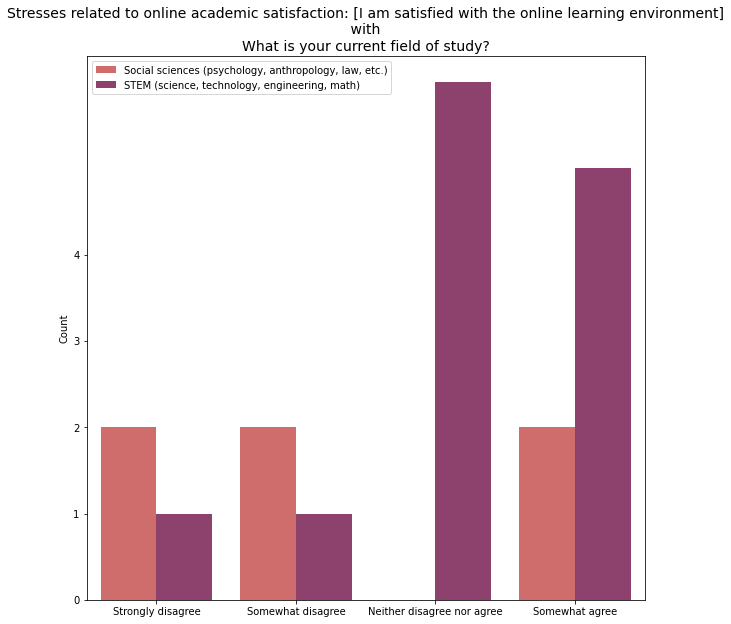

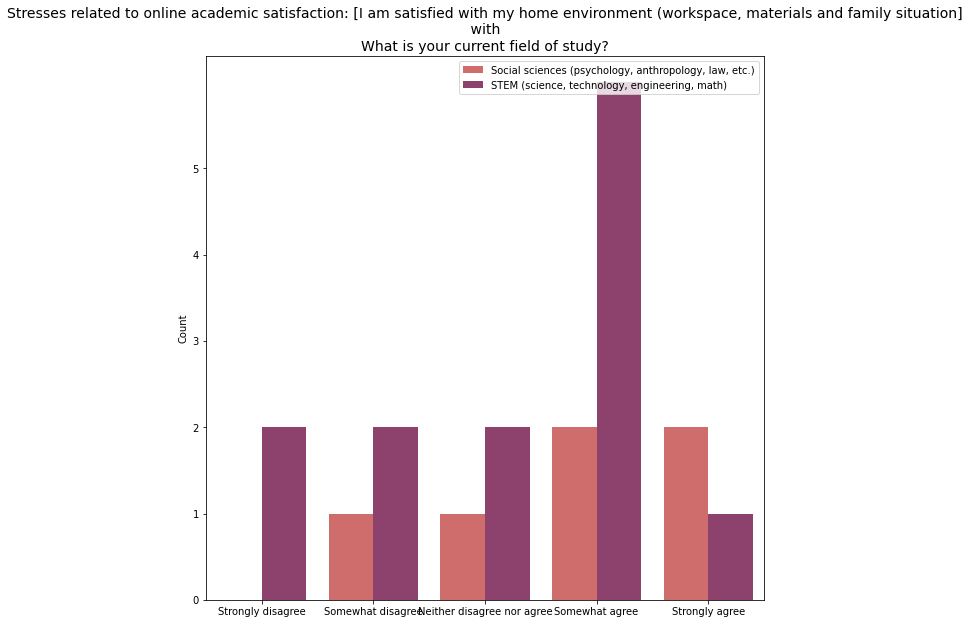

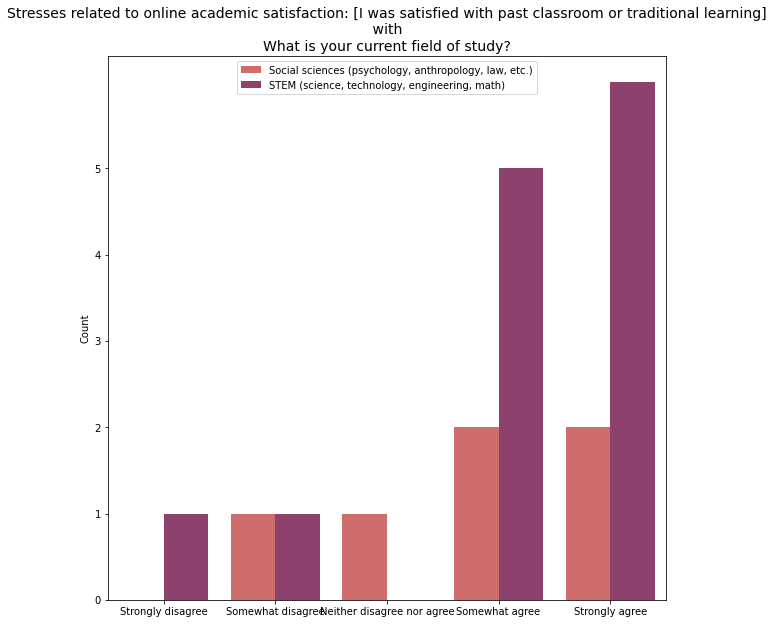

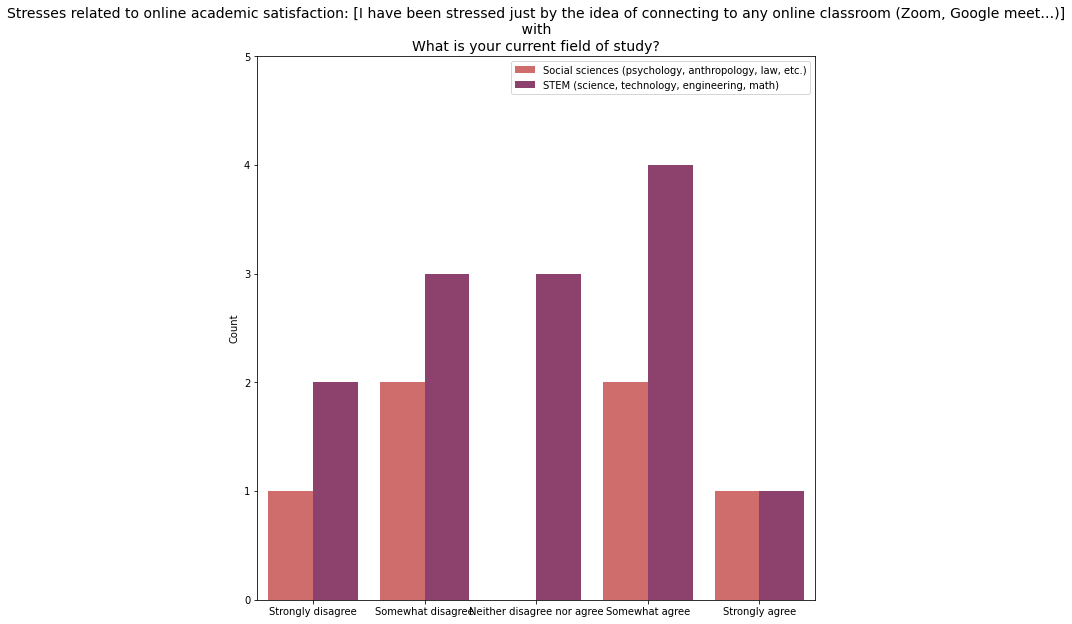

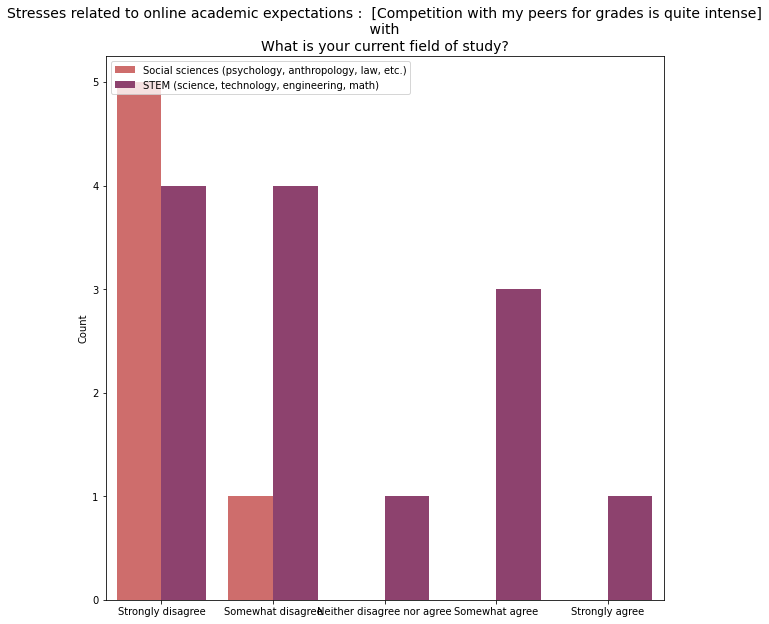

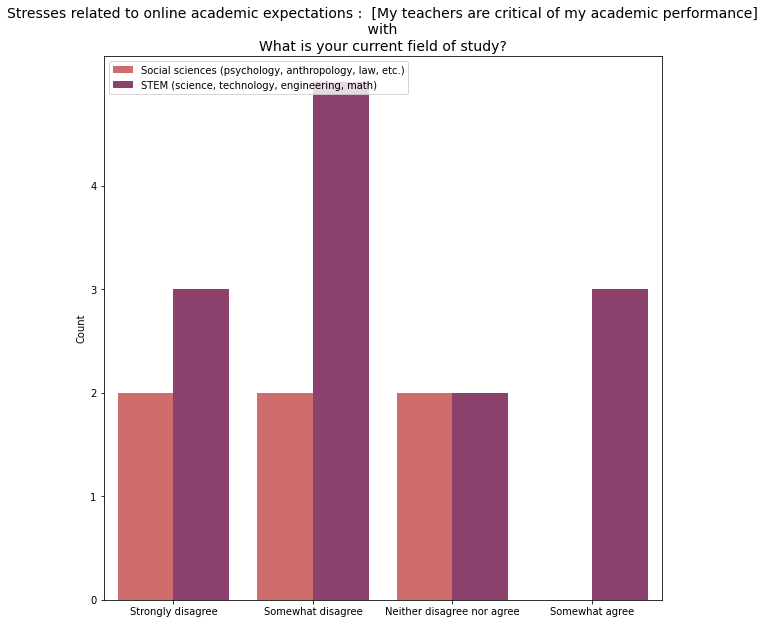

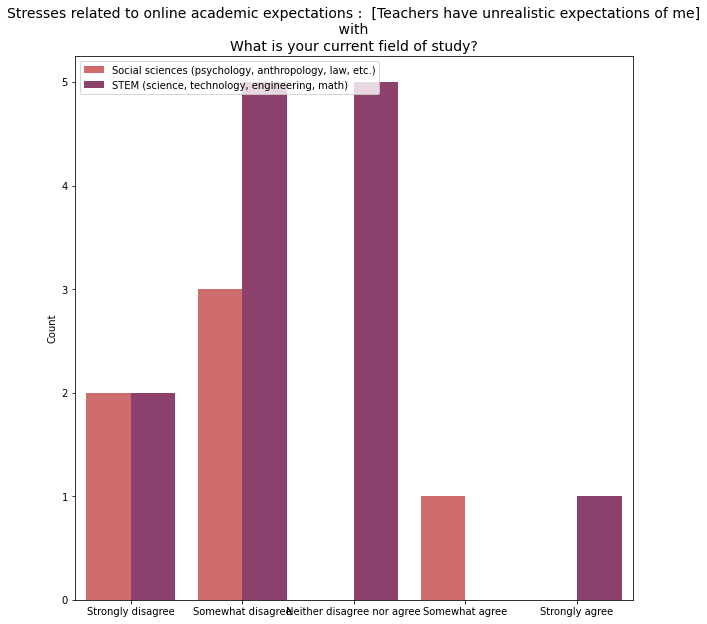

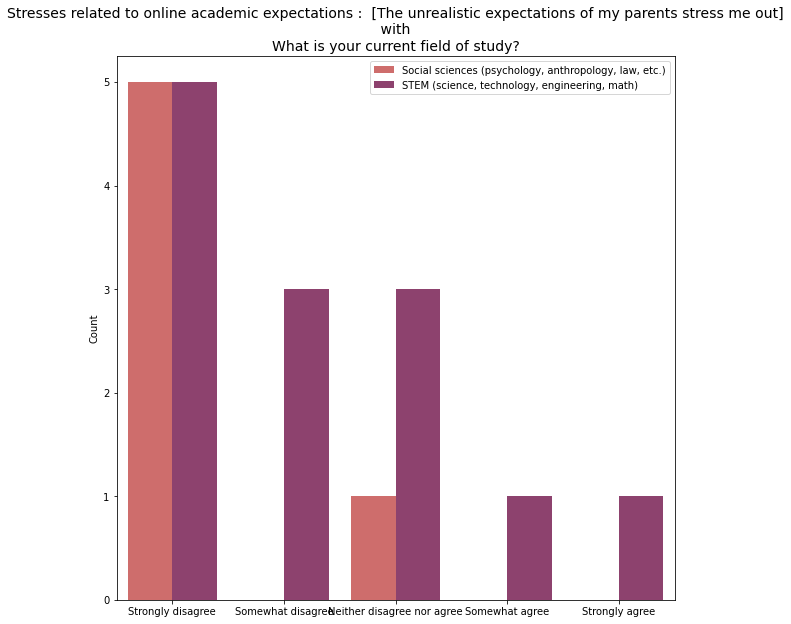

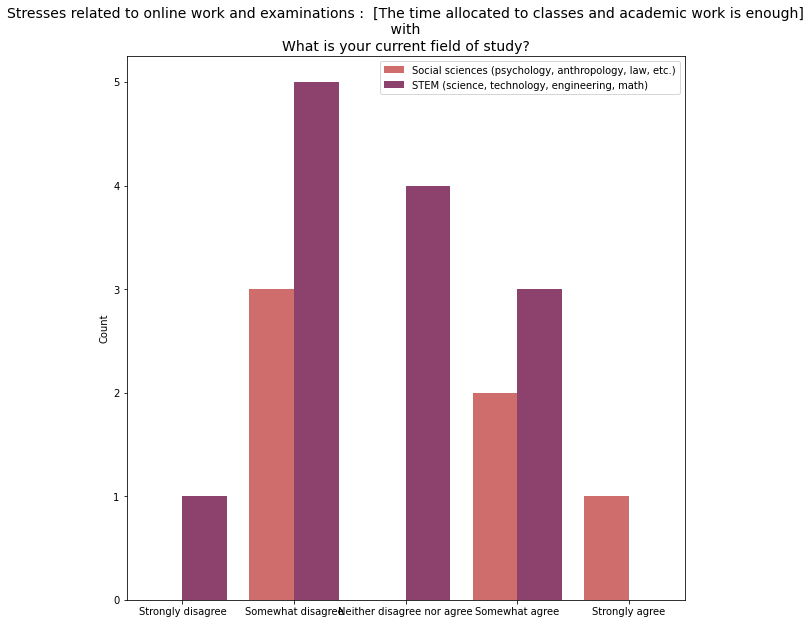

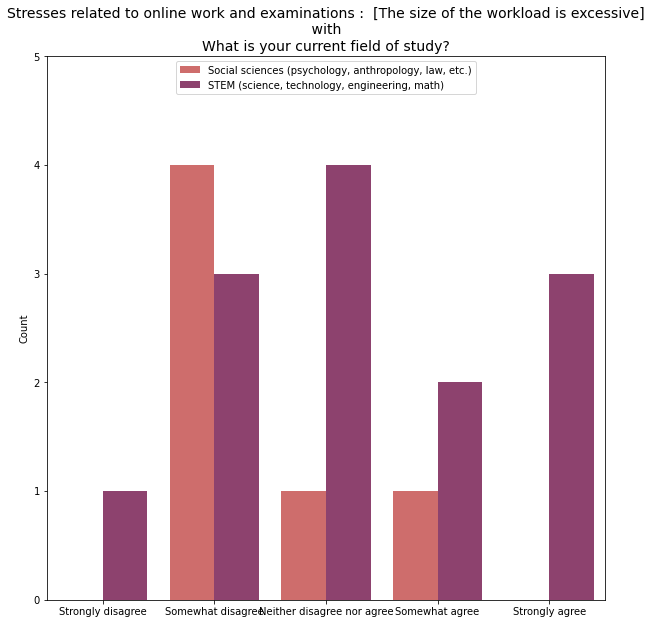

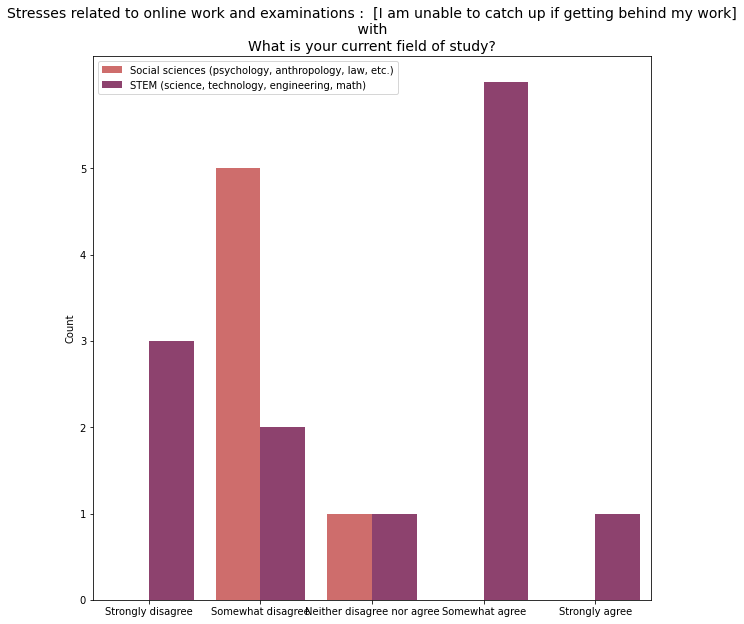

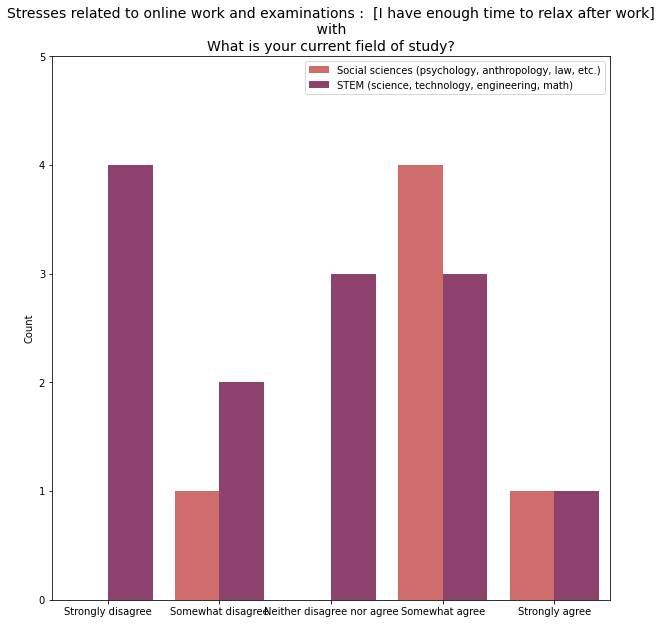

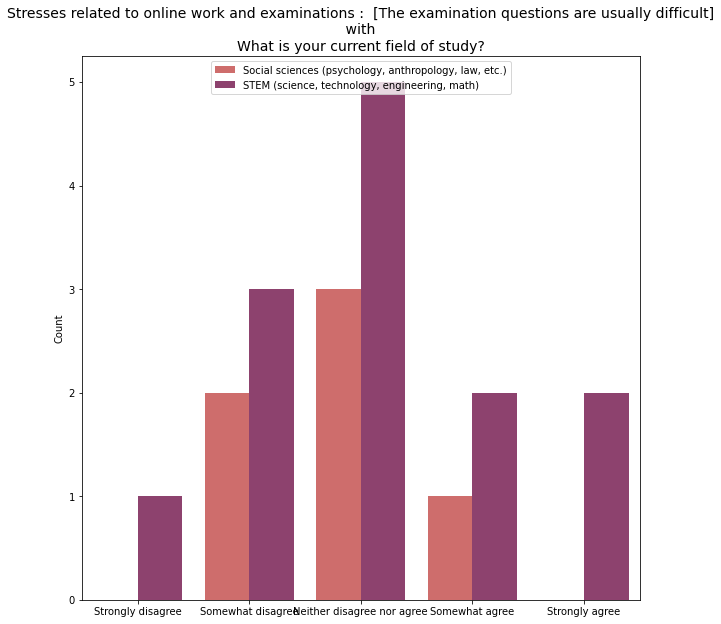

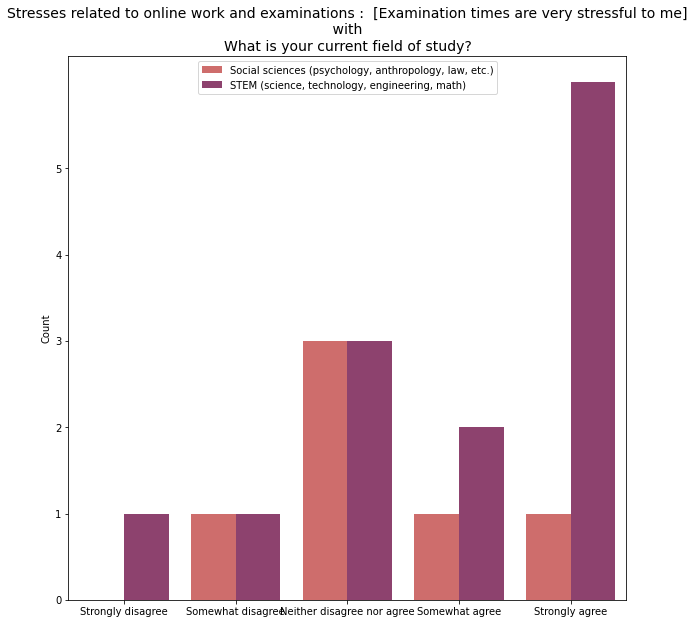

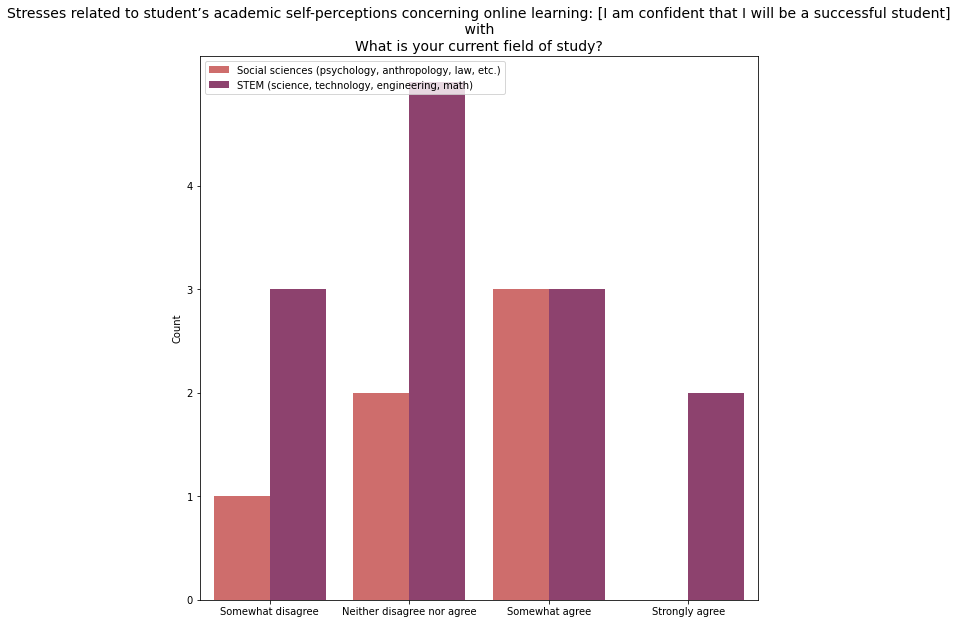

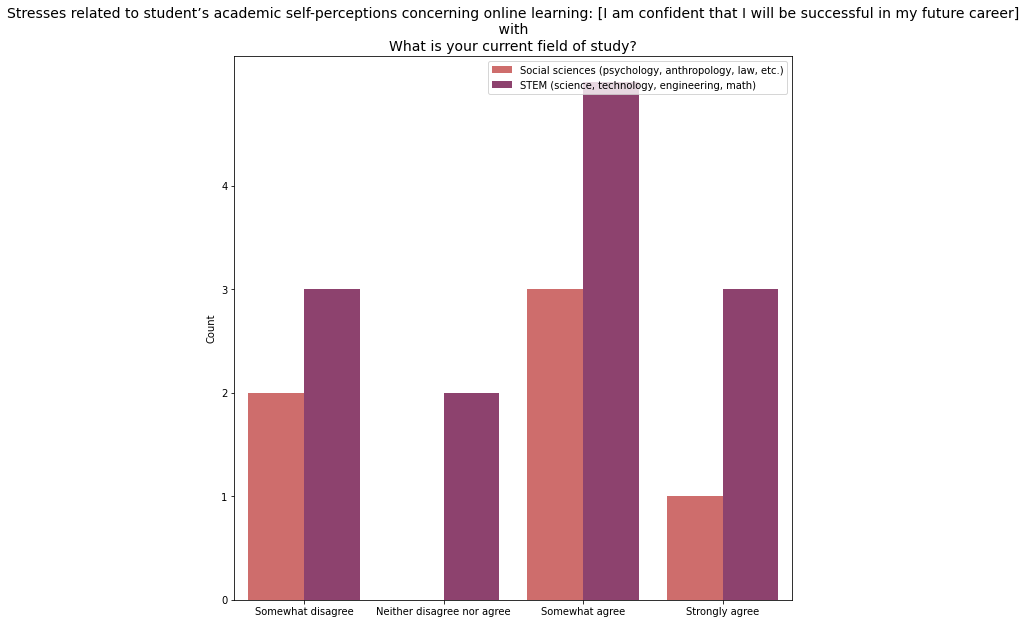

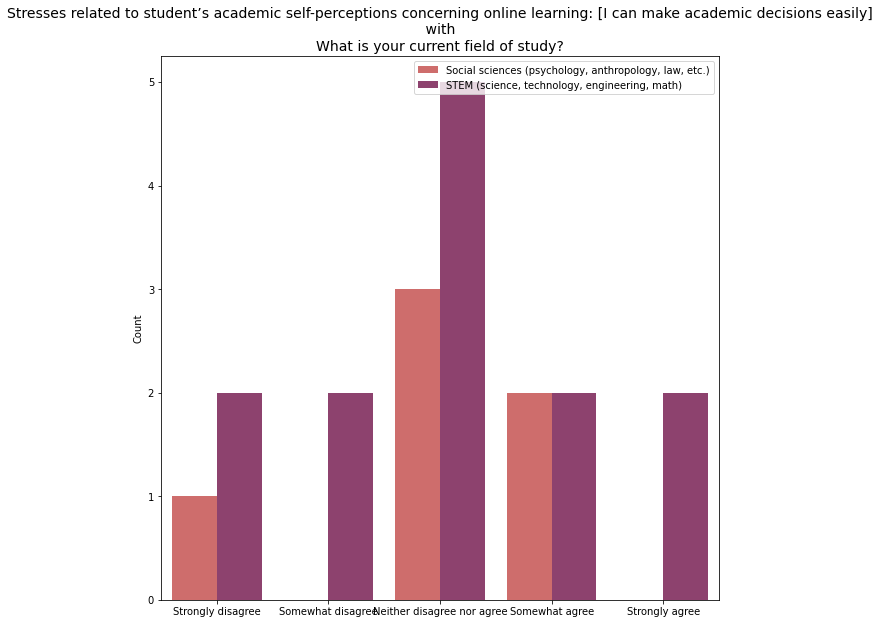

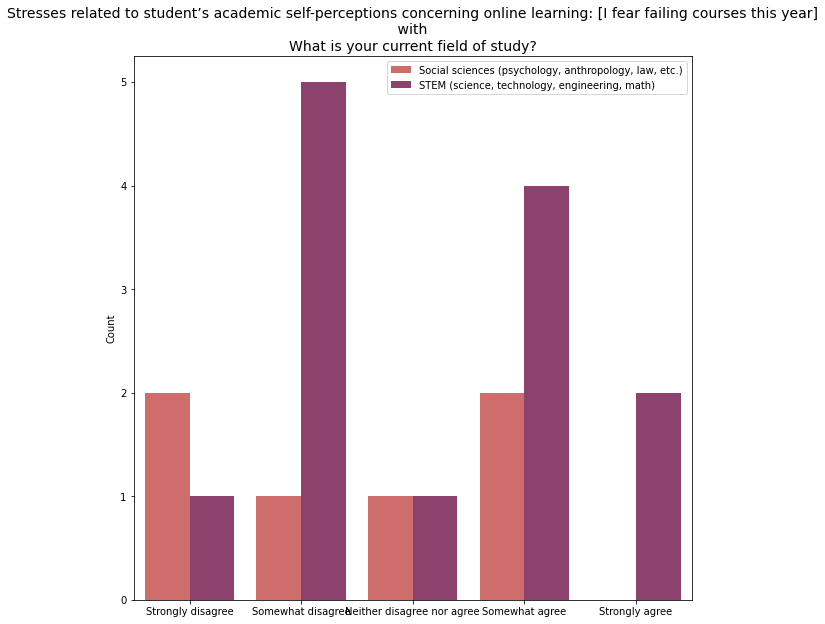

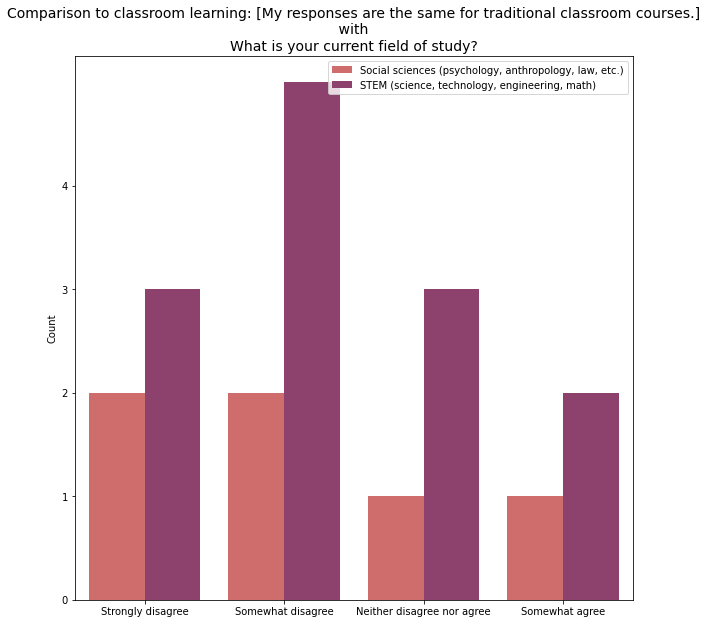

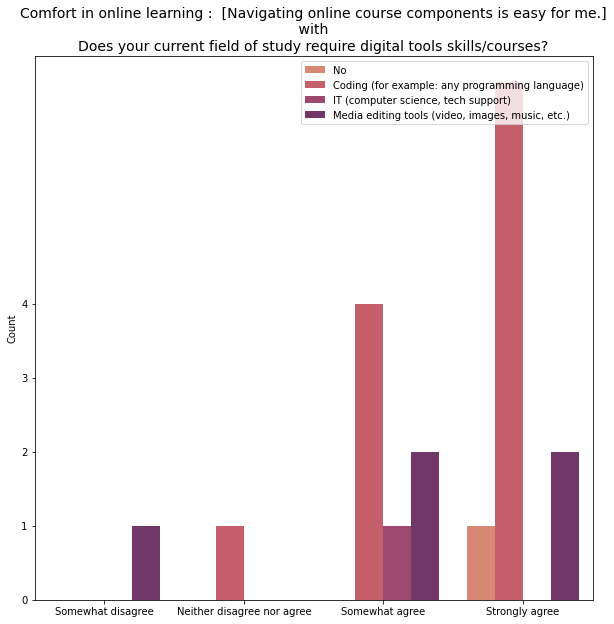

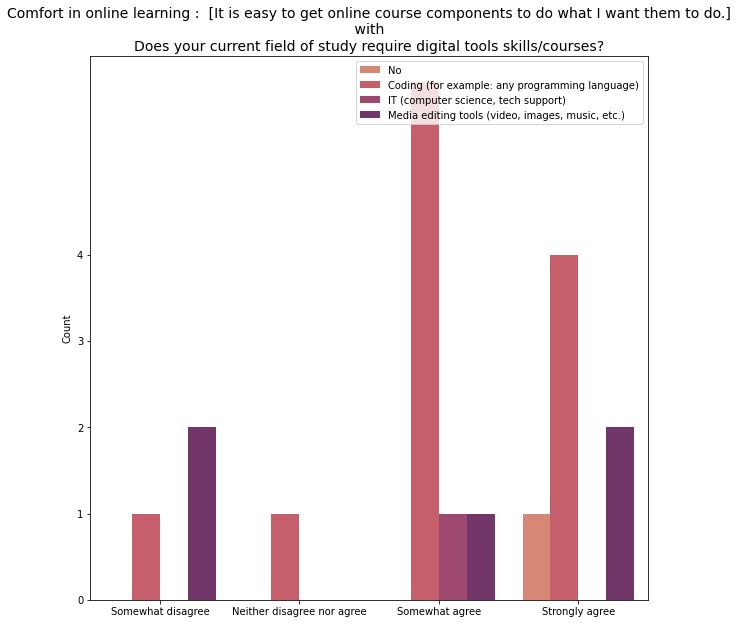

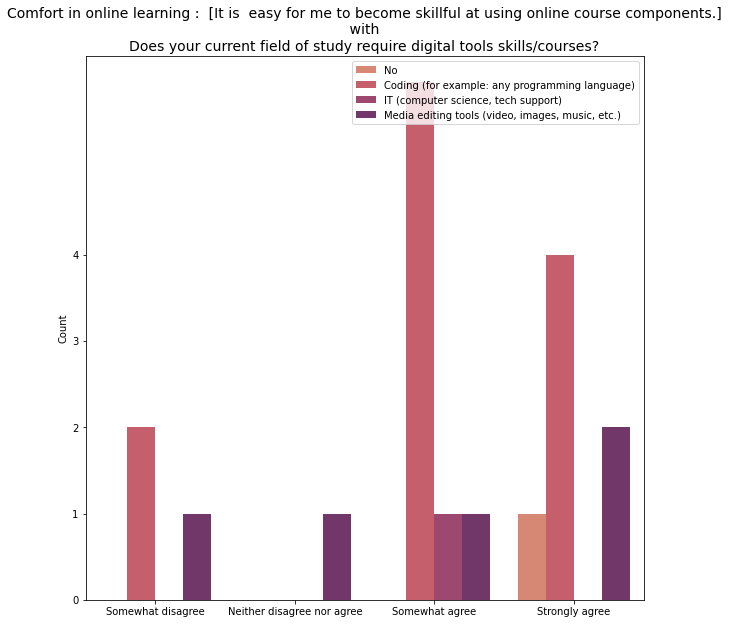

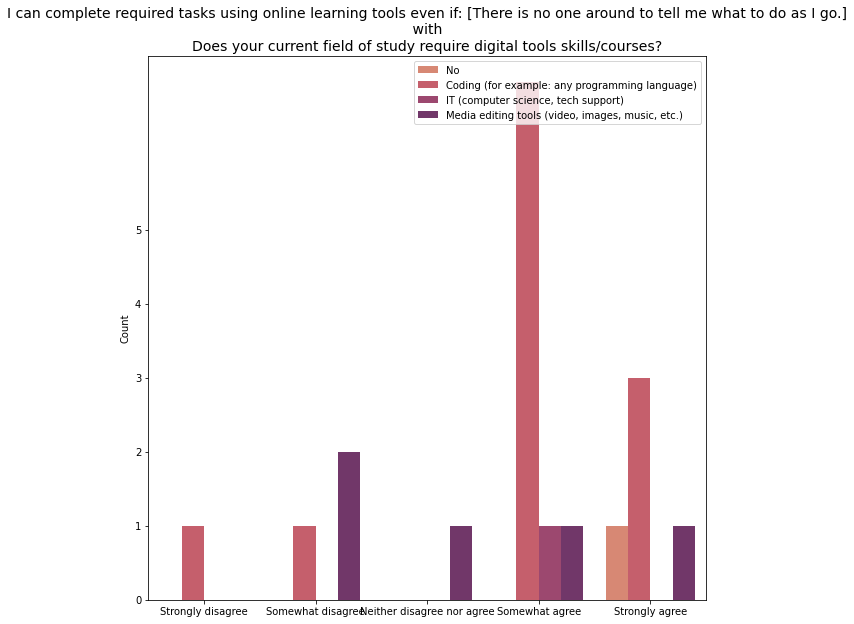

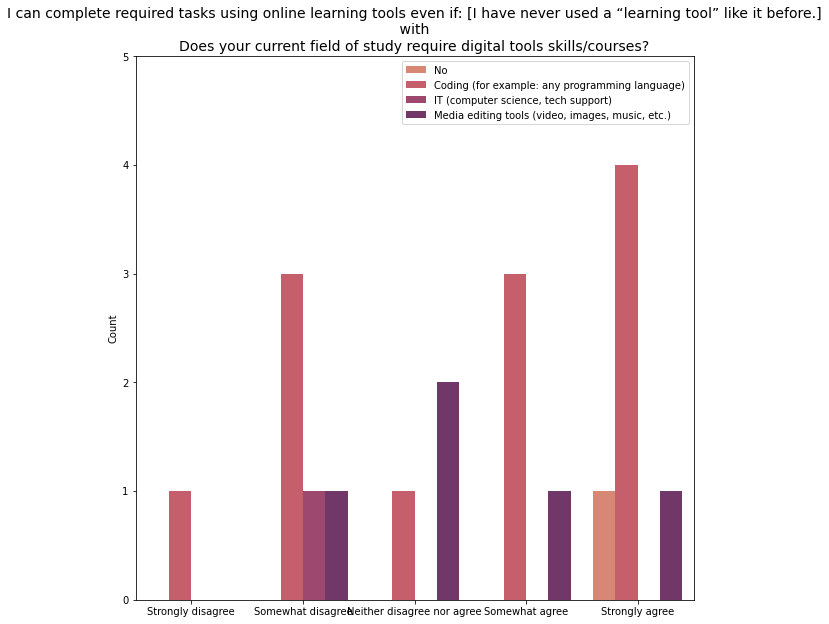

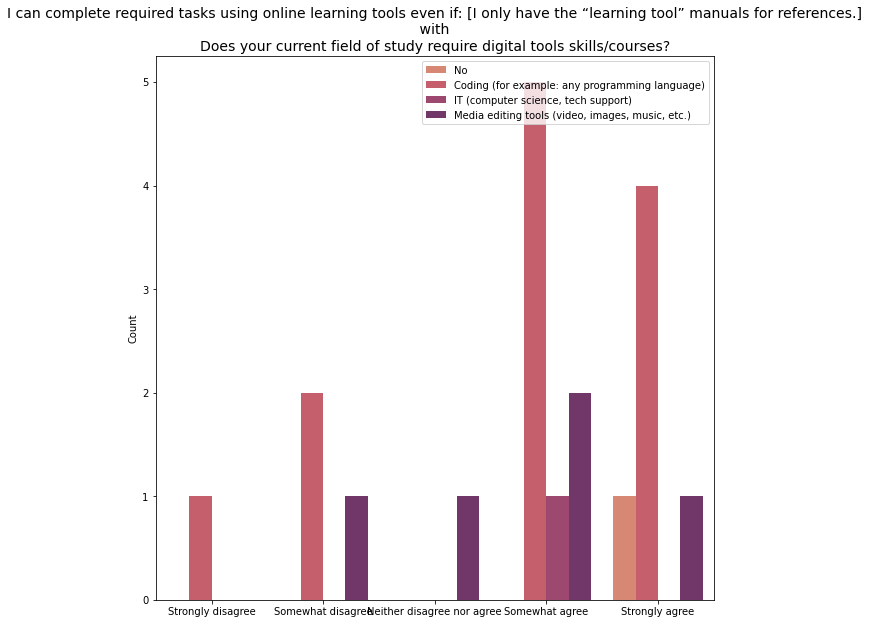

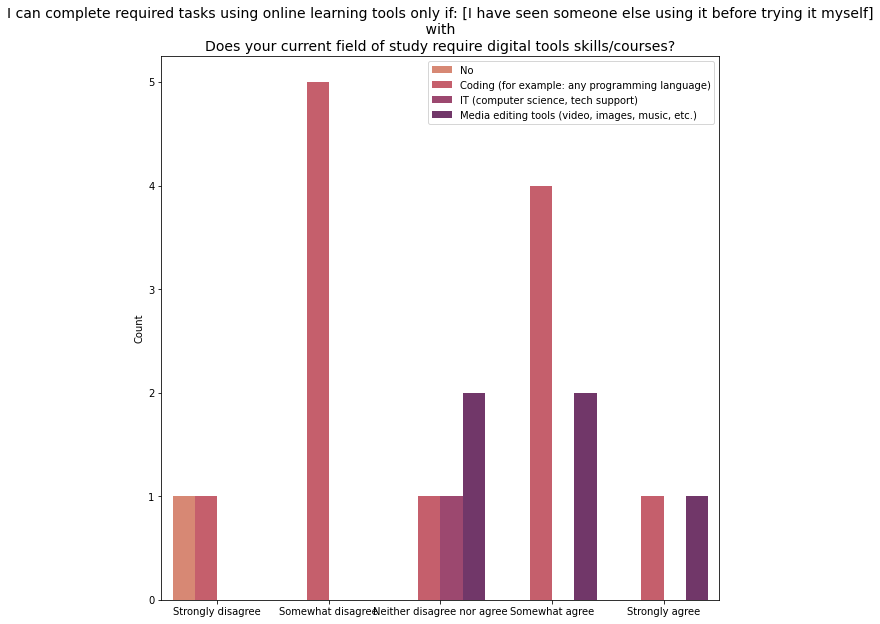

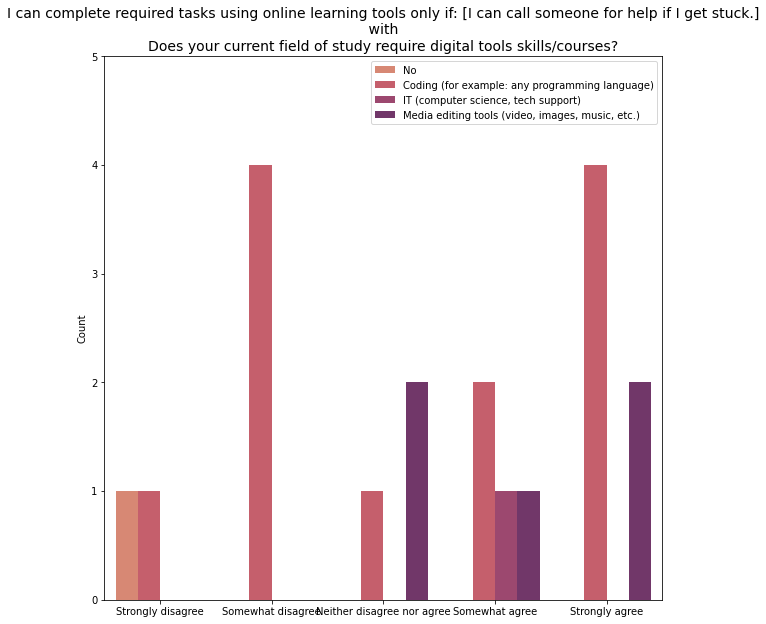

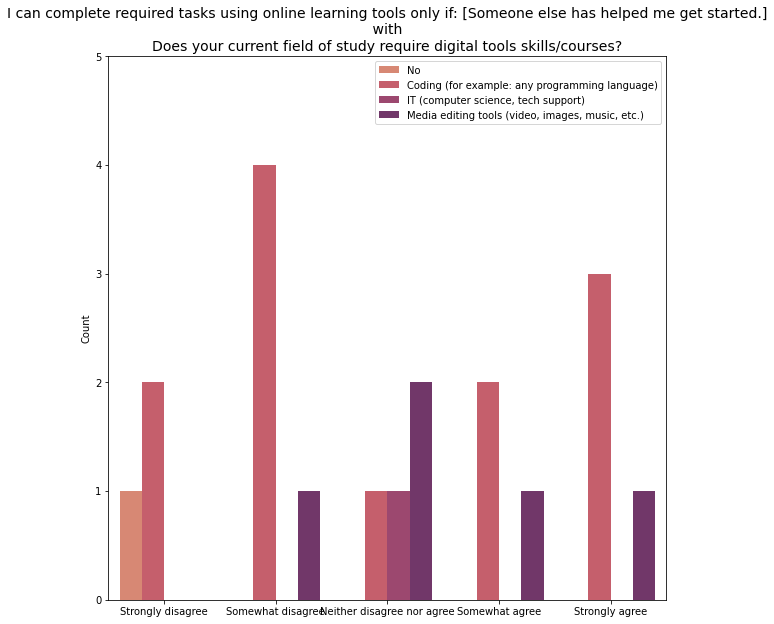

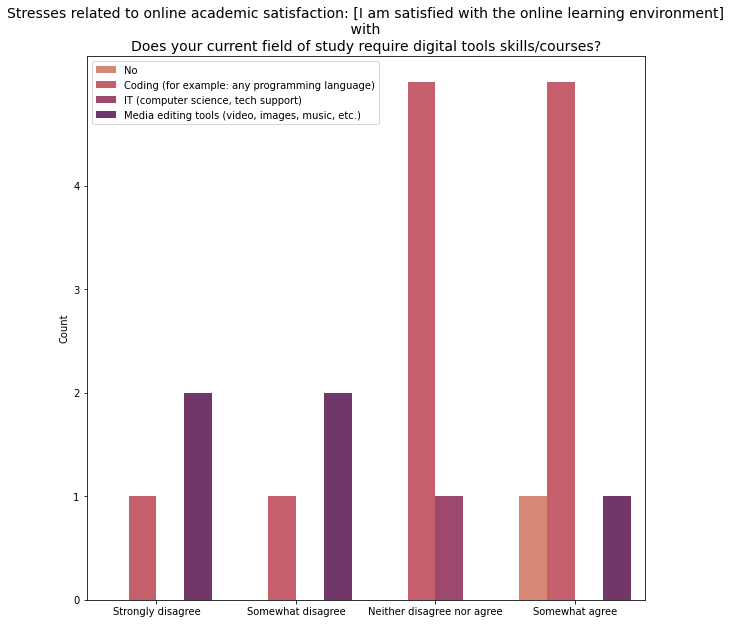

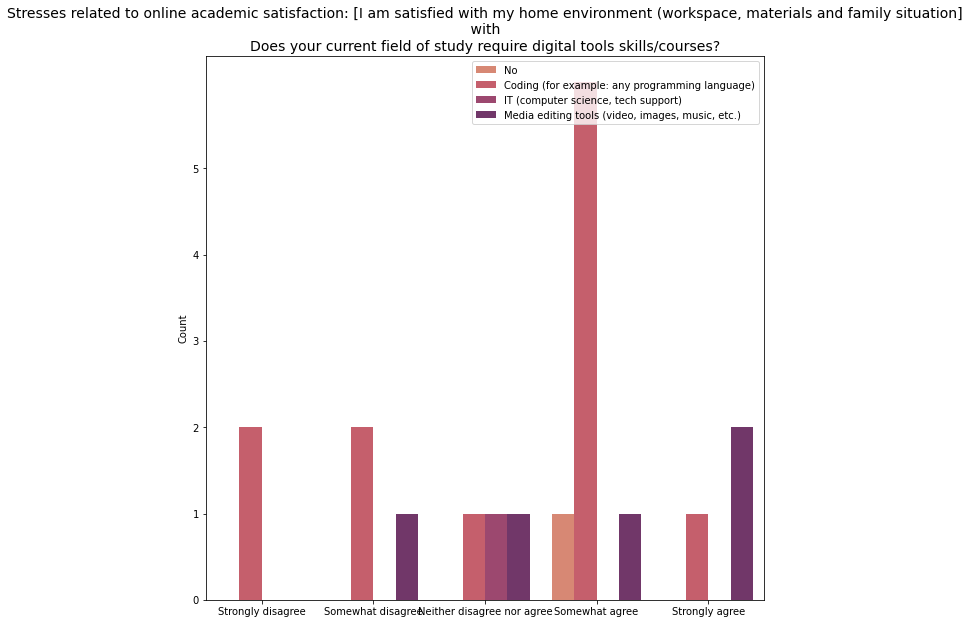

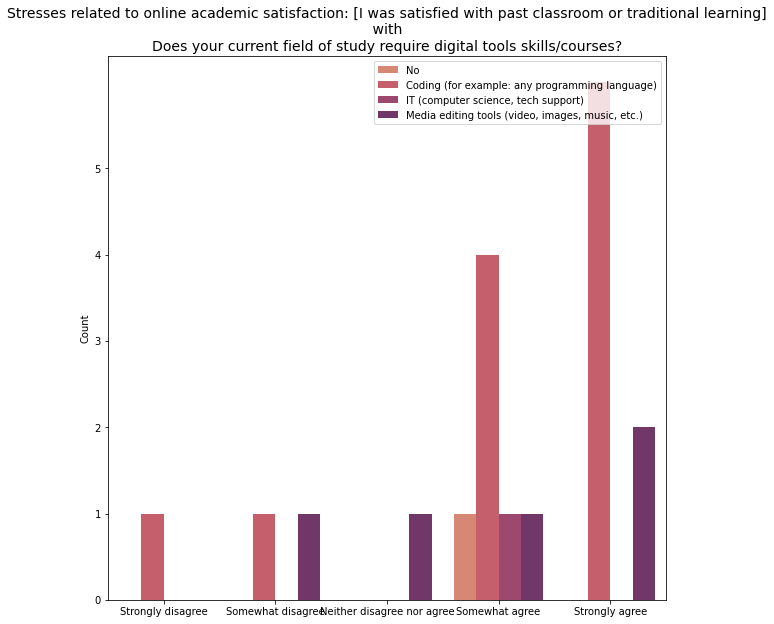

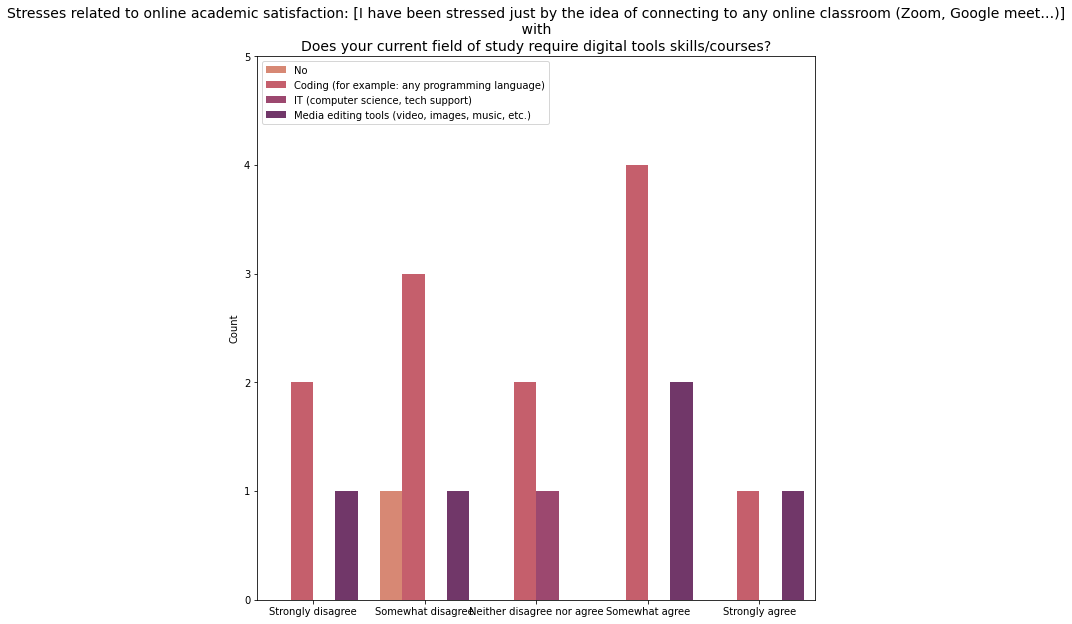

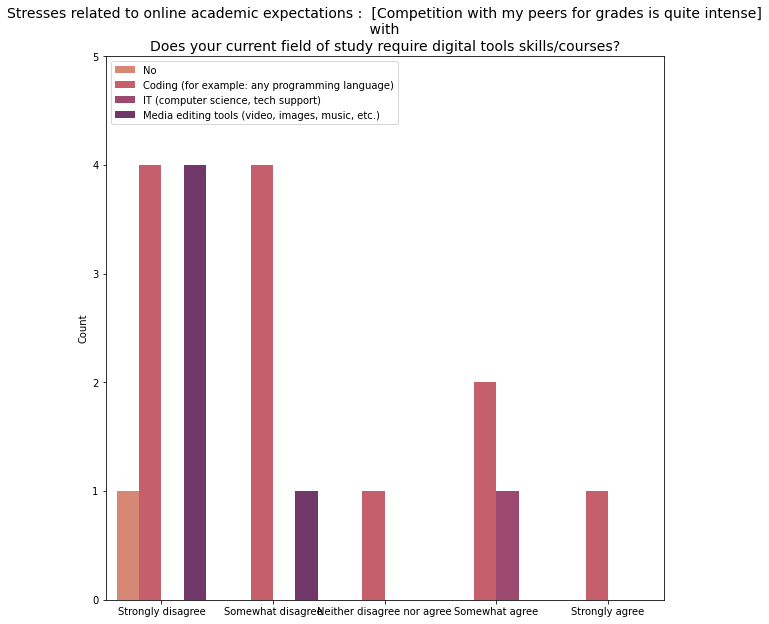

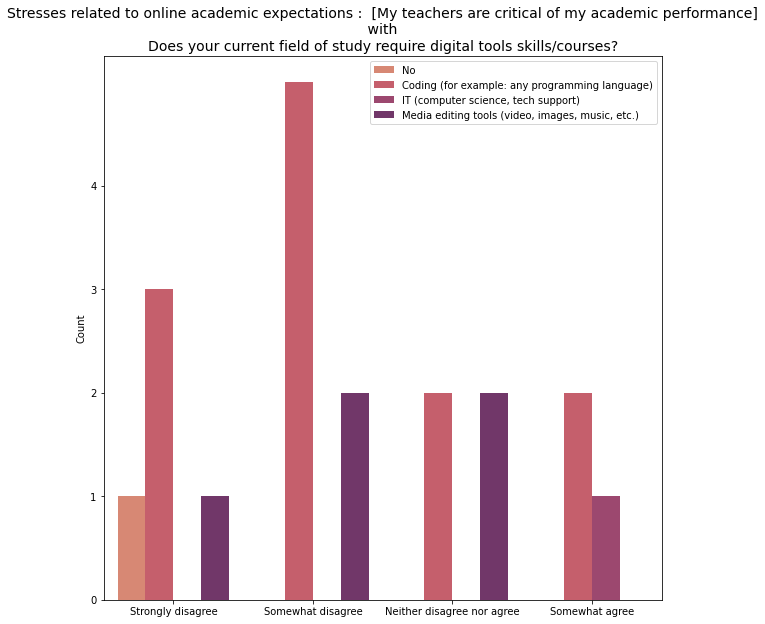

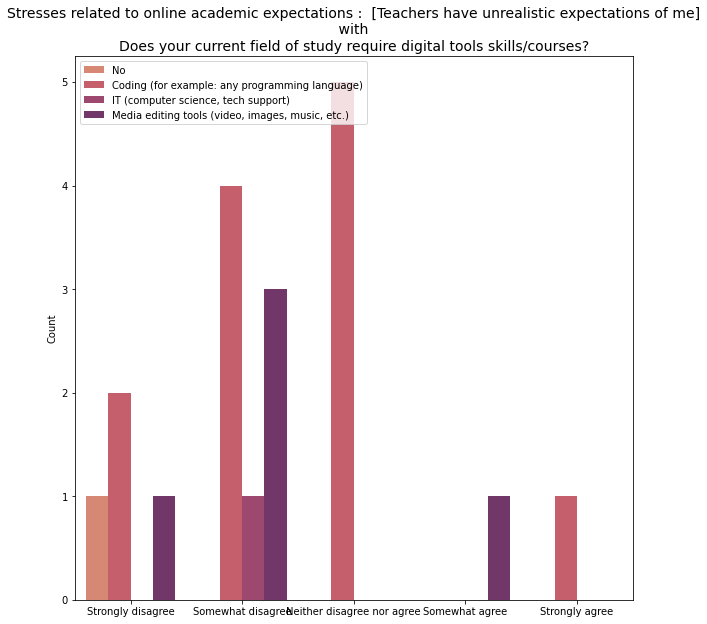

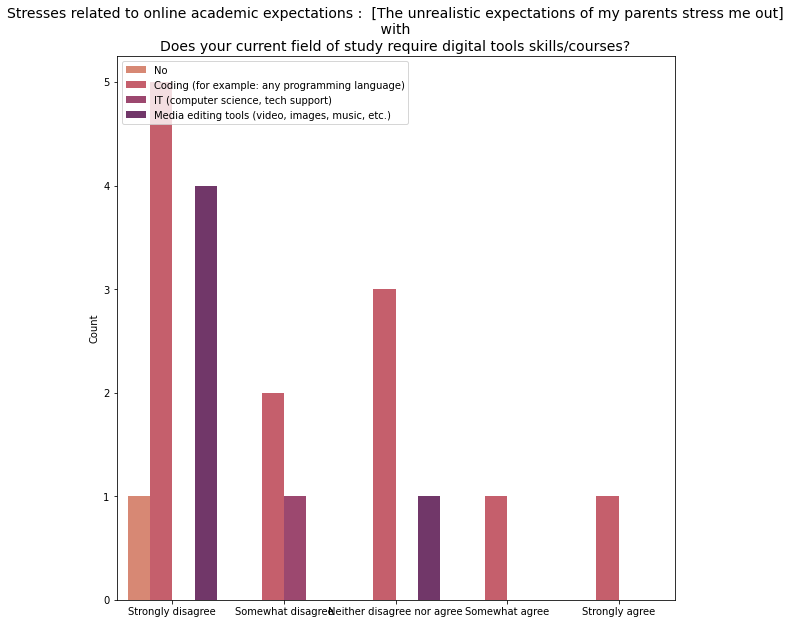

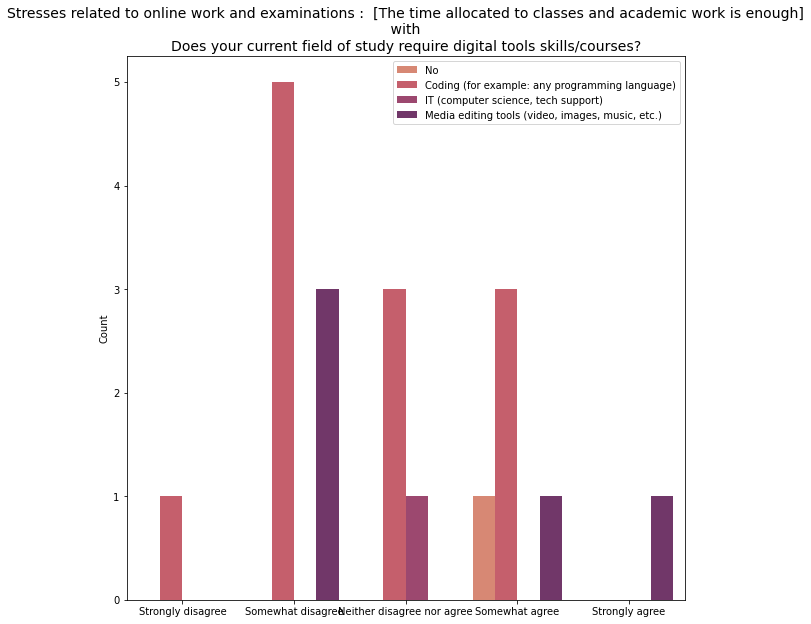

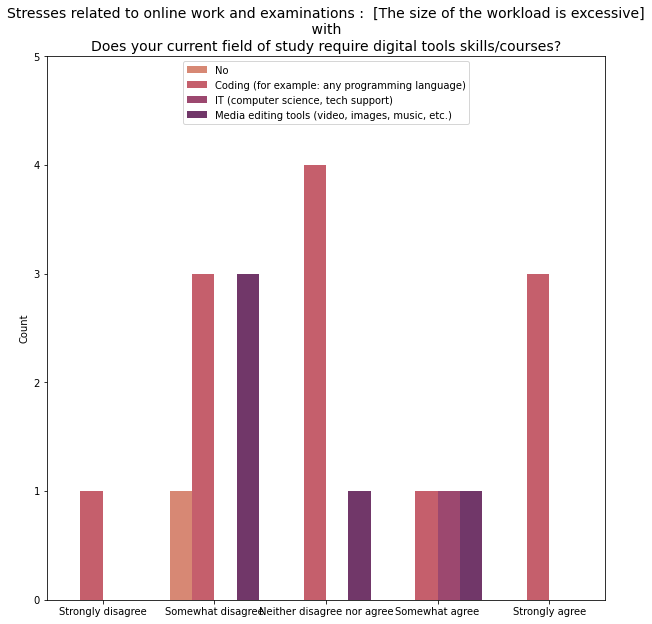

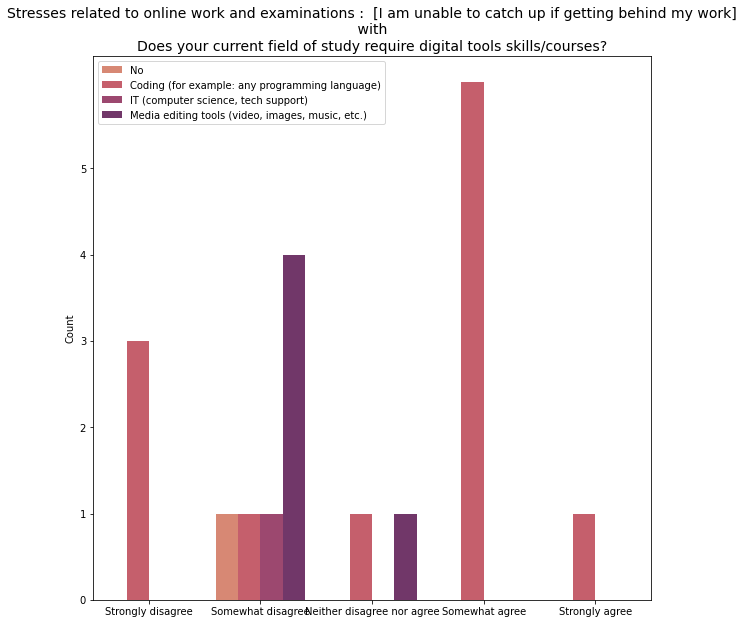

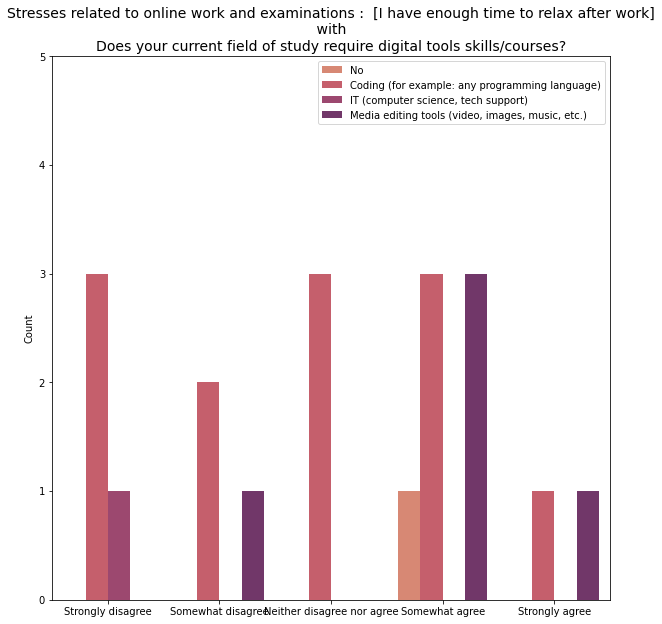

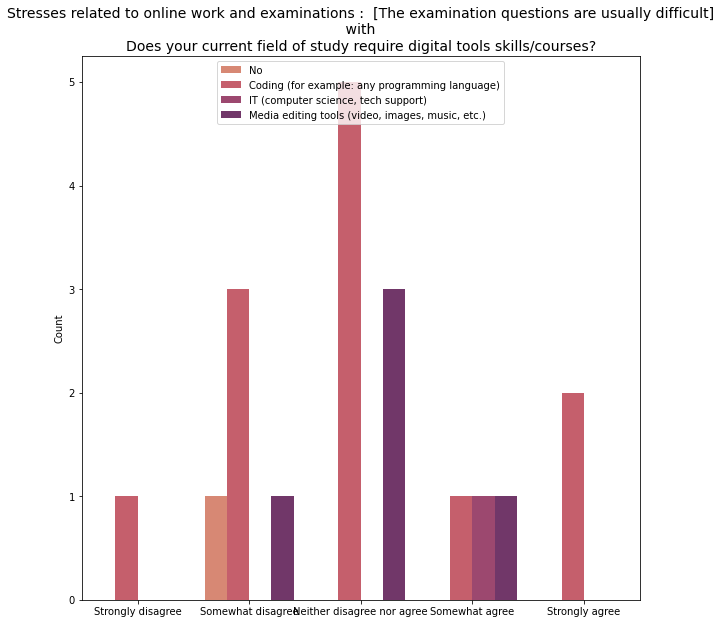

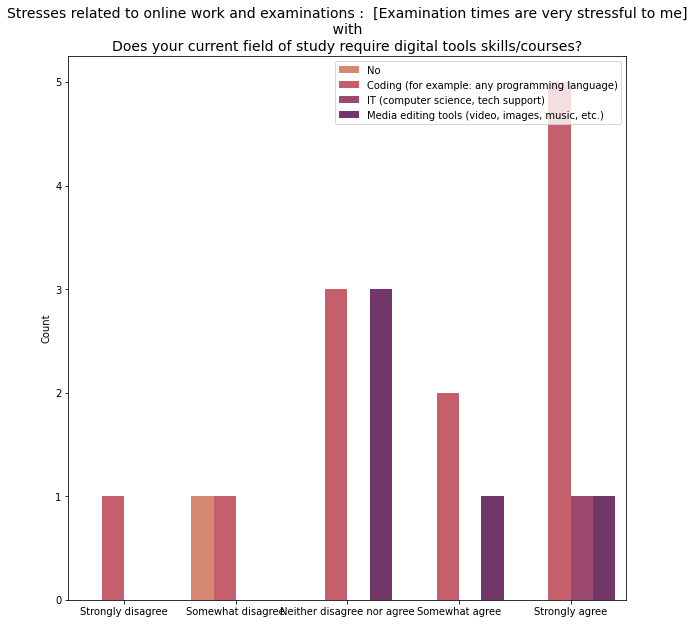

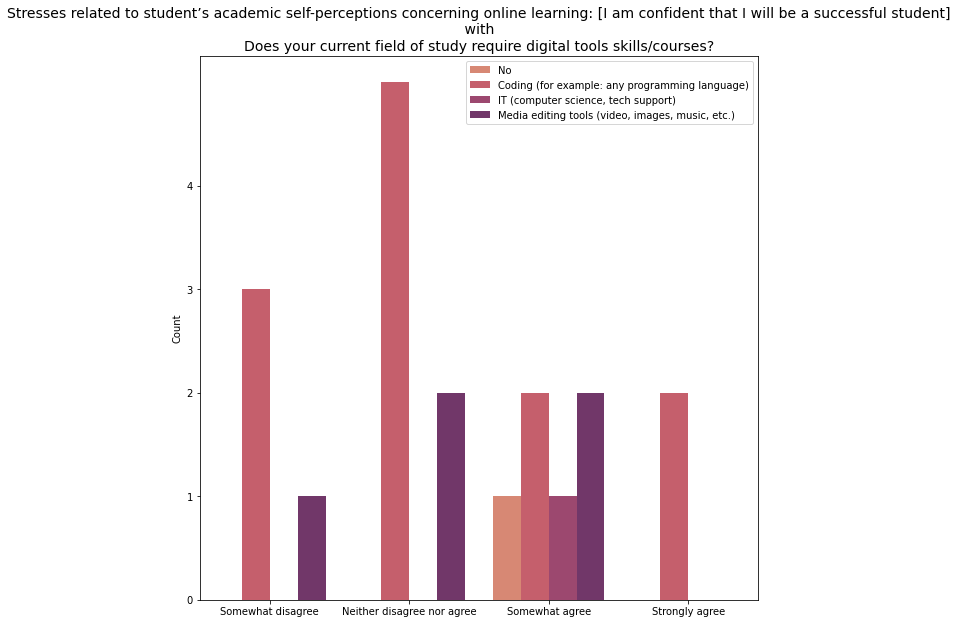

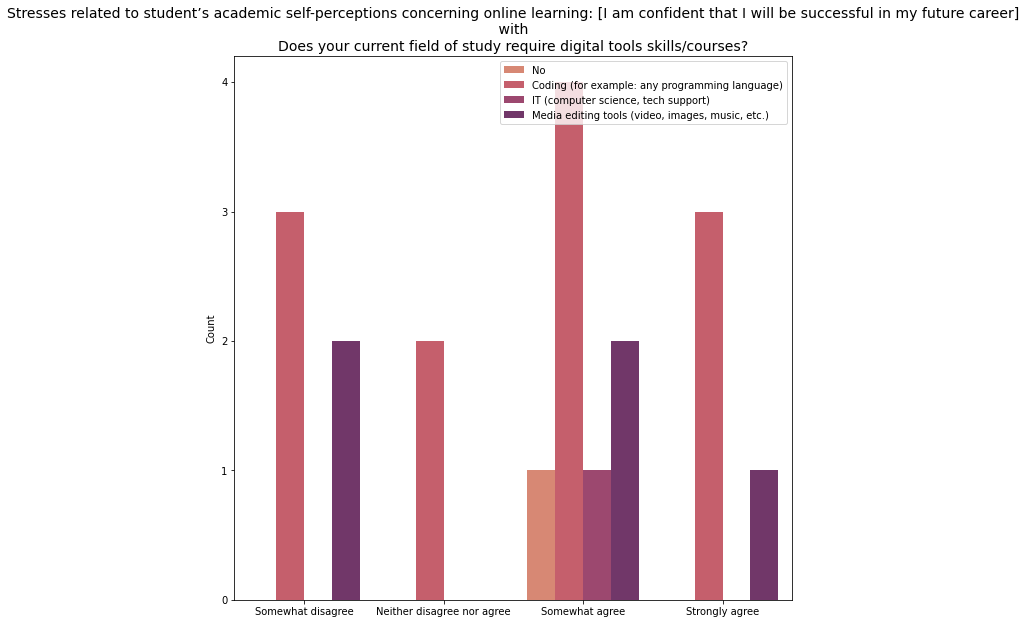

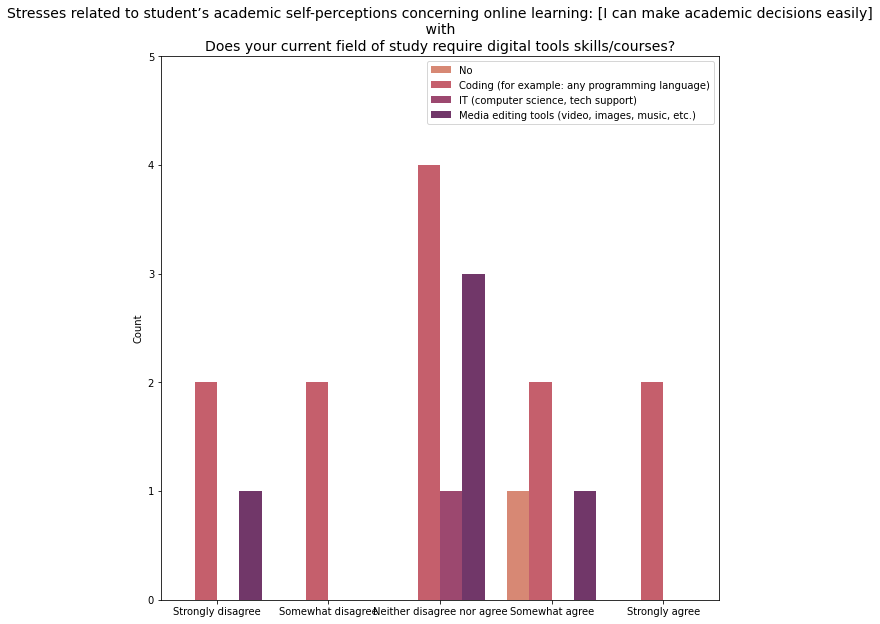

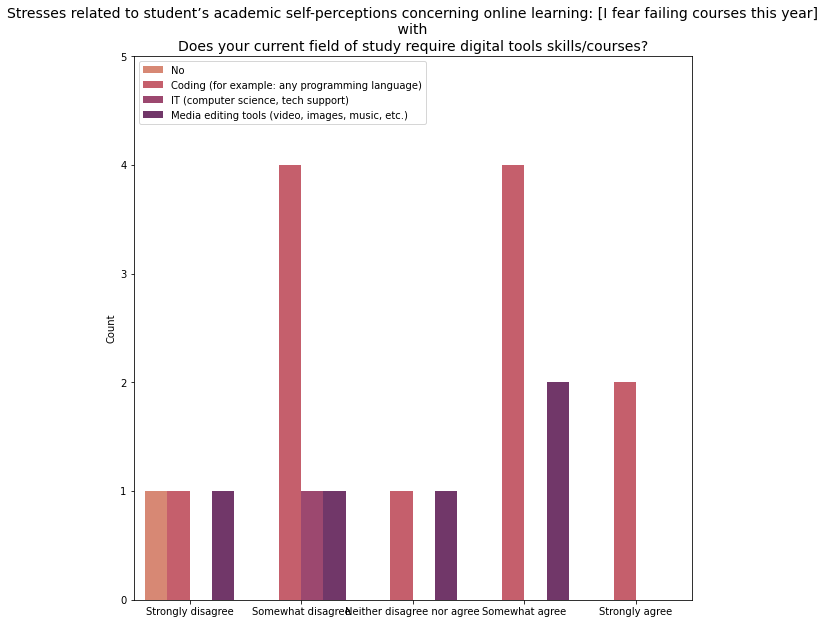

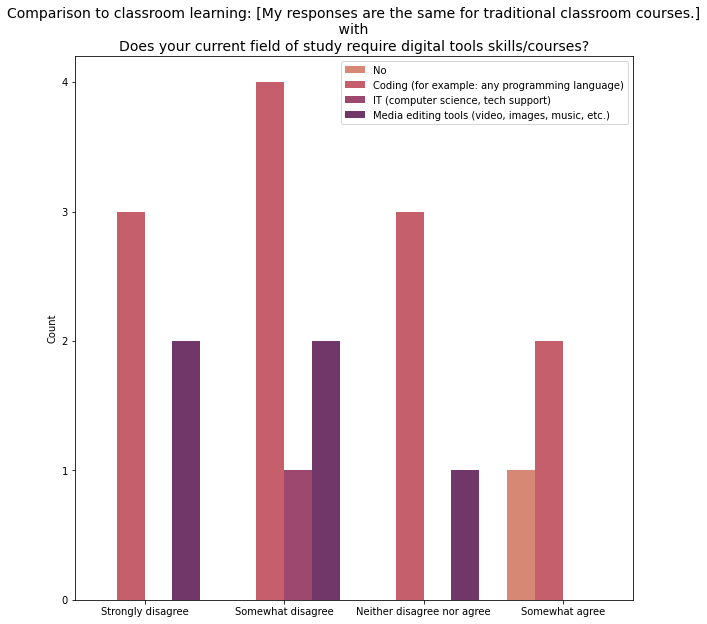

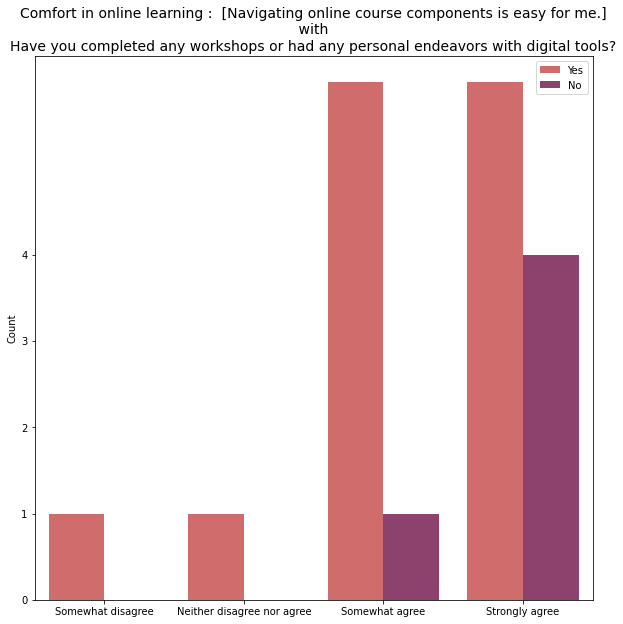

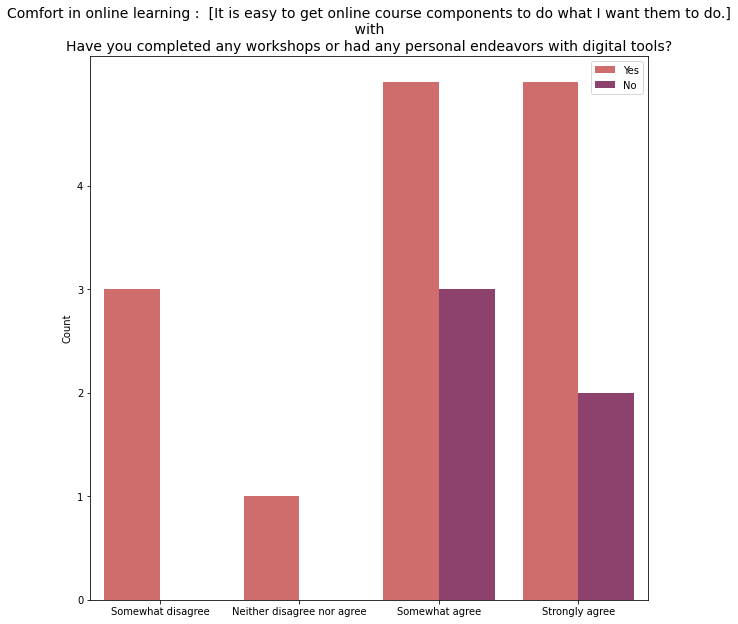

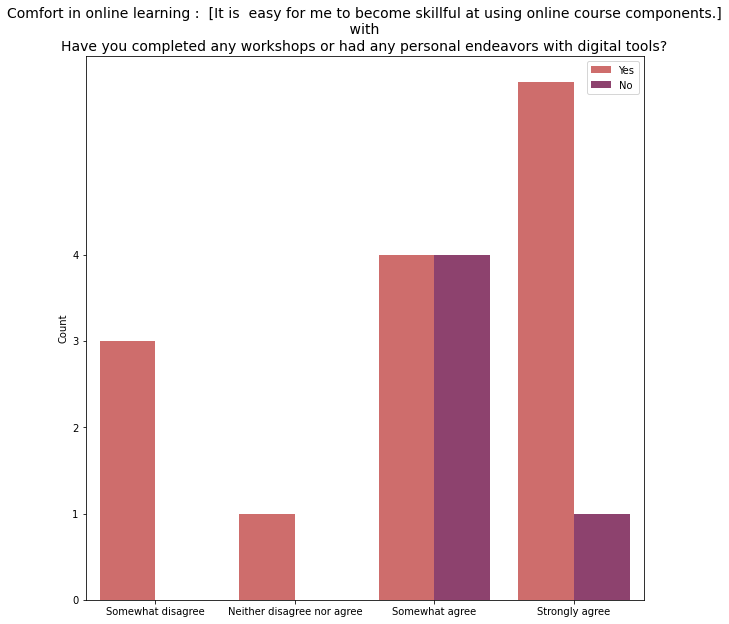

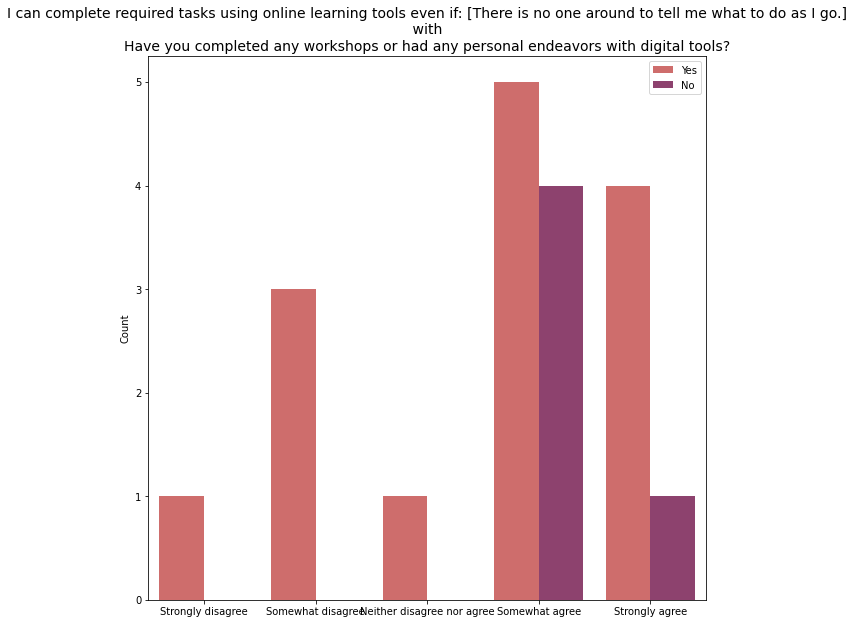

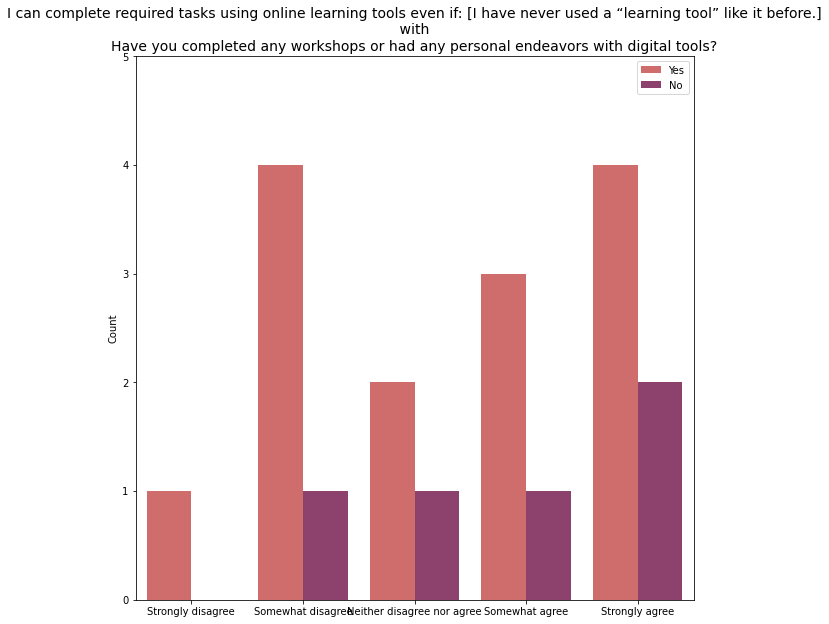

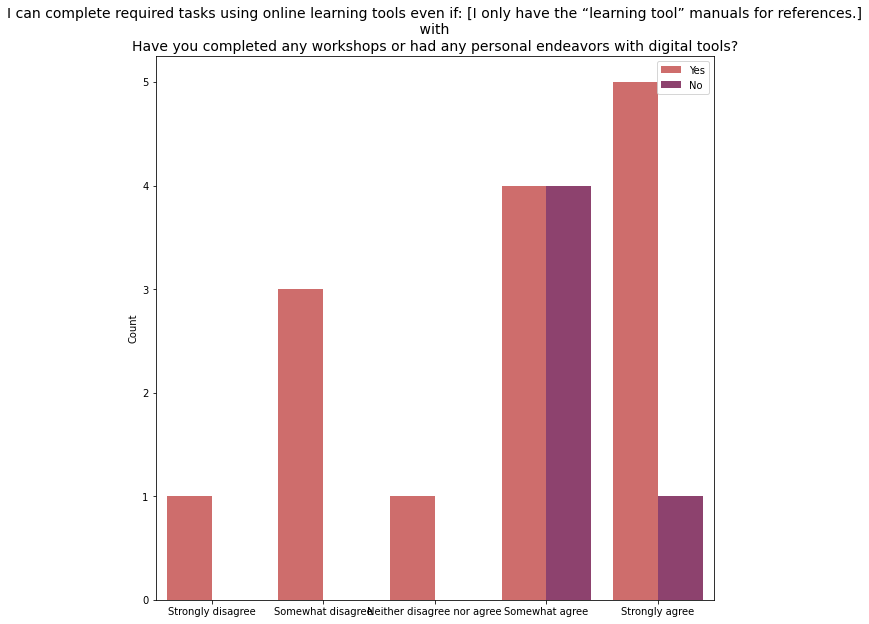

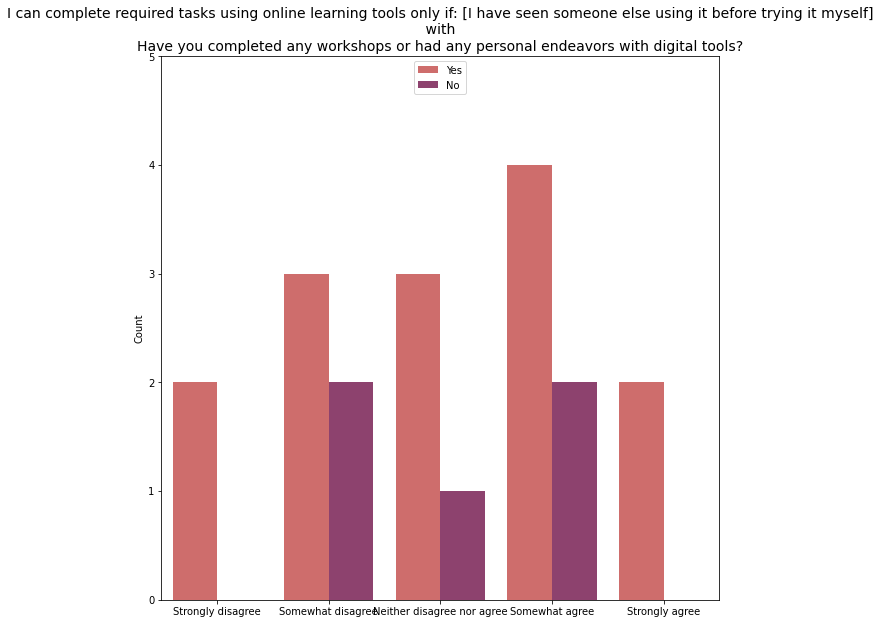

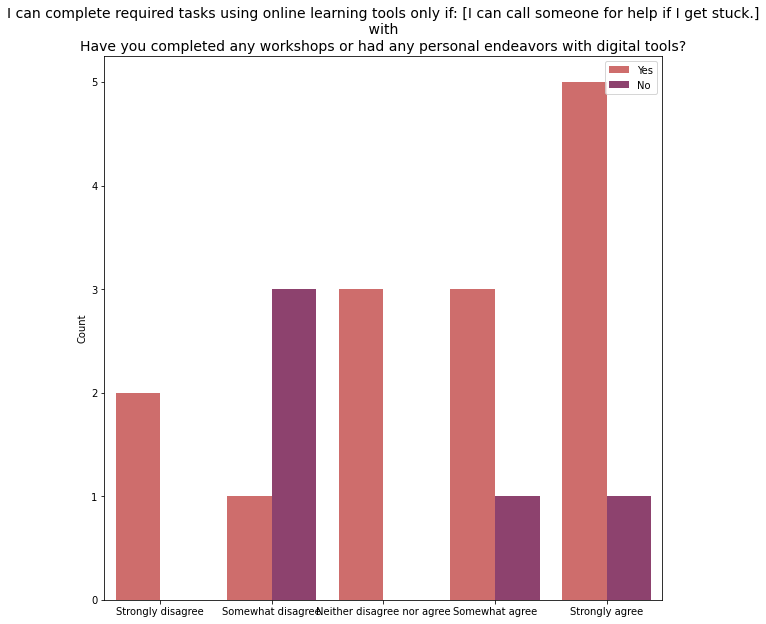

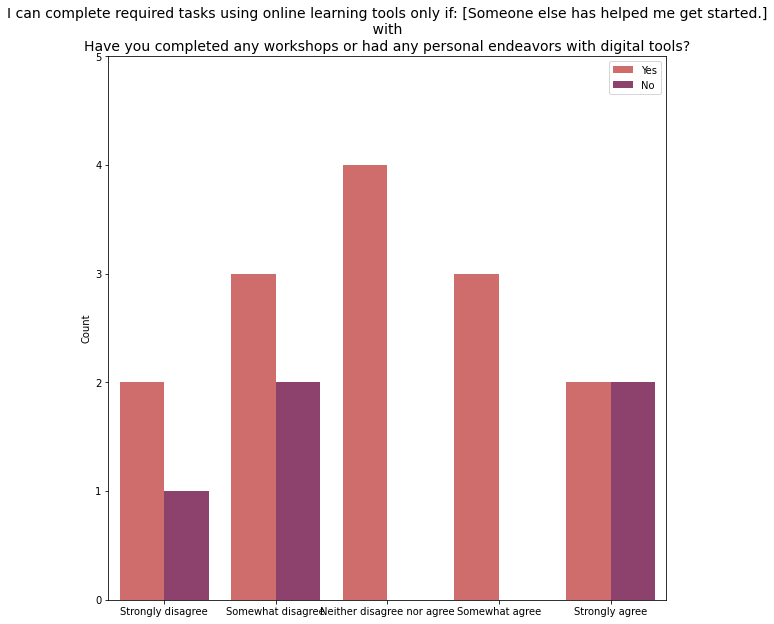

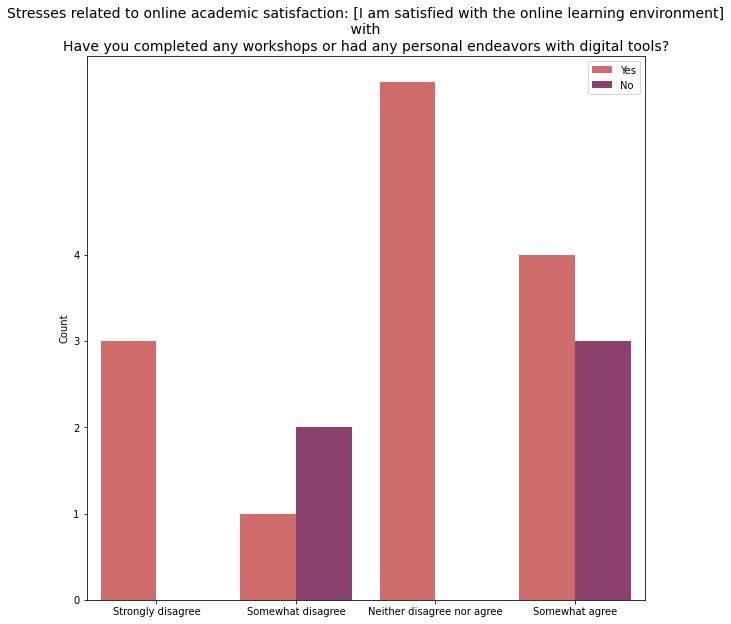

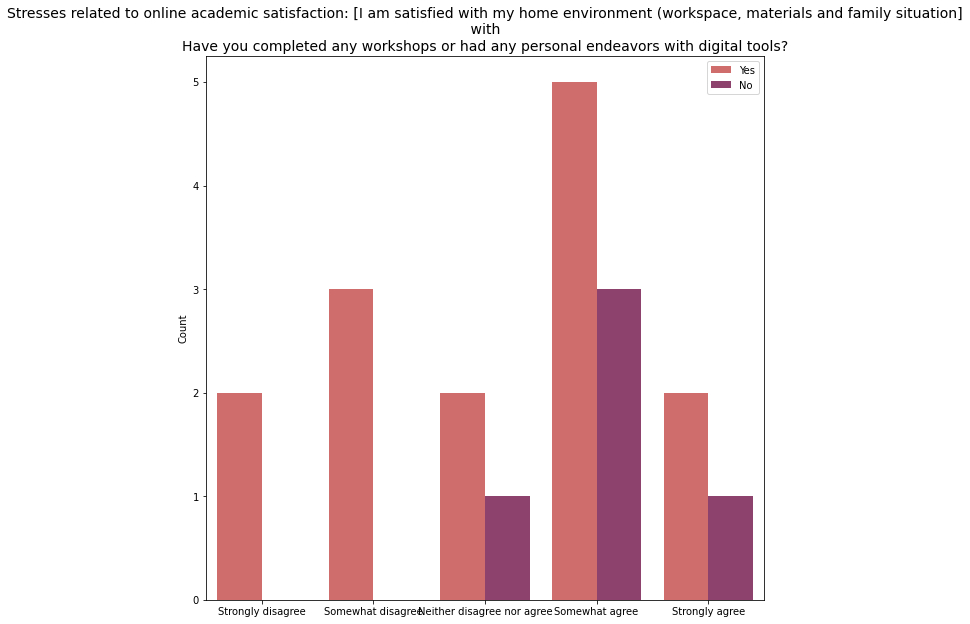

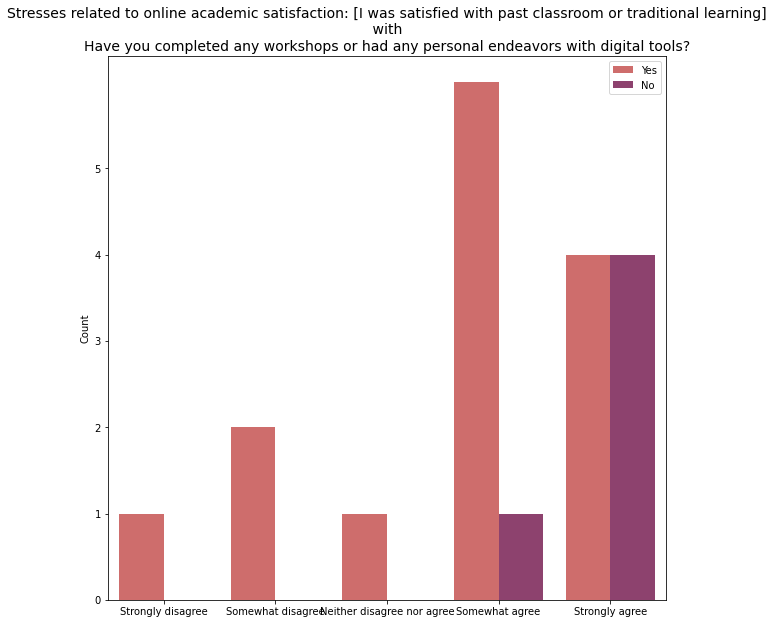

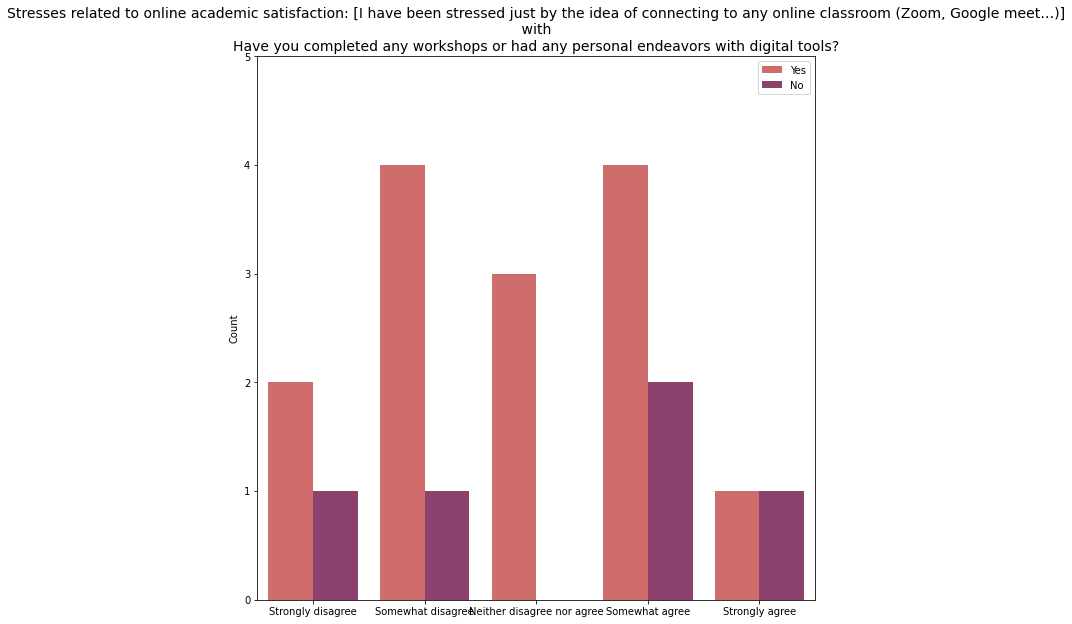

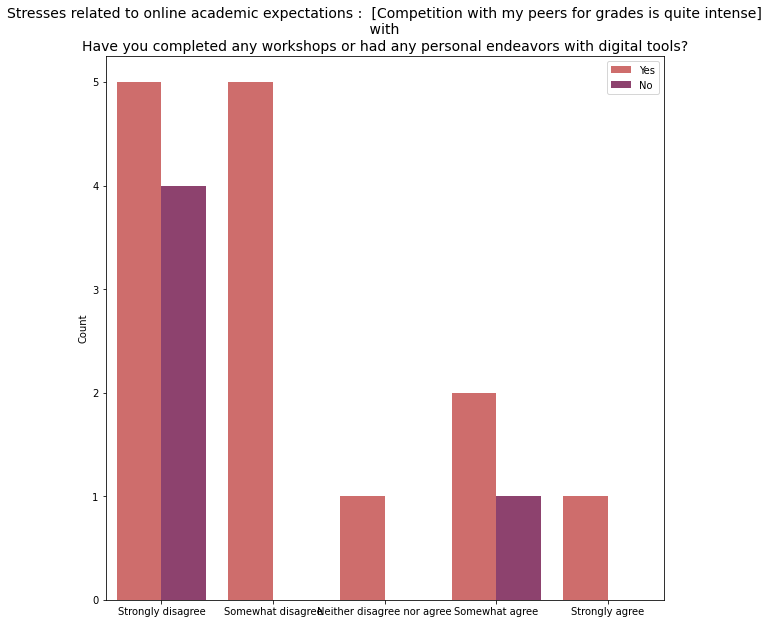

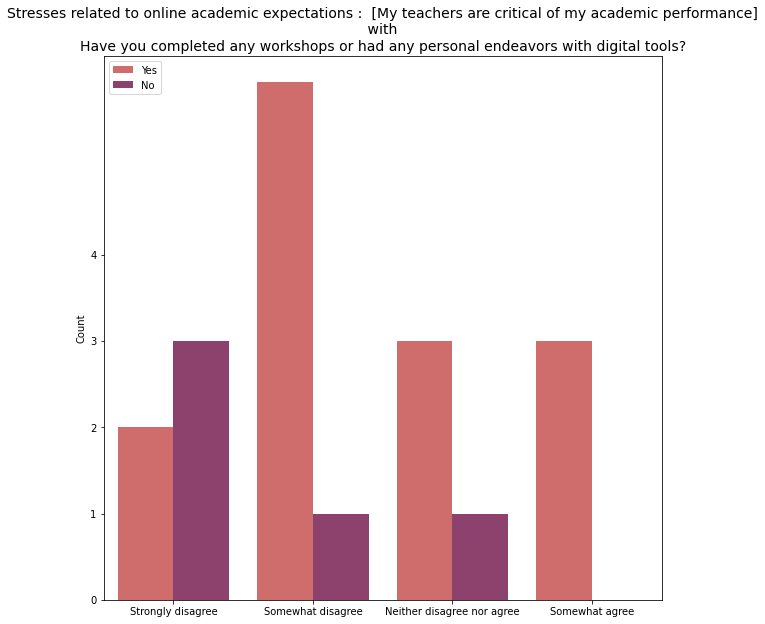

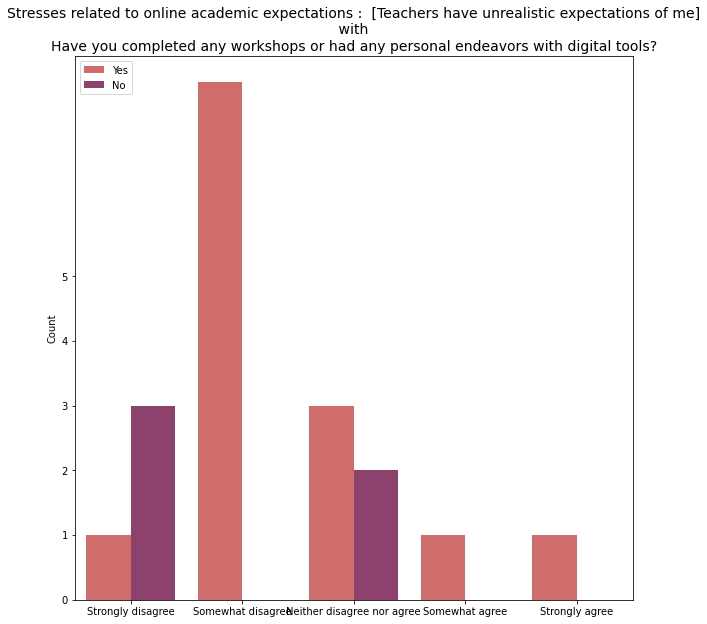

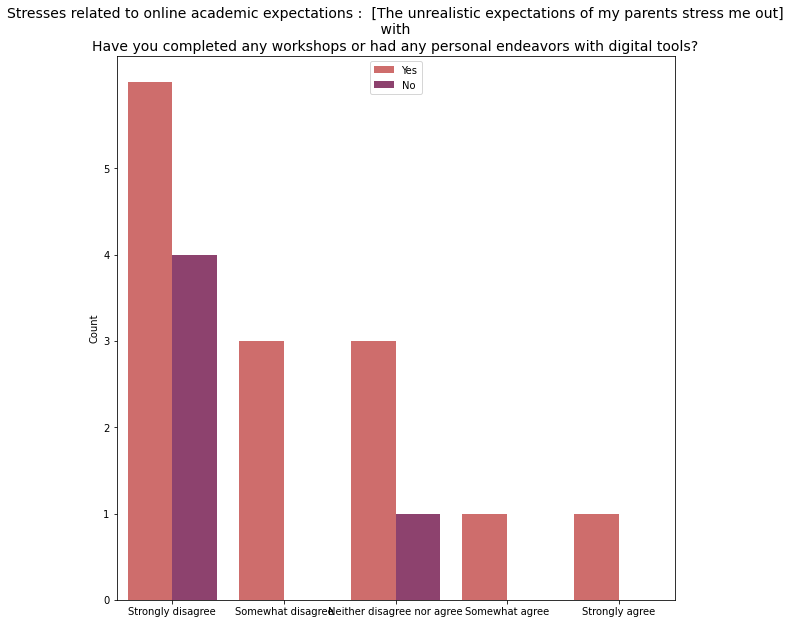

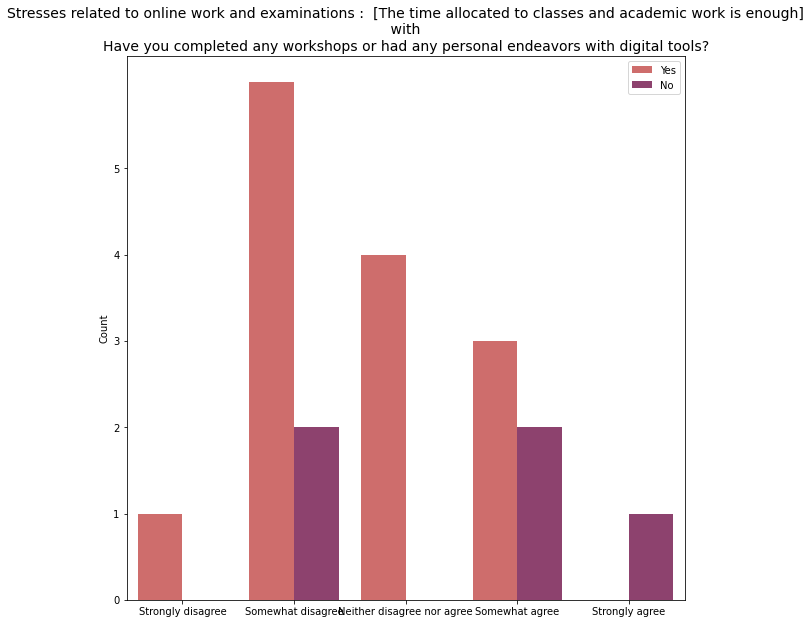

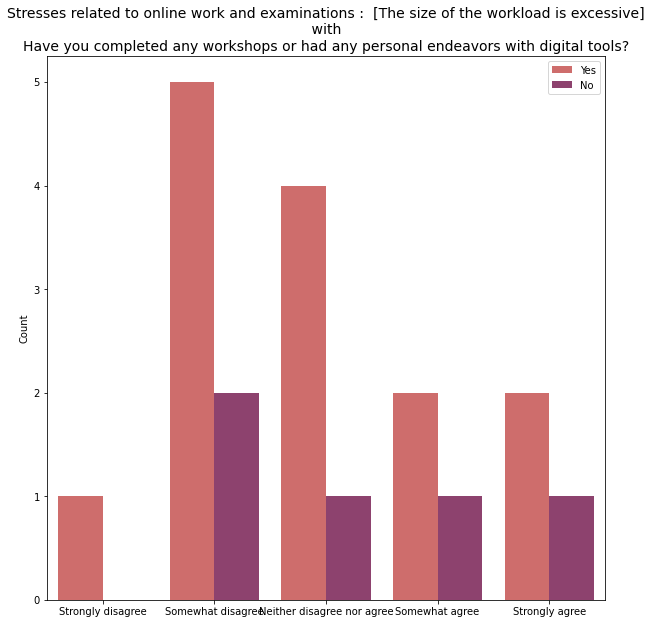

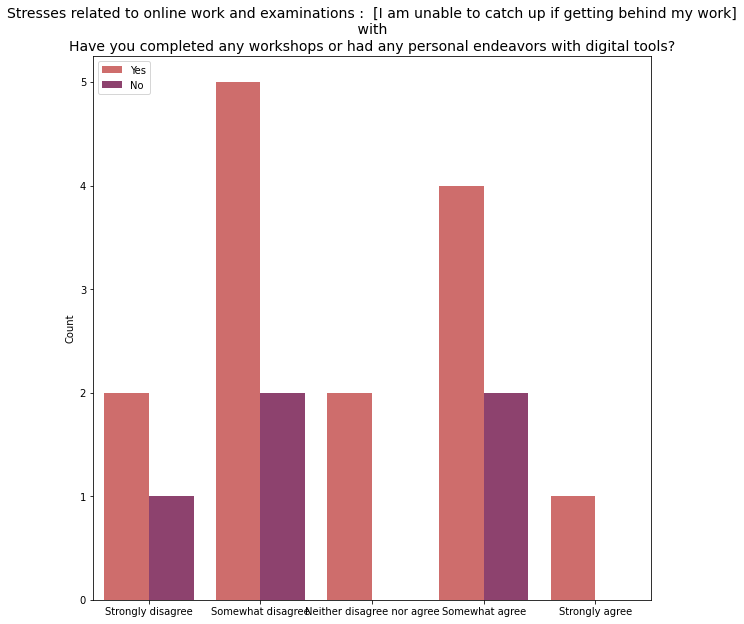

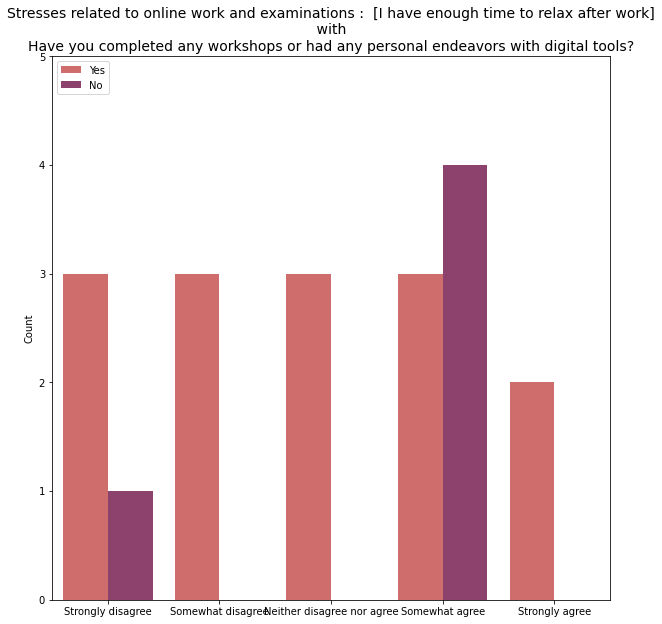

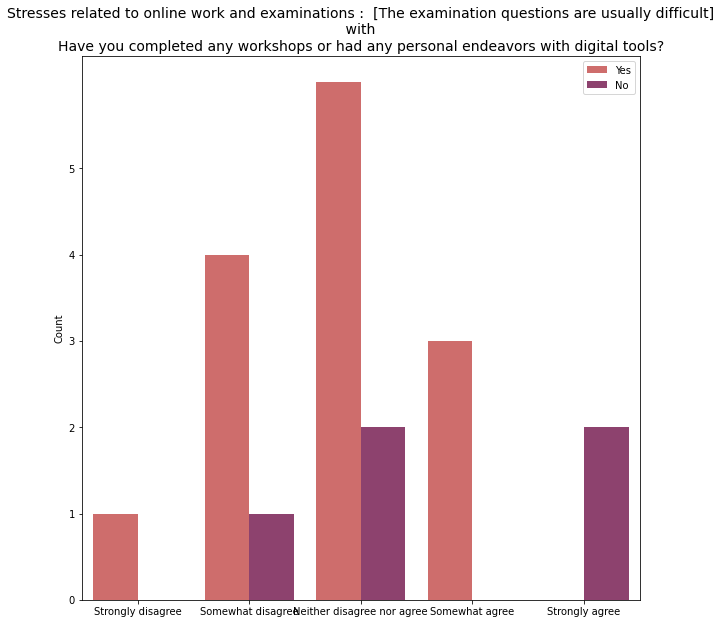

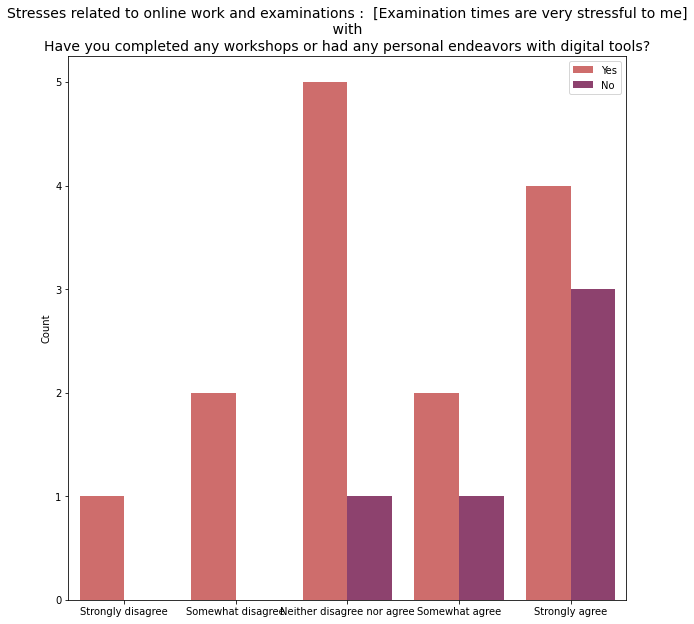

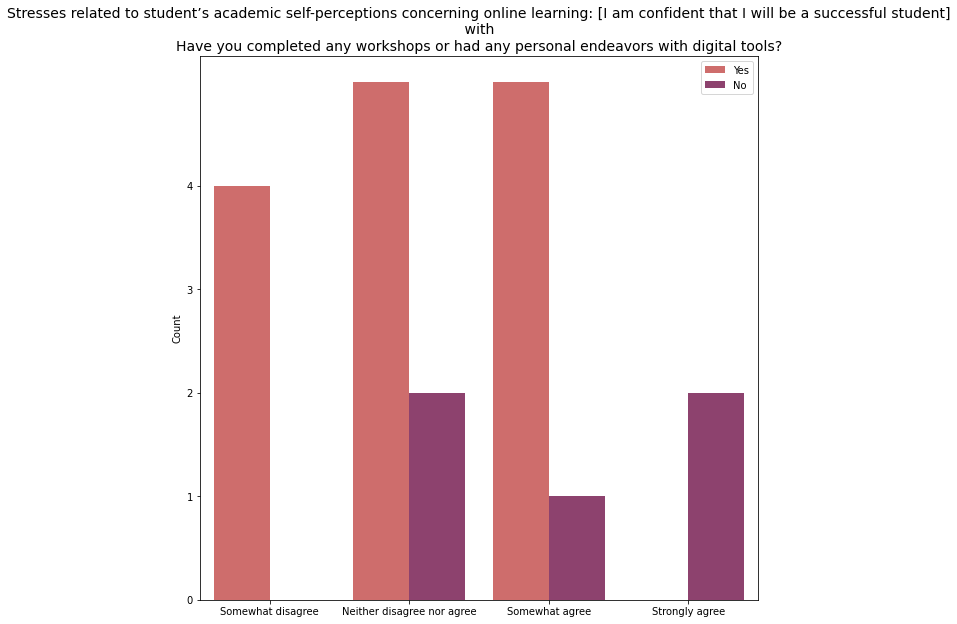

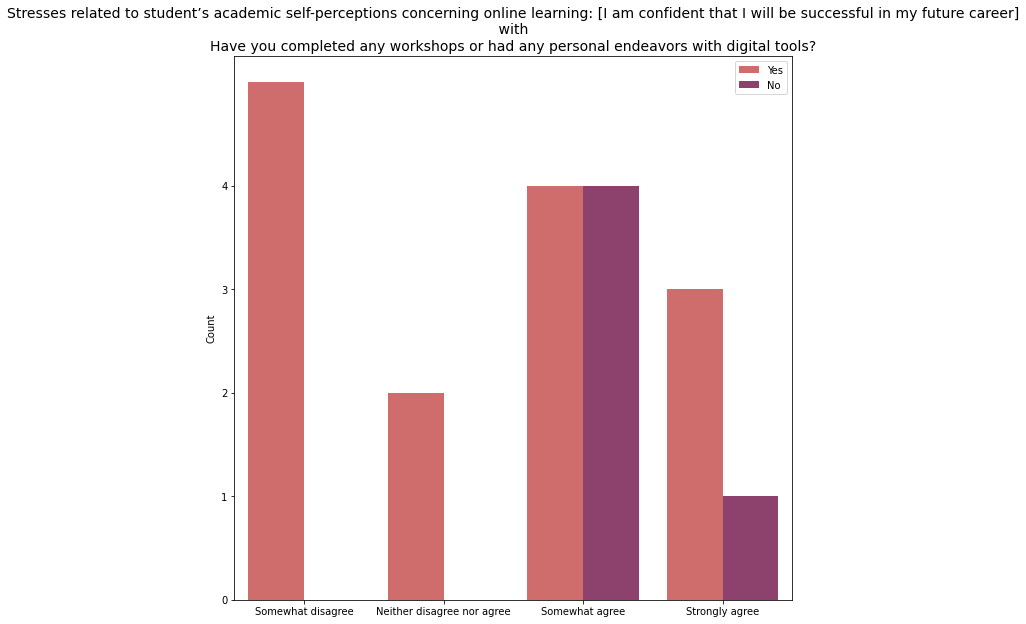

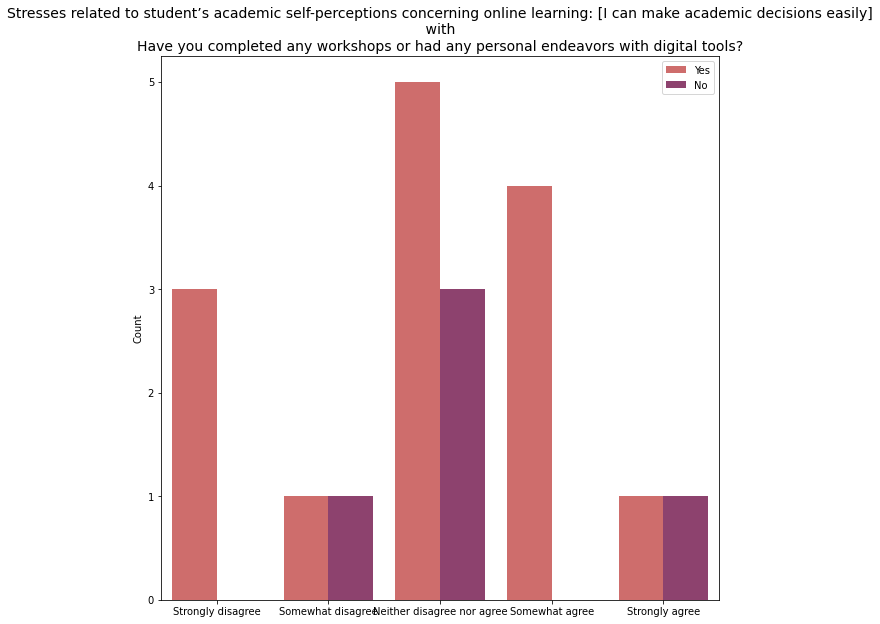

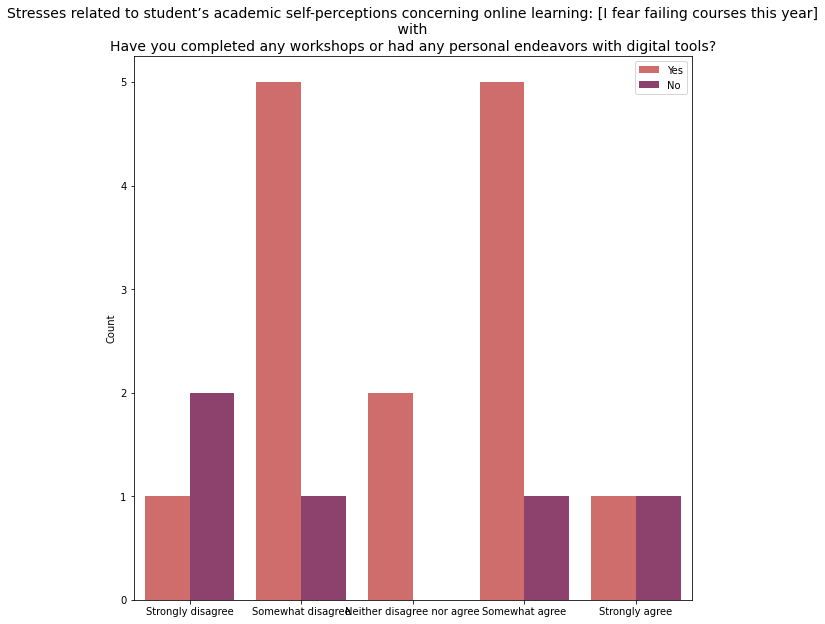

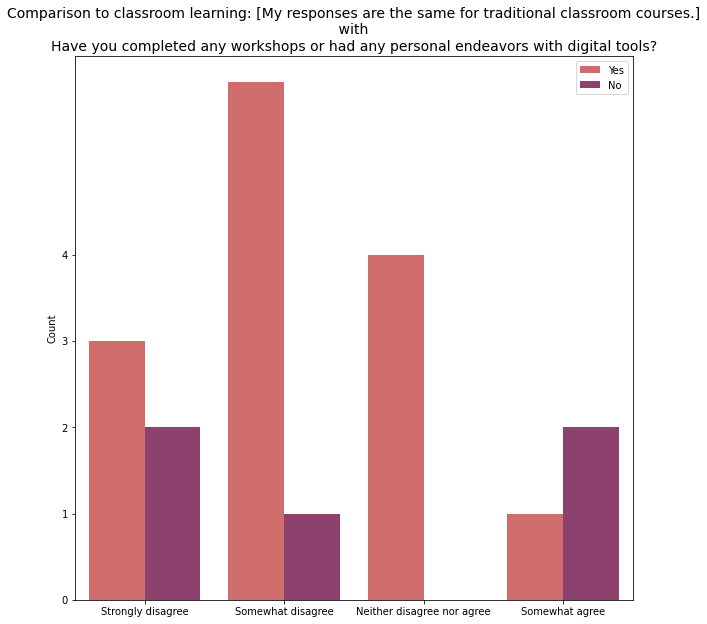

In [19]:
for j, demo_column in enumerate(demographic.columns, 1):
    for i, non_demo_column in enumerate(non_demographic.columns, 1):
        x = df[non_demo_column].sort_values(key=lambda x: x.map(cat_map))
        plt.figure(figsize=(10, 10))
        ax = sns.countplot(x=x, hue=df[demo_column], data=df, palette='flare')
        title = questions[non_demo_column] + "\n with \n" + questions[demo_column]
        plt.title(title, fontsize=14)
        ax.yaxis.set_ticks(np.arange(0, len(df[non_demo_column].value_counts())+1, 1))
        plt.rc('xtick', labelsize=10)
        plt.rc('ytick', labelsize=10)
        plt.xlabel('')
        plt.ylabel('Count')
        plt.legend()
        plt.show()